# Background
As smart phone penetration reaches the hundreds of millions mark, O2O (Online to Offline) requires businesses to have a strong presence both offline and online. APPs with O2O capabilities accumulate daily consumer behaviour and location data that require big data and commercial operations management. The competition at hand focuses on coupon redemption rates. Sending coupons is a general O2O marketing tool used to activate existing customers and attract new ones. While customers are happy to receive coupons that they want, they are frustrated when receiving coupons that they do not need. For merchants, sending unwanted coupons may erode brand equity and hinder marketing expense forecasting. Targeted marketing is an important technology to increase the coupon redemption rate, providing relevant discounts to customers and effective marketing tools to businesses. The competition provides participants with abundant O2O data in this field and expects contestants to predict whether the customer will use the coupon within a specified time frame.


# Data
This competition provides real online and offline user consumption data from January 1, 2016 to June 30, 2016. The contestants are expected to predict the probability of customers redeeming a coupon within 15 days of receiving it.
Note: To protect the privacy of users and merchants, data is desensitized and under biased sampling.

# Evaluation
The results are evaluated based on the average AUC value. That is, the AUC value is calculated for every coupon_id. The average of each AUC value is the evaluation score. More information on AUC value calculation method on wikipedia.

In [ ]:
#<img src="table1.png">

In [ ]:
#<img src="table2.png">

In [ ]:
#<img src="table3.png">

# Import Libraries

In [2]:
#importing packages and libraries

# data processing
import pandas as pd

#linear algebra
import numpy as np

# data visualization
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#regex
import re

#Algorithms

# Getting the Data

In [3]:
#online_coupon train data
df_on=pd.read_csv("ccf_online_stage1_train.csv")

#offline_coupon train data
df_off=pd.read_csv("ccf_offline_stage1_train.csv")

#offline_coupon test data
df_off_test=pd.read_csv("ccf_offline_stage1_test_revised.csv")

# Exploratory Data Analysis

In [5]:
df_on.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [7]:
df_off.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN


In [6]:
df_off_test.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708


# Online Consumption Data Analysis

Field	Description
User_id	User ID
Merchant_id	Merchant ID
Action	0 - click, 1 - buy, 2 - getcoupon
Coupon_id	"Coupon ID,
when coupon_id = null, this means that a coupon has not been redeemed. In such case, Discount_rate and Date_received don't matter.
'fixed' means Limited Time Offer."
Discount_rate	"Discount rate, range in [0,1].
'fixed' means Limited Time Offer."
Date_received	Date the coupon is received
Date	"Purchase date,
When Date=null & Coupon_id!= null, users receive coupon but don't redeem it;
When Date!=null & Coupon_id= null, purchase happened but no coupon had been received;
When Date!=null & Coupon_id!= null, 'Date' in which the coupon was used."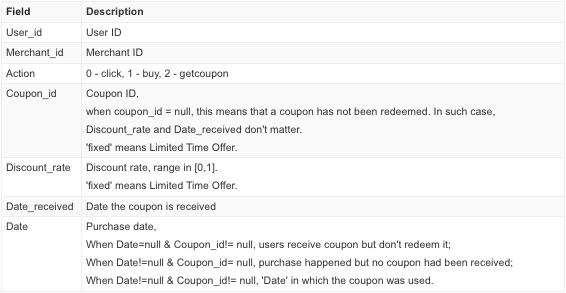

In [27]:
df_on.head()

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0


In [49]:
df=df_on[df_on["Date"].isna()]
df1=df_on
print("Total online data: ",len(df_on))
print("Date==null Total online data where purchases has not taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Date"].isna()) & (df_on["Coupon_id"].isna())]
df1=df_on[df_on["Date"].isna()]
print("Date==null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Date"].isna()) & (df_on["Coupon_id"].isna()==False)]
df1=df_on[df_on["Date"].isna()]
print("Date==null and Coupon!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Date"].isna()==False)]
df1=df_on
print("Date!=null Total online data where purchases have taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna())]
df1=df_on[df_on["Date"].isna()==False]
print("Date!=null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)]
df1=df_on[df_on["Date"].isna()==False]
print("Date!=null and Coupon!=null Coupon Redemption cases : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Total online data:  11429826
Date==null Total online data where purchases has not taken place: 655898 (5.74 %)
Date==null and Coupon==null : 0 (0.00 %)
Date==null and Coupon!=null : 655898 (100.00 %)
Date!=null Total online data where purchases have taken place: 10773928 (94.26 %)
Date!=null and Coupon==null : 10557469 (97.99 %)
Date!=null and Coupon!=null Redemption cases : 216459 (2.01 %)


In [13]:
#Those data where purchase has not taken place irrespective of Coupon was involved in the transaction or not
#i.e where Data=null
df_on[df_on["Date"].isna()]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
Index,,,,,,,
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
73,15137031,25104,2,100120354,150:50,20160613.0,NaN
74,15137031,44706,2,100071973,50:5,20160317.0,NaN
114,15137031,29007,2,100028000,30:1,20160405.0,NaN
115,15137031,18907,2,100086665,300:50,20160406.0,NaN
...,...,...,...,...,...,...,...
11429600,13495131,45902,2,100014418,150:5,20160420.0,NaN
11429601,13495131,45902,2,100176168,200:10,20160420.0,NaN
11429602,14091099,44805,2,100197854,5:1,20160427.0,NaN


In [15]:
df_on[df_on["Date"].isna()].isna().sum()

User_id               0
Merchant_id           0
Action                0
Coupon_id             0
Discount_rate         0
Date_received         0
Date             655898
dtype: int64

In [46]:
#Those data where purchase has taken place irrespective of Coupon was involved in the transaction or not
#i.e where Data!=null
df_on[df_on["Date"].isna()==False]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0
5,14336199,18907,0,NaN,NaN,NaN,20160618.0
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,20160629.0
11429822,13087731,52005,0,NaN,NaN,NaN,20160324.0
11429823,13087731,45611,0,NaN,NaN,NaN,20160422.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [47]:
#this describes that eventhough Date of transaction is not null there are null values in Coupon_id

df_on[df_on["Date"].isna()==False].isna().sum()

User_id                 0
Merchant_id             0
Action                  0
Coupon_id        10557469
Discount_rate    10557469
Date_received    10557469
Date                    0
dtype: int64

In [63]:
#When Date=null & Coupon_id!= null, users receive coupon but don't redeem it;

df_on[(df_on["Date"].isna()) & (df_on["Coupon_id"].isna()==False)]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
73,15137031,25104,2,100120354,150:50,20160613.0,NaN
74,15137031,44706,2,100071973,50:5,20160317.0,NaN
114,15137031,29007,2,100028000,30:1,20160405.0,NaN
115,15137031,18907,2,100086665,300:50,20160406.0,NaN
...,...,...,...,...,...,...,...
11429600,13495131,45902,2,100014418,150:5,20160420.0,NaN
11429601,13495131,45902,2,100176168,200:10,20160420.0,NaN
11429602,14091099,44805,2,100197854,5:1,20160427.0,NaN
11429625,14091099,47412,2,100148588,30:20,20160531.0,NaN


In [64]:
df_on[(df_on["Date"].isna()) & (df_on["Coupon_id"].isna()==False)].isna().sum()

User_id               0
Merchant_id           0
Action                0
Coupon_id             0
Discount_rate         0
Date_received         0
Date             655898
dtype: int64

In [65]:
#When Date!=null & Coupon_id== null, purchase happened but no coupon had been received;

df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna())]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0
5,14336199,18907,0,NaN,NaN,NaN,20160618.0
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,20160629.0
11429822,13087731,52005,0,NaN,NaN,NaN,20160324.0
11429823,13087731,45611,0,NaN,NaN,NaN,20160422.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [66]:
df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna())].isna().sum()

User_id                 0
Merchant_id             0
Action                  0
Coupon_id        10557469
Discount_rate    10557469
Date_received    10557469
Date                    0
dtype: int64

In [67]:
#When Date!=null & Coupon_id!= null, 'Date' in which the coupon was used.

df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
273,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
274,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
279,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
280,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
748,12518031,30314,1,fixed,fixed,20160306.0,20160306.0
...,...,...,...,...,...,...,...
11429496,15299331,18907,1,fixed,fixed,20160308.0,20160308.0
11429499,15299331,18907,1,fixed,fixed,20160319.0,20160319.0
11429620,14091099,42415,1,100177336,50:30,20160615.0,20160615.0
11429791,12985299,49800,1,100181877,10:5,20160516.0,20160517.0


In [68]:
df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)].isna().sum()

User_id          0
Merchant_id      0
Action           0
Coupon_id        0
Discount_rate    0
Date_received    0
Date             0
dtype: int64




for online coupons there are two cases where C-id is not null i.e when c_id=="fixed" and c_id!="fixed"

In [59]:
print("Out of coupon redemption cases:")

df=df_on[(df_on["Coupon_id"].isna()==False) & (df_on["Coupon_id"]=="fixed")]
df1=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)]
print("Coupon_id == fixed : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False) & (df_on["Coupon_id"]!="fixed")]
df1=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)]
print("Coupon != fixed : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Out of coupon redemption cases:
Coupon_id == fixed : 131546 (60.77 %)
Coupon != fixed : 84913 (39.23 %)


In [60]:
#case 1: c_id==fixed
df_on[(df_on["Coupon_id"].isna()==False) & (df_on["Coupon_id"]=="fixed")]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
273,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
274,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
279,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
280,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
748,12518031,30314,1,fixed,fixed,20160306.0,20160306.0
...,...,...,...,...,...,...,...
11428992,12214731,51810,1,fixed,fixed,20160307.0,20160307.0
11429163,15008331,46602,1,fixed,fixed,20160218.0,20160218.0
11429496,15299331,18907,1,fixed,fixed,20160308.0,20160308.0
11429499,15299331,18907,1,fixed,fixed,20160319.0,20160319.0


In [61]:
#case 2: c_id!=fixed
df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False) & (df_on["Coupon_id"]!="fixed")]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
1267,15311631,51109,1,100181535,20:10,20160330.0,20160330.0
1297,12809031,31006,1,100077842,200:10,20160425.0,20160425.0
1497,12299199,19304,1,100193760,50:5,20160506.0,20160506.0
1498,12299199,35803,1,100031020,50:5,20160216.0,20160216.0
1596,12033032,50213,1,100223276,300:5,20160317.0,20160317.0
...,...,...,...,...,...,...,...
11429005,12214731,51810,1,100227578,200:20,20160306.0,20160307.0
11429033,13611531,36705,1,100084281,150:10,20160120.0,20160120.0
11429169,11807331,22109,1,100103688,10:5,20160312.0,20160312.0
11429620,14091099,42415,1,100177336,50:30,20160615.0,20160615.0


In [62]:
df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False) & (df_on["Coupon_id"]!="fixed")].Coupon_id.describe()

count         84913
unique        16979
top       100138104
freq            383
Name: Coupon_id, dtype: object

In [69]:
print("No of unique users in online data: ",df_on.User_id.nunique())

No of unique users in online data:  762858


In [42]:
#which user redeemed the coupon most
df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)].User_id.value_counts()

10511865    81
1789724     74
2187479     72
2914311     71
12775832    70
            ..
12684532     1
13429632     1
4474663      1
2680025      1
13893632     1
Name: User_id, Length: 95655, dtype: int64

In [43]:
#how many unique users redeemed
df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)].User_id.unique().size

95655

In [44]:
#df_on['Date'] = pd.to_datetime(df_on['Date'], format='%Y%m%d')

In [18]:
#dataframe of redemption - df_on_redeem: Date!=null and C_id!=null
df_on_redeem=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()==False)]
df_on_redeem.head()

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
273,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
274,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
279,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
280,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
748,12518031,30314,1,fixed,fixed,20160306.0,20160306.0


In [73]:
#count of total no of unique coupons redeemed
df_on_redeem["Coupon_id"].unique().size

16980

In [74]:
#count of total no of unique Discount Rate redeemed
df_on_redeem["Discount_rate"].unique().size

64

In [75]:
#Date!=null and C_id!=null corresponds to Action-1 Buy (Coupon redemption case) 
df_on_redeem["Action"].unique()

array([1])

### Analysis on Action

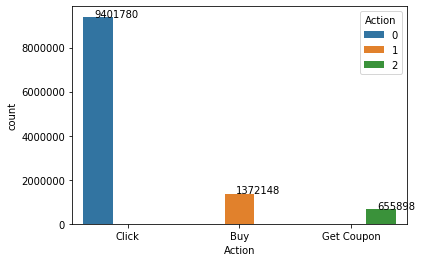

In [86]:
#Count plot of Action on original online data

actions=["Click","Buy","Get Coupon"]

ax = sns.countplot(x="Action",data=df_on,hue="Action")
ax.set(xticks=range(len(actions)), xticklabels=[i for i in actions])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()



#Count plot of Action on coupon redemption cases

actions=["Buy","Click","Get Coupon"]

ax = sns.countplot(x="Action",data=df_on_redeem,hue="Action")
ax.set(xticks=range(len(actions)), xticklabels=[i for i in actions])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

In [17]:
#dataframe of getCoupons i.e Date=null and C_id!=null

df_on_getC=df_on[(df_on["Date"].isna()) & (df_on["Coupon_id"].isna()==False)]
df_on_getC

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
73,15137031,25104,2,100120354,150:50,20160613.0,NaN
74,15137031,44706,2,100071973,50:5,20160317.0,NaN
114,15137031,29007,2,100028000,30:1,20160405.0,NaN
115,15137031,18907,2,100086665,300:50,20160406.0,NaN
...,...,...,...,...,...,...,...
11429600,13495131,45902,2,100014418,150:5,20160420.0,NaN
11429601,13495131,45902,2,100176168,200:10,20160420.0,NaN
11429602,14091099,44805,2,100197854,5:1,20160427.0,NaN
11429625,14091099,47412,2,100148588,30:20,20160531.0,NaN


In [92]:
#Date=null and C_id!=null corresponds to Action-2 GetCoupon 

df_on_getC["Action"].unique()

array([2])

In [16]:
#dataframe of purchases without redemption i.e Date!=null and C_id=null

df_on_no_redeem=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna())]
df_on_no_redeem

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
3,14336199,18907,0,NaN,NaN,NaN,20160618.0
4,14336199,18907,0,NaN,NaN,NaN,20160618.0
5,14336199,18907,0,NaN,NaN,NaN,20160618.0
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,20160629.0
11429822,13087731,52005,0,NaN,NaN,NaN,20160324.0
11429823,13087731,45611,0,NaN,NaN,NaN,20160422.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [94]:
#Date!=null and C_id=null corresponds to Action-0,1 Clicks and Buy

df_on_no_redeem["Action"].unique()

array([1, 0])

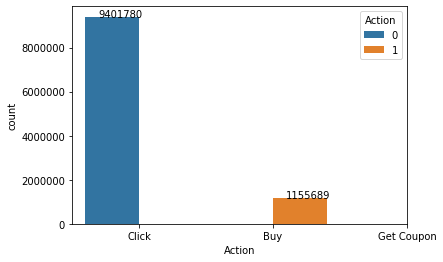

In [95]:
#Count plot of Action on no redeem purchase cases


actions=["Click","Buy","Get Coupon"]

ax = sns.countplot(x="Action",data=df_on_no_redeem,hue="Action")
ax.set(xticks=range(len(actions)), xticklabels=[i for i in actions])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

In [98]:
df=df_on[df_on["Action"]==0]
df1=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna())]
print("Action-0 Clicks when Date=null and C_id!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on[(df_on["Coupon_id"].isna()) & (df_on["Action"]==1)]
df1=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna())]
print("Action-1 Buy when Date=null and C_id!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Action-0 Clicks when Date=null and C_id!=null : 9401780 (89.05 %)
Action-1 Buy when Date=null and C_id!=null : 1155689 (10.95 %)


In [103]:
''''**************************************************************
**************************************************************
******************************************************************************************************************************************************************************************
****************************************************************************************************************************
'''

"'**************************************************************\n**************************************************************\n******************************************************************************************************************************************************************************************\n****************************************************************************************************************************\n"

# Tracking user jorneys

## Case 1: 

In [67]:
df_on

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
Index,,,,,,,
0,13740231,18907,2,100017492,500:50,20160513.0,NaT
1,13740231,34805,1,NaN,NaN,NaN,2016-03-21
2,14336199,18907,0,NaN,NaN,NaN,2016-06-18
3,14336199,18907,0,NaN,NaN,NaN,2016-06-18
4,14336199,18907,0,NaN,NaN,NaN,2016-06-18
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,2016-06-29
11429822,13087731,52005,0,NaN,NaN,NaN,2016-03-24
11429823,13087731,45611,0,NaN,NaN,NaN,2016-04-22


In [70]:
#df_on["Index"]=range(0,)
df_on_new=df_on.copy(deep=True)
df_on_new

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
Index,,,,,,,
0,13740231,18907,2,100017492,500:50,20160513.0,NaT
1,13740231,34805,1,NaN,NaN,NaN,2016-03-21
2,14336199,18907,0,NaN,NaN,NaN,2016-06-18
3,14336199,18907,0,NaN,NaN,NaN,2016-06-18
4,14336199,18907,0,NaN,NaN,NaN,2016-06-18
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,2016-06-29
11429822,13087731,52005,0,NaN,NaN,NaN,2016-03-24
11429823,13087731,45611,0,NaN,NaN,NaN,2016-04-22


In [71]:
df_on.shape

(11429826, 7)

In [72]:
df_on.describe()

,User_id,Merchant_id,Action,Date_received
count,1.142983e+07,1.142983e+07,1.142983e+07,8.723570e+05
mean,1.074683e+07,3.436686e+04,2.348193e-01,2.016037e+07
std,4.137712e+06,1.441243e+04,5.426314e-01,1.560031e+02
min,4.000000e+00,1.000100e+04,0.000000e+00,2.016010e+07
25%,1.019827e+07,2.090100e+04,0.000000e+00,2.016023e+07
50%,1.196970e+07,3.420000e+04,0.000000e+00,2.016040e+07
75%,1.373506e+07,4.741500e+04,0.000000e+00,2.016051e+07
max,1.550000e+07,6.000000e+04,2.000000e+00,2.016062e+07


In [100]:
#merging online and offline data
df_merge = pd.merge(df_on, df_off, how='inner', on=['User_id'])
df_merge

,User_id,Merchant_id_x,Action,Coupon_id_x,Discount_rate_x,Date_received_x,Date_x,Merchant_id_y,Coupon_id_y,Discount_rate_y,Distance,Date_received_y,Date_y
0,556864,12800,1,NaN,NaN,NaN,20160129.0,3381,1807.0,300:30,0.0,20160201.0,NaN
1,556864,52114,2,100140747,10:5,20160321.0,NaN,3381,1807.0,300:30,0.0,20160201.0,NaN
2,556864,29312,1,NaN,NaN,NaN,20160115.0,3381,1807.0,300:30,0.0,20160201.0,NaN
3,15949,27712,0,NaN,NaN,NaN,20160624.0,4043,3222.0,30:5,NaN,20160531.0,NaN
4,15949,27712,0,NaN,NaN,NaN,20160624.0,5717,8192.0,20:5,NaN,20160520.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8481024,5670373,36508,1,NaN,NaN,NaN,20160629.0,2593,NaN,NaN,1.0,NaN,20160311.0
8481025,5670373,49507,1,NaN,NaN,NaN,20160424.0,2593,NaN,NaN,1.0,NaN,20160611.0
8481026,5670373,49507,1,NaN,NaN,NaN,20160424.0,2593,NaN,NaN,1.0,NaN,20160318.0
8481027,5670373,49507,1,NaN,NaN,NaN,20160424.0,2593,NaN,NaN,1.0,NaN,20160613.0


In [74]:
#finding all those users where coupon has been redeemed offline
df_merge[(df_merge["Date_y"].isna()==False) & (df_merge["Coupon_id_y"].isna()==False)]

,User_id,Merchant_id_x,Action,Coupon_id_x,Discount_rate_x,Date_received_x,Date_x,Merchant_id_y,Coupon_id_y,Discount_rate_y,Distance,Date_received_y,Date_y
276,1655176,27512,1,NaN,NaN,NaN,2016-02-26,303,7652.0,0.95,3.0,20160608.0,20160608.0
279,1655176,26700,1,NaN,NaN,NaN,2016-04-14,303,7652.0,0.95,3.0,20160608.0,20160608.0
301,4677164,25600,2,100010481,100:10,20160506.0,NaT,2461,7088.0,30:5,NaN,20160421.0,20160429.0
303,4677164,25600,2,100010481,100:10,20160506.0,NaT,2461,7088.0,30:5,NaN,20160429.0,20160512.0
304,4677164,25600,2,100010481,100:10,20160314.0,NaT,2461,7088.0,30:5,NaN,20160421.0,20160429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8479894,5890369,42912,0,NaN,NaN,NaN,2016-06-08,1433,8735.0,30:5,0.0,20160210.0,20160217.0
8480688,7312777,36610,1,NaN,NaN,NaN,2016-03-26,3532,883.0,50:5,0.0,20160213.0,20160305.0
8480702,7312777,36610,1,NaN,NaN,NaN,2016-03-26,3532,1563.0,30:5,0.0,20160524.0,20160531.0
8480742,7312777,36610,1,NaN,NaN,NaN,2016-03-26,3532,6521.0,50:5,0.0,20160112.0,20160118.0


In [75]:
#picking a single user and tracking its journey offline
df_off[df_off["User_id"]==1655176]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
535642,1655176,303,7652.0,0.95,3.0,20160608.0,20160608.0
535643,1655176,987,10435.0,20:5,0.0,20160423.0,NaN
535644,1655176,987,NaN,NaN,0.0,NaN,20160423.0


In [76]:
#picking same single user and tracking its journey online
df_on[df_on["User_id"]==1655176]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
Index,,,,,,,
1823,1655176,27512,1,NaN,NaN,NaN,2016-02-26
1824,1655176,26700,1,NaN,NaN,NaN,2016-04-14


In [77]:
df_on[(df_on["User_id"]==12299199) & (df_on["Merchant_id"]==19304)]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
Index,,,,,,,
1494,12299199,19304,2,100193760,50:5,20160506.0,NaT
1497,12299199,19304,1,100193760,50:5,20160506.0,2016-05-06
1500,12299199,19304,1,NaN,NaN,NaN,2016-05-06


In [78]:
df_on['User_id'].nunique()

762858

In [79]:
df_off['User_id'].nunique()

539438

In [80]:
df_merge['User_id'].nunique()

267448

In [81]:
df_off_test["User_id"].nunique()

76309

In [82]:
df_merge_test = pd.merge(df_on, df_off_test, how='inner', on=['User_id'])
df_merge_test["User_id"].nunique()

43155

In [83]:
df_off

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaN,20160322.0
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,20160602.0
1754881,212662,2934,NaN,NaN,2.0,NaN,20160321.0
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaN


In [211]:
df_off[df_off["User_id"]==1439408]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
Index,,,,,,,
0,1439408,2632,NaN,NaN,0.0,NaN,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaT
5,1439408,2632,NaN,NaN,0.0,NaN,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,20160516.0,2016-06-13


In [212]:
df_off[df_off["User_id"]==212662]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
Index,,,,,,,
1754872,212662,3532,NaN,NaN,1.0,NaN,2016-03-08
1754873,212662,2934,5686.0,30:5,2.0,20160321.0,2016-03-30
1754874,212662,2934,NaN,NaN,2.0,NaN,2016-05-13
1754875,212662,2934,NaN,NaN,2.0,NaN,2016-05-12
1754876,212662,3532,5267.0,30:5,1.0,20160322.0,NaT
1754877,212662,3021,3739.0,30:1,6.0,20160504.0,2016-05-08
1754878,212662,2934,5686.0,30:5,2.0,20160321.0,2016-03-22
1754879,212662,3532,NaN,NaN,1.0,NaN,2016-03-22
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,2016-06-02


In [84]:
df_off.index.name="Index"
df_off

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
Index,,,,,,,
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaN,20160322.0
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,20160602.0
1754881,212662,2934,NaN,NaN,2.0,NaN,20160321.0


In [85]:
df_off["Coupon_id"].isna()==False

Index
0          False
1           True
2           True
3           True
4           True
           ...  
1754879    False
1754880     True
1754881    False
1754882     True
1754883     True
Name: Coupon_id, Length: 1754884, dtype: bool

In [86]:
df_off=df_off

In [88]:
df_off["Coupon_id"].max()

14045.0

In [89]:
df_on1=df_on[(df_on["Coupon_id"].isna()==False) & (df_on["Coupon_id"]!="fixed")]

In [90]:
df_on1["Coupon_id"]=df_on1["Coupon_id"].astype(int)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
df_off_test["Coupon_id"].max()

14045

In [92]:
df_off_test

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,20160712
1,6949378,1300,3429,30:5,NaN,20160706
2,2166529,7113,6928,200:20,5.0,20160727
3,2166529,7113,1808,100:10,5.0,20160727
4,6172162,7605,6500,30:1,2.0,20160708
...,...,...,...,...,...,...
113635,5828093,5717,10418,30:5,10.0,20160716
113636,6626813,1699,7595,30:1,NaN,20160707
113637,6626813,7321,7590,50:5,NaN,20160712
113638,4547069,760,13602,30:5,0.0,20160717


In [93]:
df_on

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
Index,,,,,,,
0,13740231,18907,2,100017492,500:50,20160513.0,NaT
1,13740231,34805,1,NaN,NaN,NaN,2016-03-21
2,14336199,18907,0,NaN,NaN,NaN,2016-06-18
3,14336199,18907,0,NaN,NaN,NaN,2016-06-18
4,14336199,18907,0,NaN,NaN,NaN,2016-06-18
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,2016-06-29
11429822,13087731,52005,0,NaN,NaN,NaN,2016-03-24
11429823,13087731,45611,0,NaN,NaN,NaN,2016-04-22


In [94]:
df_off_test["Coupon_id"]

0          9983
1          3429
2          6928
3          1808
4          6500
          ...  
113635    10418
113636     7595
113637     7590
113638    13602
113639      613
Name: Coupon_id, Length: 113640, dtype: int64

In [95]:
coupons_online=df_on1["Coupon_id"].astype(int).unique()
coupons_online
#coupons_offline=df_off[df_off["Coupon_id"].isna()==False].astype(int).unique()
#coupons_test=df_off_test[df_off_test["Coupon_id"].isna()==False].astype(int).unique()

array([100017492, 100120354, 100071973, ..., 100028910, 100072733,
       100128593])

In [96]:
coupons_offline=df_off[df_off["Coupon_id"].isna()==False].Coupon_id
np.array(coupons_offline)

array([11002.,  8591.,  1078., ...,  3739.,  1633.,  2705.])

In [97]:
coupons_test=df_off_test[df_off_test["Coupon_id"].isna()==False].Coupon_id.astype(int).unique()
coupons_test

array([ 9983,  3429,  6928, ...,  4853,  1841, 13627])

In [98]:
#Common coupon id b/w online and offline
len(set(coupons_online).intersection(set(coupons_offline)))

0

In [99]:
#Common coupon id b/w online and offline-Test
len(set(coupons_online).intersection(set(coupons_test)))

0

In [100]:
#Common coupon id b/w offline and offline-Test
len(set(coupons_offline).intersection(set(coupons_test)))

1118

**************************************************************
**************************************************************
******************************************************************************************************************************************************************************************
****************************************************************************************************************************

In [104]:
''''**************************************************************
**************************************************************
******************************************************************************************************************************************************************************************
****************************************************************************************************************************
'''

"'**************************************************************\n**************************************************************\n******************************************************************************************************************************************************************************************\n****************************************************************************************************************************\n"

In [5]:
#creating online df after dropping duplicates and creating new feature as count

x = 'Null'    
df_on_unique = (df_on.fillna(x).groupby(['User_id', 'Merchant_id', 'Action', 'Coupon_id', 'Discount_rate',
                'Date_received', 'Date']).size().reset_index().rename(columns={0 : 'Count'}).replace(x,np.NaN))
df_on_unique

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count
0,4,25104,2,100145044,100:10,20160331.0,NaN,1
1,4,45612,1,NaN,NaN,NaN,20160308.0,1
2,36,46701,0,NaN,NaN,NaN,20160120.0,1
3,64,11200,0,NaN,NaN,NaN,20160526.0,1
4,64,29214,0,NaN,NaN,NaN,20160606.0,1
...,...,...,...,...,...,...,...,...
5822538,15499999,55202,0,NaN,NaN,NaN,20160317.0,8
5822539,15499999,56502,0,NaN,NaN,NaN,20160227.0,1
5822540,15499999,59011,0,NaN,NaN,NaN,20160321.0,1
5822541,15499999,59512,0,NaN,NaN,NaN,20160116.0,1


In [106]:
df_on_unique.describe()

,User_id,Merchant_id,Action,Date_received,Date,Count
count,5.822543e+06,5.822543e+06,5.822543e+06,7.591000e+05,5.261557e+06,5.822543e+06
mean,1.060876e+07,3.476125e+04,3.441718e-01,2.016037e+07,2.016039e+07,1.963030e+00
std,4.223469e+06,1.426606e+04,6.468478e-01,1.560425e+02,1.719625e+02,3.430659e+00
min,4.000000e+00,1.000100e+04,0.000000e+00,2.016010e+07,2.016010e+07,1.000000e+00
25%,1.009617e+07,2.220900e+04,0.000000e+00,2.016023e+07,2.016023e+07,1.000000e+00
50%,1.190160e+07,3.490800e+04,0.000000e+00,2.016040e+07,2.016041e+07,1.000000e+00
75%,1.370237e+07,4.751000e+04,0.000000e+00,2.016051e+07,2.016052e+07,2.000000e+00
max,1.550000e+07,6.000000e+04,2.000000e+00,2.016062e+07,2.016063e+07,6.300000e+02


In [137]:
df=df_on_unique
df1=df_on
print("% decrease in online data size : {} ({:.2f} %)".format(len(df),
      (len(df1)-len(df))/len(df1) * 100 ))

% decrease in online data size : 5822543 (49.06 %)


# Offline Consumption Data Analysis


Field	Description
User_id	User ID
Merchant_id	Merchant ID
Coupon_id	"Coupon ID,
when coupon_id = null, this means that a coupon has not been redeemed. In such case, Discount_rate and Date_received don't matter."
Discount_rate	Discount rate, range in [0,1]
Distance	"500x, the distance from the nearest shop around the user for locations in which a user is most active.
x range in [0,10];
0 – less than 500 meters;
10 – more than 5 kilometres."
Date_received	Date the coupon is received
Date	"Purchase date,
When Date=null & Coupon_id!= null, users receive coupon but don't redeem it;
When Date!=null & Coupon_id= null, purchase happened but no coupon had been received;
When Date!=null & Coupon_id!= null, 'Date' in which the coupon was used."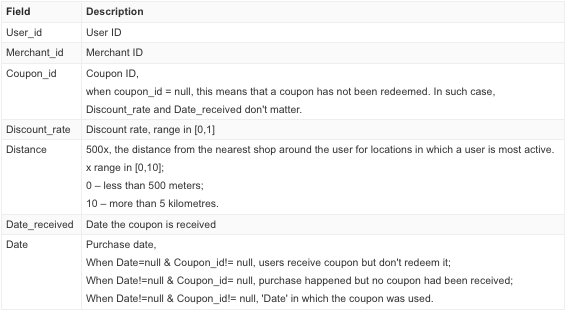

In [109]:
df_off

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaN,20160322.0
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,20160602.0
1754881,212662,2934,NaN,NaN,2.0,NaN,20160321.0
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaN


In [113]:
df=df_off[df_off["Date"].isna()]
df1=df_off
print("Total offline data: ",len(df_off))
print("Date==null Total offline data where purchases has not taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off[(df_off["Date"].isna()) & (df_off["Coupon_id"].isna())]
df1=df_off[df_off["Date"].isna()]
print("Date==null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off[(df_off["Date"].isna()) & (df_off["Coupon_id"].isna()==False)]
df1=df_off[df_off["Date"].isna()]
print("Date==null and Coupon!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off[(df_off["Date"].isna()==False)]
df1=df_off
print("Date!=null Total offline data where purchases have taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna())]
df1=df_off[df_off["Date"].isna()==False]
print("Date!=null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna()==False)]
df1=df_off[df_off["Date"].isna()==False]
print("Date!=null and Coupon!=null Coupon Redemption cases : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Total offline data:  1754884
Date==null Total online data where purchases has not taken place: 977900 (55.72 %)
Date==null and Coupon==null : 0 (0.00 %)
Date==null and Coupon!=null : 977900 (100.00 %)
Date!=null Total online data where purchases have taken place: 776984 (44.28 %)
Date!=null and Coupon==null : 701602 (90.30 %)
Date!=null and Coupon!=null Coupon Redemption cases : 75382 (9.70 %)


In [114]:
#Those data where purchase has not taken place irrespective of Coupon was involved in the transaction or not
#i.e where Data=null
df_off[df_off["Date"].isna()]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN
...,...,...,...,...,...,...,...
1754866,3795296,5341,111.0,30:5,0.0,20160129.0,NaN
1754869,188086,6568,4723.0,30:1,0.0,20160415.0,NaN
1754876,212662,3532,5267.0,30:5,1.0,20160322.0,NaN
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaN


In [115]:
df_off[df_off["Date"].isna()].isna().sum()

User_id               0
Merchant_id           0
Coupon_id             0
Discount_rate         0
Distance          97786
Date_received         0
Date             977900
dtype: int64

In [116]:
#Those data where purchase has taken place irrespective of Coupon was involved in the transaction or not
#i.e where Data!=null
df_off[df_off["Date"].isna()==False]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0
11,2029232,6459,NaN,NaN,0.0,NaN,20160626.0
12,2029232,6459,NaN,NaN,0.0,NaN,20160519.0
...,...,...,...,...,...,...,...
1754877,212662,3021,3739.0,30:1,6.0,20160504.0,20160508.0
1754878,212662,2934,5686.0,30:5,2.0,20160321.0,20160322.0
1754879,212662,3532,NaN,NaN,1.0,NaN,20160322.0
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,20160602.0


In [117]:
#this describes that eventhough Date of transaction is not null there are null values in Coupon_id

df_off[df_off["Date"].isna()==False].isna().sum()

User_id               0
Merchant_id           0
Coupon_id        701602
Discount_rate    701602
Distance           8217
Date_received    701602
Date                  0
dtype: int64

In [118]:
#When Date=null & Coupon_id!= null, users receive coupon but don't redeem it;

df_off[(df_off["Date"].isna()) & (df_off["Coupon_id"].isna()==False)]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaN
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaN
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaN
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaN
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaN
...,...,...,...,...,...,...,...
1754866,3795296,5341,111.0,30:5,0.0,20160129.0,NaN
1754869,188086,6568,4723.0,30:1,0.0,20160415.0,NaN
1754876,212662,3532,5267.0,30:5,1.0,20160322.0,NaN
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaN


In [119]:
df_off[(df_off["Date"].isna()) & (df_off["Coupon_id"].isna()==False)].isna().sum()

User_id               0
Merchant_id           0
Coupon_id             0
Discount_rate         0
Distance          97786
Date_received         0
Date             977900
dtype: int64

In [120]:
#When Date!=null & Coupon_id== null, purchase happened but no coupon had been received;

df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna())]


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,20160217.0
5,1439408,2632,NaN,NaN,0.0,NaN,20160516.0
11,2029232,6459,NaN,NaN,0.0,NaN,20160626.0
12,2029232,6459,NaN,NaN,0.0,NaN,20160519.0
14,196342,1579,NaN,NaN,1.0,NaN,20160606.0
...,...,...,...,...,...,...,...
1754872,212662,3532,NaN,NaN,1.0,NaN,20160308.0
1754874,212662,2934,NaN,NaN,2.0,NaN,20160513.0
1754875,212662,2934,NaN,NaN,2.0,NaN,20160512.0
1754879,212662,3532,NaN,NaN,1.0,NaN,20160322.0


In [121]:
df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna())].isna().sum()

User_id               0
Merchant_id           0
Coupon_id        701602
Discount_rate    701602
Distance              0
Date_received    701602
Date                  0
dtype: int64

In [122]:
#When Date!=null & Coupon_id!= null, 'Date' in which the coupon was used.

df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna()==False)]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0
33,1113008,1361,11166.0,20:1,0.0,20160515.0,20160521.0
38,2881376,8390,7531.0,20:5,0.0,20160321.0,20160329.0
69,114747,6901,2366.0,30:5,0.0,20160523.0,20160605.0
75,114747,5341,111.0,30:5,0.0,20160127.0,20160221.0
...,...,...,...,...,...,...,...
1754833,1437872,7706,416.0,100:10,4.0,20160129.0,20160202.0
1754873,212662,2934,5686.0,30:5,2.0,20160321.0,20160330.0
1754877,212662,3021,3739.0,30:1,6.0,20160504.0,20160508.0
1754878,212662,2934,5686.0,30:5,2.0,20160321.0,20160322.0


In [124]:
df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna()==False)].isna().sum()

User_id             0
Merchant_id         0
Coupon_id           0
Discount_rate       0
Distance         8217
Date_received       0
Date                0
dtype: int64

In [125]:
print("No of unique users in offline data: ",df_off.User_id.nunique())

No of unique users in offline data:  539438


In [126]:
#which user redeemed the coupon most
df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna()==False)].User_id.value_counts()


2751537    118
6641735    113
6929894     93
501441      73
2839484     71
          ... 
5113958      1
3133533      1
645212       1
2052173      1
6684672      1
Name: User_id, Length: 46395, dtype: int64

In [127]:
#how many unique users redeemed
df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna()==False)].User_id.unique().size

46395

In [14]:
#dataframe of redemption - df_off_redeem: Date!=null and C_id!=null
df_off_redeem=df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna()==False)]
df_off_redeem.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,20:1,0.0,20160516.0,20160613.0
33,1113008,1361,11166.0,20:1,0.0,20160515.0,20160521.0
38,2881376,8390,7531.0,20:5,0.0,20160321.0,20160329.0
69,114747,6901,2366.0,30:5,0.0,20160523.0,20160605.0
75,114747,5341,111.0,30:5,0.0,20160127.0,20160221.0


In [15]:
#count of total no of unique coupons redeemed
df_off_redeem["Coupon_id"].unique().size

6865

In [130]:
#count of total no of unique Discount Rate redeemed
df_off_redeem["Discount_rate"].unique().size

45

In [250]:
df_off.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date'],
      dtype='object')

In [161]:
#count of total no of unique distances where coupons redeemed
dist=df_off_redeem.Distance.unique()
dist.sort
dist

array([ 0.,  1.,  8., 10.,  3., nan,  2.,  5.,  9.,  4.,  6.,  7.])

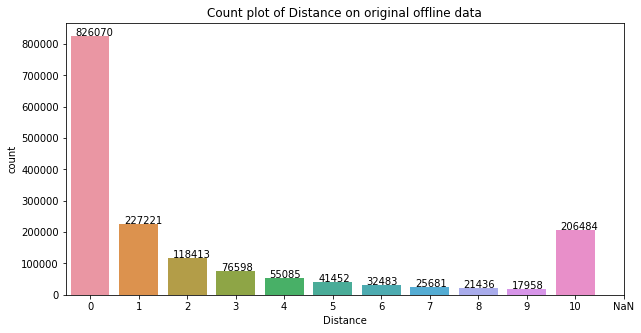

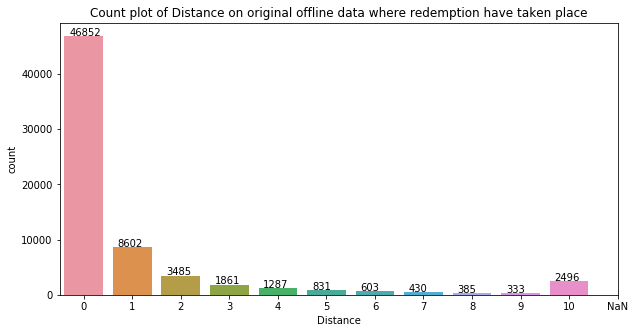

In [177]:
#Count plot of Distance on original offline data

dist=[0,1,2,3,4,5,6,7,8,9,10,"NaN"]
plt.figure(figsize=(10,5))
plt.title("Count plot of Distance on original offline data")
ax = sns.countplot(x="Distance",data=df_off)
ax.set(xticks=range(len(dist)), xticklabels=[i for i in dist])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()




#Count plot of Distance on original offline data where redemption have taken place

dist=[0,1,2,3,4,5,6,7,8,9,10,"NaN"]
plt.figure(figsize=(10,5))
plt.title("Count plot of Distance on original offline data where redemption have taken place")
ax = sns.countplot(x="Distance",data=df_off_redeem)
ax.set(xticks=range(len(dist)), xticklabels=[i for i in dist])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

In [6]:
#creating offline df after dropping duplicates and creating new feature as count


x = 'Null'
df_off_unique = (df_off.fillna(x).groupby(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date']).size().reset_index().rename(columns={0 : 'Count'}).replace(x,np.NaN))
df_off_unique

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count
0,4,1433,8735.0,30:5,10.0,20160214.0,NaN,1
1,4,1469,2902.0,0.95,10.0,20160607.0,NaN,1
2,35,3381,1807.0,300:30,0.0,20160130.0,NaN,1
3,35,3381,9776.0,10:5,0.0,20160129.0,NaN,1
4,35,3381,11951.0,200:20,0.0,20160129.0,NaN,1
...,...,...,...,...,...,...,...,...
1716986,7360967,3103,NaN,NaN,2.0,NaN,20160120.0,1
1716987,7360967,6485,10323.0,20:5,1.0,20160322.0,NaN,2
1716988,7361024,1433,8735.0,30:5,10.0,20160211.0,NaN,1
1716989,7361032,2146,11173.0,100:10,2.0,20160129.0,NaN,1


In [182]:
df_off_unique.describe()

,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date,Count
count,1.716991e+06,1.716991e+06,1.015389e+06,1.614682e+06,1.015389e+06,7.746660e+05,1.716991e+06
mean,3.689078e+06,4.035106e+03,6.820978e+03,2.372820e+00,2.016032e+07,2.016040e+07,1.022069e+00
std,2.123275e+06,2.438612e+03,4.167560e+03,3.491030e+00,1.792494e+02,1.622416e+02,1.555926e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07,1.000000e+00
25%,1.845274e+06,1.948000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07,1.000000e+00
50%,3.694222e+06,3.532000e+03,7.430000e+03,1.000000e+00,2.016032e+07,2.016042e+07,1.000000e+00
75%,5.528442e+06,6.317000e+03,1.021100e+04,3.000000e+00,2.016052e+07,2.016052e+07,1.000000e+00
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07,1.200000e+01


In [136]:
df=df_off_unique
df1=df_off
print("% decrease in offline data size : {} ({:.2f} %)".format(len(df),
      (len(df1)-len(df))/len(df1) * 100 ))

% decrease in offline data size : 1716991 (2.16 %)


## Creating dataframe corresponding to only Offline and only to Online consumptions 

In [87]:
#number of unique users having both online and offline presence
list_on_off = set(df_on_unique["User_id"].unique()).intersection(set(df_off_unique["User_id"].unique()))

#number of unique users in online data
list_on = set(df_on_unique["User_id"].unique())  

#number of unique users in offline data
list_off = set(df_off_unique["User_id"].unique())  #number of users in offline data
print("No of unique users:\n")
print("1. All online {}".format(len(list_on)))
print("2. All offline {}".format(len(list_off)))
print("3. Both online and offline {}".format(len(list_on_off)))
print("4. only online {} ".format(len(list_on - list_on_off)))
print("5. only offline modes {}".format(len(list_off - list_on_off)))


#creating dataframes of only online and only offline consumptions
df_on_only = df_on_unique[df_on_unique['User_id'].isin(list(list_on - list_on_off))]
df_off_only = df_off_unique[df_off_unique['User_id'].isin(list(list_off - list_on_off))]

No of unique users:

1. All online 762858
2. All offline 539438
3. Both online and offline 267448
4. only online 495410 
5. only offline modes 271990


In [197]:
#distribution of only online consumptions 

df=df_on_only[df_on_only["Date"].isna()]
df1=df_on_only
print("Total online data: ",len(df_on_only))
print("Date==null Total online data where purchases has not taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Date"].isna()) & (df_on_only["Coupon_id"].isna())]
df1=df_on_only[df_on_only["Date"].isna()]
print("Date==null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Date"].isna()) & (df_on_only["Coupon_id"].isna()==False)]
df1=df_on_only[df_on_only["Date"].isna()]
print("Date==null and Coupon!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Date"].isna()==False)]
df1=df_on_only
print("Date!=null Total online data where purchases have taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna())]
df1=df_on_only[df_on_only["Date"].isna()==False]
print("Date!=null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna()==False)]
df1=df_on_only[df_on_only["Date"].isna()==False]
print("Date!=null and Coupon!=null Coupon Redemption cases : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

print("Out of coupon redemption cases:")

df=df_on_only[(df_on_only["Coupon_id"].isna()==False) & (df_on_only["Coupon_id"]=="fixed")]
df1=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna()==False)]
print("Coupon_id == fixed : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna()==False) & (df_on_only["Coupon_id"]!="fixed")]
df1=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna()==False)]
print("Coupon != fixed : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Total online data:  4557134
Date==null Total online data where purchases has not taken place: 362402 (7.95 %)
Date==null and Coupon==null : 0 (0.00 %)
Date==null and Coupon!=null : 362402 (100.00 %)
Date!=null Total online data where purchases have taken place: 4194732 (92.05 %)
Date!=null and Coupon==null : 4057804 (96.74 %)
Date!=null and Coupon!=null Coupon Redemption cases : 136928 (3.26 %)
Out of coupon redemption cases:
Coupon_id == fixed : 83448 (60.94 %)
Coupon != fixed : 53480 (39.06 %)


In [157]:
#distribution of only offline consumptions 


df=df_off_only[df_off_only["Date"].isna()]
df1=df_off_only
print("Total offline data: ",len(df_off_only))
print("Date==null Total offline data where purchases has not taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off_only[(df_off_only["Date"].isna()) & (df_off_only["Coupon_id"].isna())]
df1=df_off_only[df_off_only["Date"].isna()]
print("Date==null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off_only[(df_off_only["Date"].isna()) & (df_off_only["Coupon_id"].isna()==False)]
df1=df_off_only[df_off_only["Date"].isna()]
print("Date==null and Coupon!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off_only[(df_off_only["Date"].isna()==False)]
df1=df_off_only
print("Date!=null Total offline data where purchases have taken place: {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off_only[(df_off_only["Date"].isna()==False) & (df_off_only["Coupon_id"].isna())]
df1=df_off_only[df_off_only["Date"].isna()==False]
print("Date!=null and Coupon==null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_off_only[(df_off_only["Date"].isna()==False) & (df_off_only["Coupon_id"].isna()==False)]
df1=df_off_only[df_off_only["Date"].isna()==False]
print("Date!=null and Coupon!=null Coupon Redemption cases : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Total offline data:  813629
Date==null Total online data where purchases has not taken place: 453812 (55.78 %)
Date==null and Coupon==null : 0 (0.00 %)
Date==null and Coupon!=null : 453812 (100.00 %)
Date!=null Total online data where purchases have taken place: 359817 (44.22 %)
Date!=null and Coupon==null : 325241 (90.39 %)
Date!=null and Coupon!=null Coupon Redemption cases : 34576 (9.61 %)


In [88]:
df_off_only_redeem=df_off_only[(df_off_only["Date"].isna()==False) & (df_off_only["Coupon_id"].isna()==False)]
df_on_only_redeem=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna()==False)]

### Action analysis of only online data

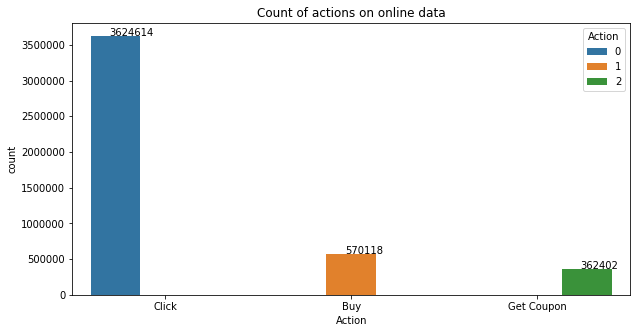

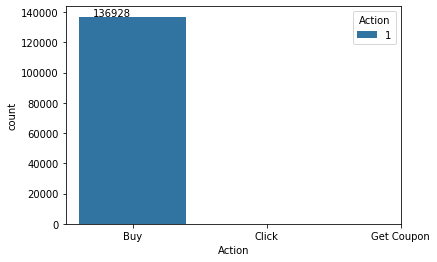

In [233]:
#Count plot of Action on original online data

actions=["Click","Buy","Get Coupon"]

plt.figure(figsize=(10,5))
plt.title("Count of actions on online data")
ax = sns.countplot(x="Action",data=df_on_only,hue="Action")
ax.set(xticks=range(len(actions)), xticklabels=[i for i in actions])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()



#Count plot of Action on coupon redemption cases

actions=["Buy","Click","Get Coupon"]

ax = sns.countplot(x="Action",data=df_on_only_redeem,hue="Action")
ax.set(xticks=range(len(actions)), xticklabels=[i for i in actions])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()


In [89]:
#dataframe of getCoupons i.e Date=null and C_id!=null
df_on_only_getC=df_on_only[(df_on_only["Date"].isna()) & (df_on_only["Coupon_id"].isna()==False)]

#Date=null and C_id!=null corresponds to Action-2 GetCoupon 
df_on_only_getC["Action"].unique()

array([2])

In [90]:
#dataframe of purchases without redemption i.e Date!=null and C_id=null
df_on_only_no_redeem=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna())]


#Date!=null and C_id=null corresponds to Action-0,1 Clicks and Buy
df_on_only_no_redeem["Action"].unique()


array([0, 1])

In [195]:
df=df_on_only[df_on_only["Action"]==0]
df1=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna())]
print("Action-0 Clicks when Date=null and C_id!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

df=df_on_only[(df_on_only["Coupon_id"].isna()) & (df_on_only["Action"]==1)]
df1=df_on_only[(df_on_only["Date"].isna()==False) & (df_on_only["Coupon_id"].isna())]
print("Action-1 Buy when Date=null and C_id!=null : {} ({:.2f} %)".format(len(df),
      len(df)/len(df1) * 100 ))

Action-0 Clicks when Date=null and C_id!=null : 3624614 (89.32 %)
Action-1 Buy when Date=null and C_id!=null : 433190 (10.68 %)


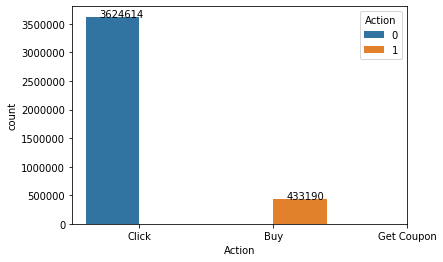

In [196]:
#Count plot of Action on no redeem purchase cases


actions=["Click","Buy","Get Coupon"]

ax = sns.countplot(x="Action",data=df_on_only_no_redeem,hue="Action")
ax.set(xticks=range(len(actions)), xticklabels=[i for i in actions])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()


### Distance plot of only offline data

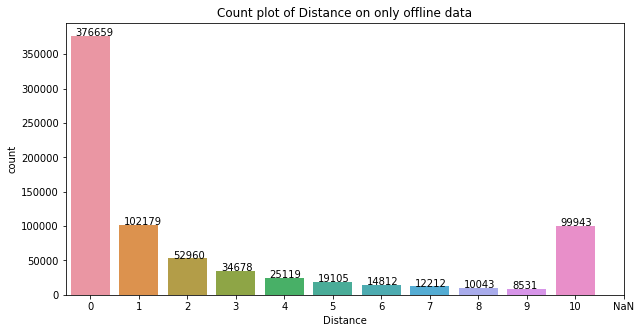

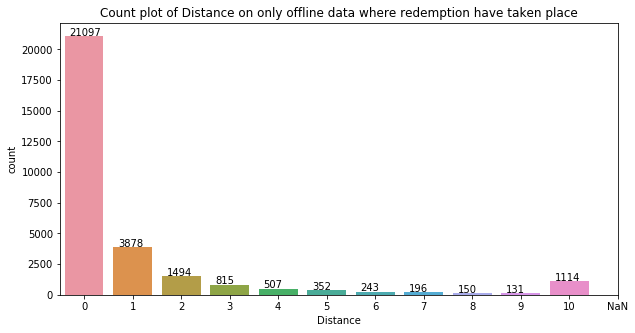

In [178]:
#Count plot of Distance on only offline data

dist=[0,1,2,3,4,5,6,7,8,9,10,"NaN"]
plt.figure(figsize=(10,5))
plt.title("Count plot of Distance on only offline data")
ax = sns.countplot(x="Distance",data=df_off_only)
ax.set(xticks=range(len(dist)), xticklabels=[i for i in dist])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()


#Count plot of Distance on only offline data where redemption have taken place


dist=[0,1,2,3,4,5,6,7,8,9,10,"NaN"]
plt.figure(figsize=(10,5))
plt.title("Count plot of Distance on only offline data where redemption have taken place")
ax = sns.countplot(x="Distance",data=df_off_only_redeem)
ax.set(xticks=range(len(dist)), xticklabels=[i for i in dist])
ax.set_xticklabels(ax.get_xticklabels())

for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

plt.show()

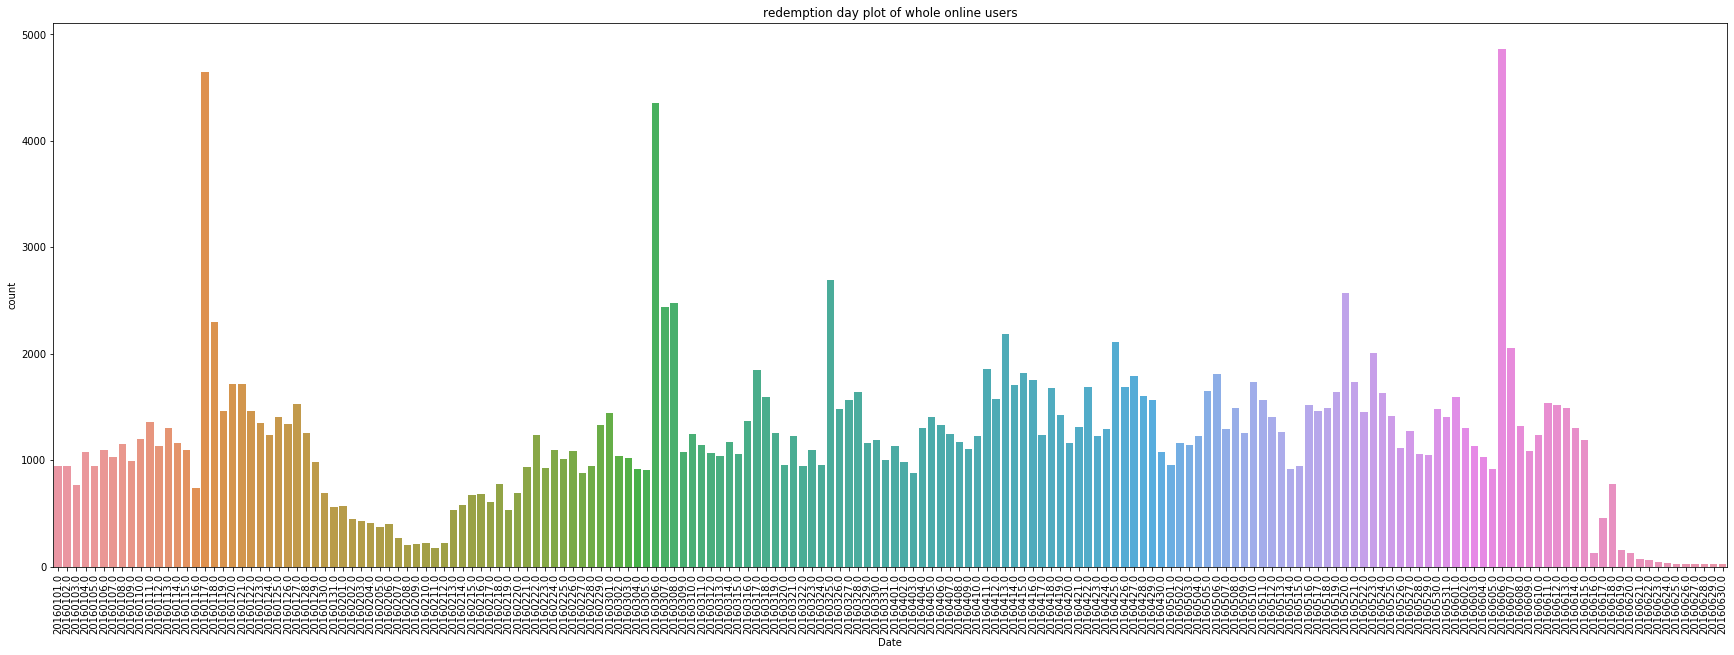

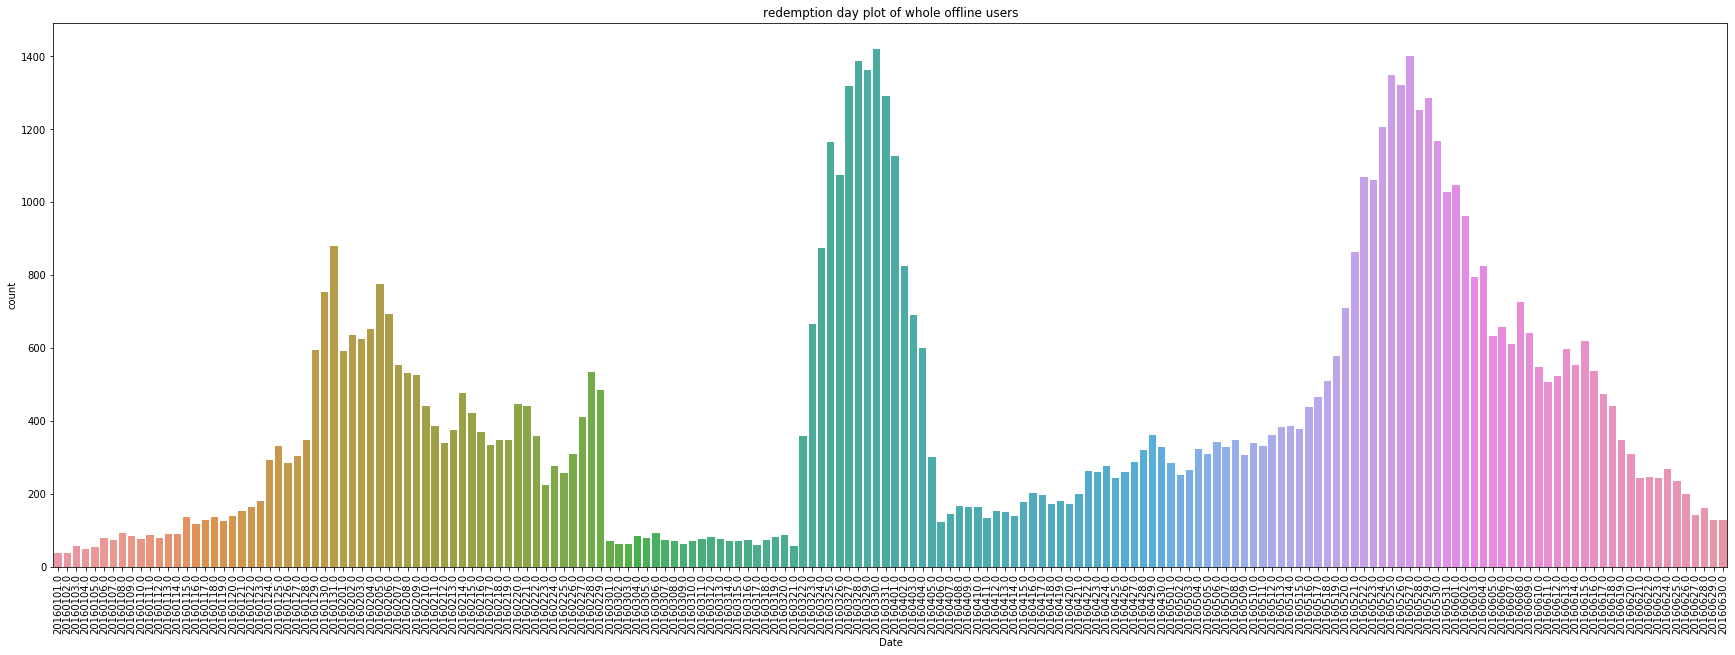

In [56]:
#redemption day plot of whole online users

df=df_on[(df_on["Date"].isna()==False) & (df_on["Coupon_id"].isna()) & (df_on["Action"]==1)]

plt.figure(figsize=(30,10))
plt.title("redemption day plot of whole online users")
#ax=sns.lineplot(data=df["Date"])
ax=sns.countplot(x="Date",data=df_on_redeem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()



'''survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1,figsize=(10, 4))
#women = train_df[train_df['Sex']=='female']
#men = train_df[train_df['Sex']=='male']
ax = sns.distplot(df, bins=18, label = 'Date', ax = axes[0], kde =False)
ax = sns.distplot(df_on_redeem, bins=40, label = 'Date', ax = axes[0], kde =False)
ax.legend()
#ax.set_title('Female')
#ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
#ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
#ax.legend()
#_ = ax.set_title('Male')

'''
# redemption day plot of whole offline users
df1=df_off[(df_off["Date"].isna()==False) & (df_off["Coupon_id"].isna())]
plt.figure(figsize=(30,10))
plt.title("redemption day plot of whole offline users")
ax=sns.countplot(x="Date",data=df_off_redeem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [206]:
no_of_days=df_on_only["Date"].nunique()

total_on_redemtions=df_on_unique[(df_on_unique["Date"].isna()==False) & (df_on_unique["Coupon_id"].isna()==False)].Count.sum()
print("Average coupon redemption per day online {:.2f}".format(total_on_redemtions/no_of_days))


total_off_redemtions=df_off_unique[(df_off_unique["Date"].isna()==False) & (df_off_unique["Coupon_id"].isna()==False)].Count.sum()
print("Average coupon redemption per day offline {:.2f}".format(total_off_redemtions/no_of_days))

Average coupon redemption per day online 1189.34
Average coupon redemption per day offline 414.19


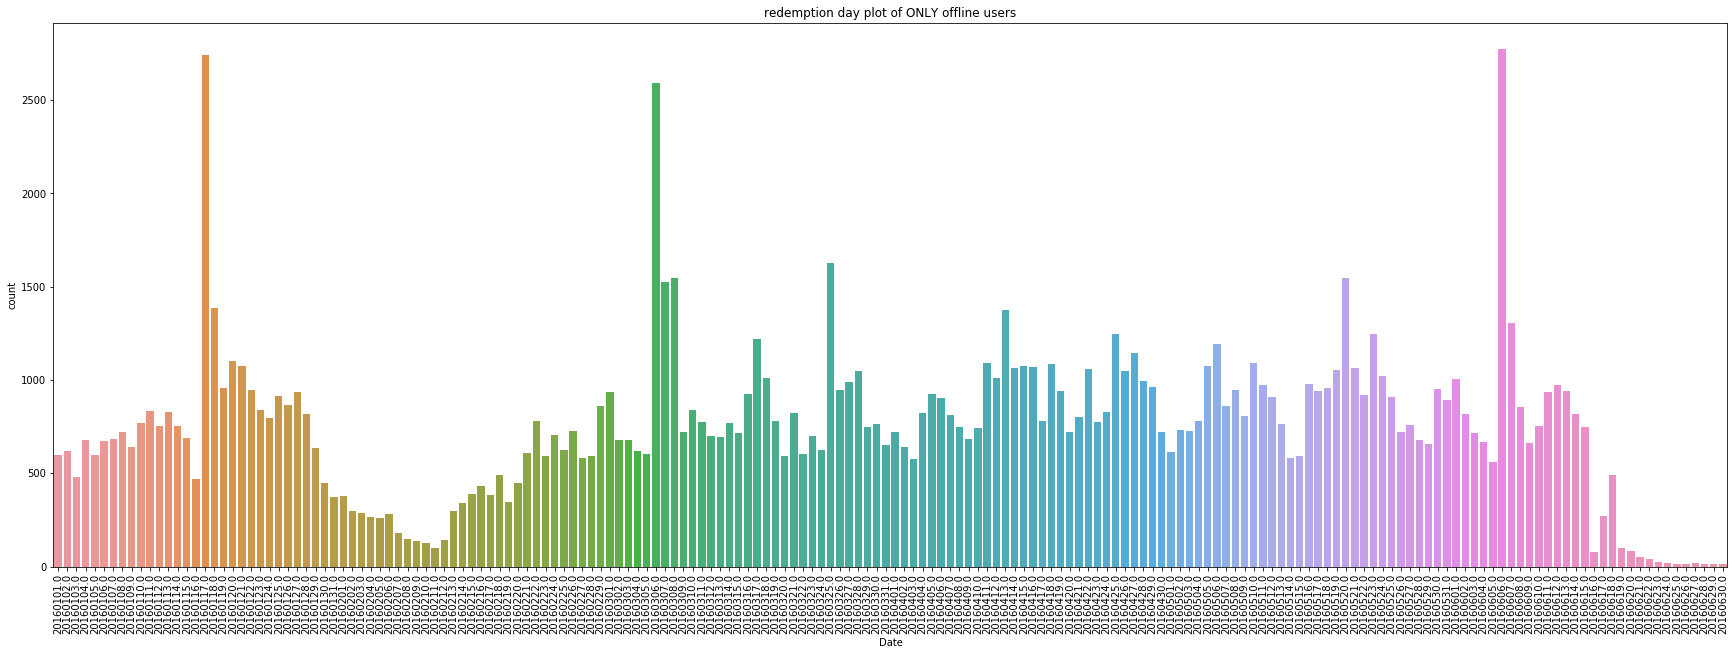

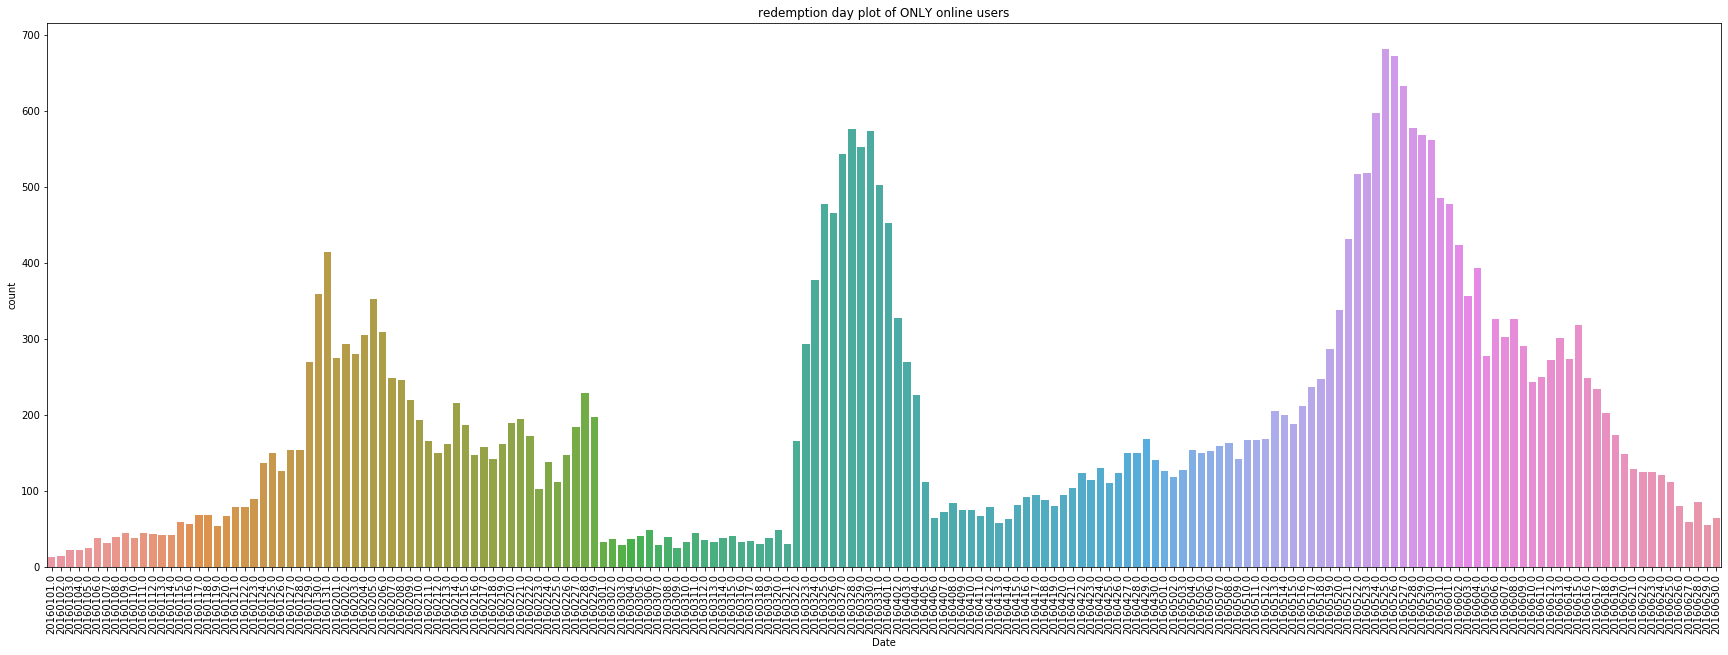

In [205]:
# redemption day plot of ONLY online users
plt.figure(figsize=(30,10))
plt.title("redemption day plot of ONLY offline users")
ax=sns.countplot(x="Date",data=df_on_only_redeem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


# redemption day plot of ONLY offline users
plt.figure(figsize=(30,10))
plt.title("redemption day plot of ONLY online users")
ax=sns.countplot(x="Date",data=df_off_only_redeem)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [207]:
no_of_days=df_on_only["Date"].nunique()

total_on_redemtions=df_on_only_redeem.Count.sum()
print("Average coupon redemption per day only online {:.2f}".format(total_on_redemtions/no_of_days))


total_off_redemtions=df_off_only_redeem.Count.sum()
print("Average coupon redemption per day only offline {:.2f}".format(total_off_redemtions/no_of_days))

Average coupon redemption per day only online 826.68
Average coupon redemption per day only offline 196.12


# Online + Offline data analysis 

In [71]:
df_on_off = df_on_unique.append(df_off_unique, sort=False)
#list_on_off = set(df_on_unique["User_id"].unique()).intersection(set(df_off_unique["User_id"].unique()))
df_on_off = df_on_off[df_on_off['User_id'].isin(list(list_on_off))]
df_on_off.sort_values(by="User_id",inplace=True)
df_on_off.reset_index()
df_on_off.reset_index(level=0, drop=True)

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count,Distance
0,4,25104,2.0,100145044,100:10,20160331.0,NaN,1,NaN
1,4,1469,NaN,2902,0.95,20160607.0,NaN,1,10.0
2,4,1433,NaN,8735,30:5,20160214.0,NaN,1,10.0
3,4,45612,1.0,NaN,NaN,NaN,20160308.0,1,NaN
4,36,5717,NaN,12349,20:5,20160125.0,NaN,1,8.0
...,...,...,...,...,...,...,...,...,...
2168766,7360967,52910,1.0,NaN,NaN,NaN,20160407.0,32,NaN
2168767,7360967,760,NaN,NaN,NaN,NaN,20160625.0,1,1.0
2168768,7361032,2146,NaN,11173,100:10,20160129.0,NaN,1,2.0
2168769,7361032,59701,1.0,NaN,NaN,NaN,20160506.0,1,NaN


In [72]:
print("No of unique users in online-offline mode {}: ".format(df_on_off["User_id"].nunique()))

No of unique users in online-offline mode 267448: 


In [350]:
df_off[(df_off["Date"].isna()==False) & (df_off["Distance"].isna())].Merchant_id.value_counts()

1520    1108
6485     243
6135     187
760      156
2934     148
        ... 
4478       1
6511       1
4446       1
8536       1
4106       1
Name: Merchant_id, Length: 1405, dtype: int64

In [357]:
df_off[(df_off["Date"].isna()==False) & (df_off["Distance"].isna())]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
405,3821408,2970,13704.0,100:30,NaN,20160522.0,2016-06-04
617,74955,1520,8140.0,0.95,NaN,20160229.0,2016-03-02
735,1398704,924,10164.0,0.95,NaN,20160314.0,2016-03-15
792,568920,4970,11376.0,20:1,NaN,20160511.0,2016-05-22
793,568920,4970,11376.0,20:1,NaN,20160501.0,2016-05-11
...,...,...,...,...,...,...,...
1753182,1096367,2934,5686.0,30:5,NaN,20160326.0,2016-03-27
1753600,5821116,7223,6155.0,30:5,NaN,20160525.0,2016-06-02
1753824,1867439,5562,5886.0,30:5,NaN,20160606.0,2016-06-19
1753998,92523,1041,5196.0,30:5,NaN,20160522.0,2016-05-29


In [359]:
df_off[(df_off["Distance"].isna()) & (df_off["Distance"].isna()].User_id.nunique()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
619,74955,6901,2366.0,30:5,0.0,20160512.0,NaT
620,74955,4033,13517.0,30:5,10.0,20160506.0,2016-05-14
622,74955,6901,NaN,NaN,0.0,NaN,2016-03-19
623,74955,6901,NaN,NaN,0.0,NaN,2016-01-17
624,74955,760,2418.0,30:5,0.0,20160609.0,NaT
625,74955,1566,8385.0,0.95,10.0,20160514.0,NaT
626,74955,4033,NaN,NaN,10.0,NaN,2016-05-06
627,74955,6901,NaN,NaN,0.0,NaN,2016-03-09


In [361]:
df_off[(df_off["Date"].isna()) & (df_off["Coupon_id"].isna()==False)]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaT
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaT
...,...,...,...,...,...,...,...
1754866,3795296,5341,111.0,30:5,0.0,20160129.0,NaT
1754869,188086,6568,4723.0,30:1,0.0,20160415.0,NaT
1754876,212662,3532,5267.0,30:5,1.0,20160322.0,NaT
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaT


In [364]:
df_off[df_off["User_id"]==1439408]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaT
5,1439408,2632,NaN,NaN,0.0,NaN,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,20160516.0,2016-06-13


### H: Distance will be same or null for each user merchant pair

In [452]:
df_off.groupby(["User_id","Merchant_id"])["Distance"].nunique()

User_id  Merchant_id
4        1433           1
         1469           1
35       3381           1
36       1041           1
         5717           1
                       ..
7360967  3103           1
         6485           1
7361024  1433           1
7361032  2146           1
         7019           1
Name: Distance, Length: 921146, dtype: int64

In [453]:
df_off.groupby(["User_id","Merchant_id"])["Distance"].nunique().describe()

count    921146.000000
mean          0.905508
std           0.292512
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Distance, dtype: float64

### H: Discount rate same for each Coupon_id

In [447]:
df_off.groupby(["Coupon_id"])["Discount_rate"].nunique().describe()

count    9738.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Discount_rate, dtype: float64

Proved as std=0

### H: Users offline prefer a particular merchant 

In [399]:
df_off.groupby(["User_id","Merchant_id"]).size()

User_id  Merchant_id
4        1433           1
         1469           1
35       3381           4
36       1041           1
         5717           1
                       ..
7360967  3103           4
         6485           2
7361024  1433           1
7361032  2146           1
         7019           1
Length: 921146, dtype: int64

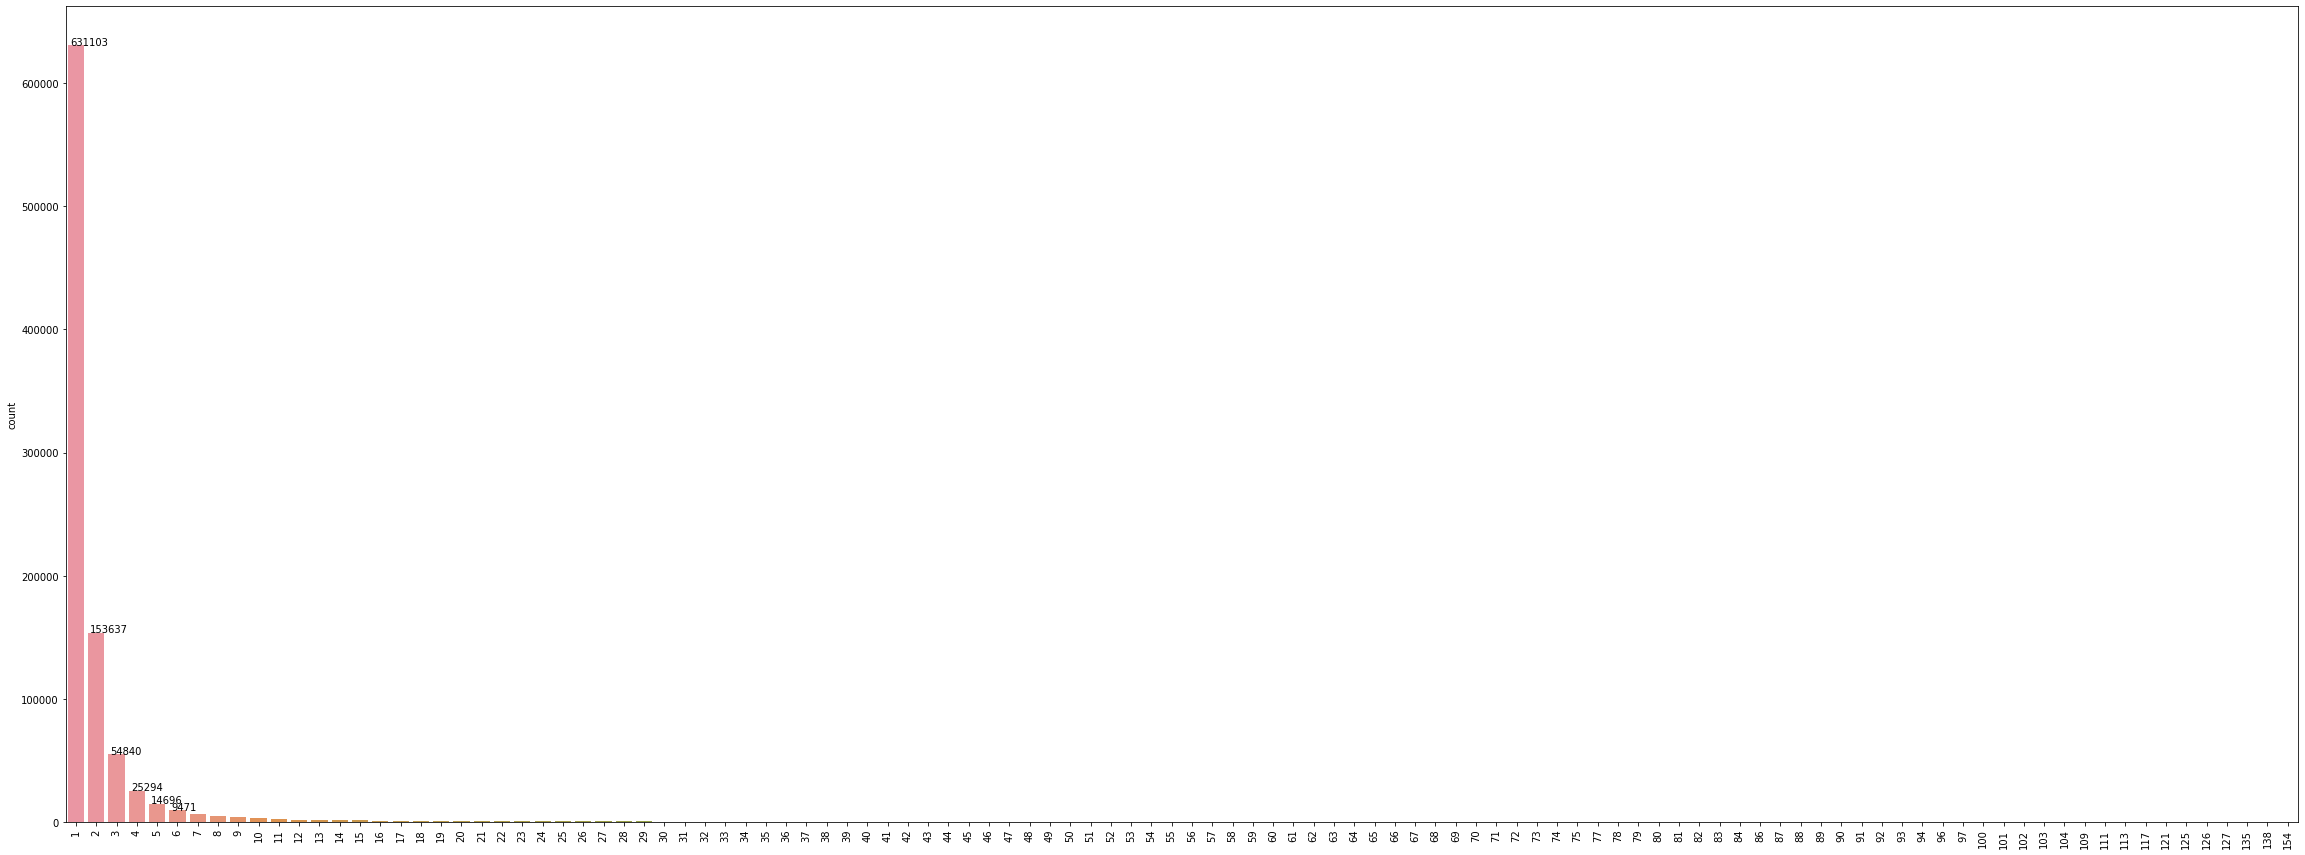

In [440]:
'''
plt.figure(figsize=(35,10))
sns.countplot(df_off.groupby(["User_id","Merchant_id"]).size())
plt.xlabel("Frequency of visit")
plt.ylabel("Count of labels")
'''
plt.figure(figsize=(40,15))
ax = sns.countplot(df_off.groupby(["User_id","Merchant_id"]).size())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
i = 5
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
       i-=1
       if i <0:
           break
plt.show()

In [442]:
(631103/921146)*100

68.51280904438602

68.51% of users offline don't prefer any particular merchant

### H: Users online prefer a particular merchant 

In [471]:
df_on_temp=df_on.drop_duplicates(subset=None, keep='first', inplace=False)
df_on_temp.groupby(["User_id","Merchant_id"]).size()

User_id   Merchant_id
4         25104          1
          45612          1
36        46701          1
64        11200          1
          29214          2
                        ..
15499999  55202          1
          56502          1
          59011          1
          59512          1
15500000  25913          1
Length: 3988506, dtype: int64

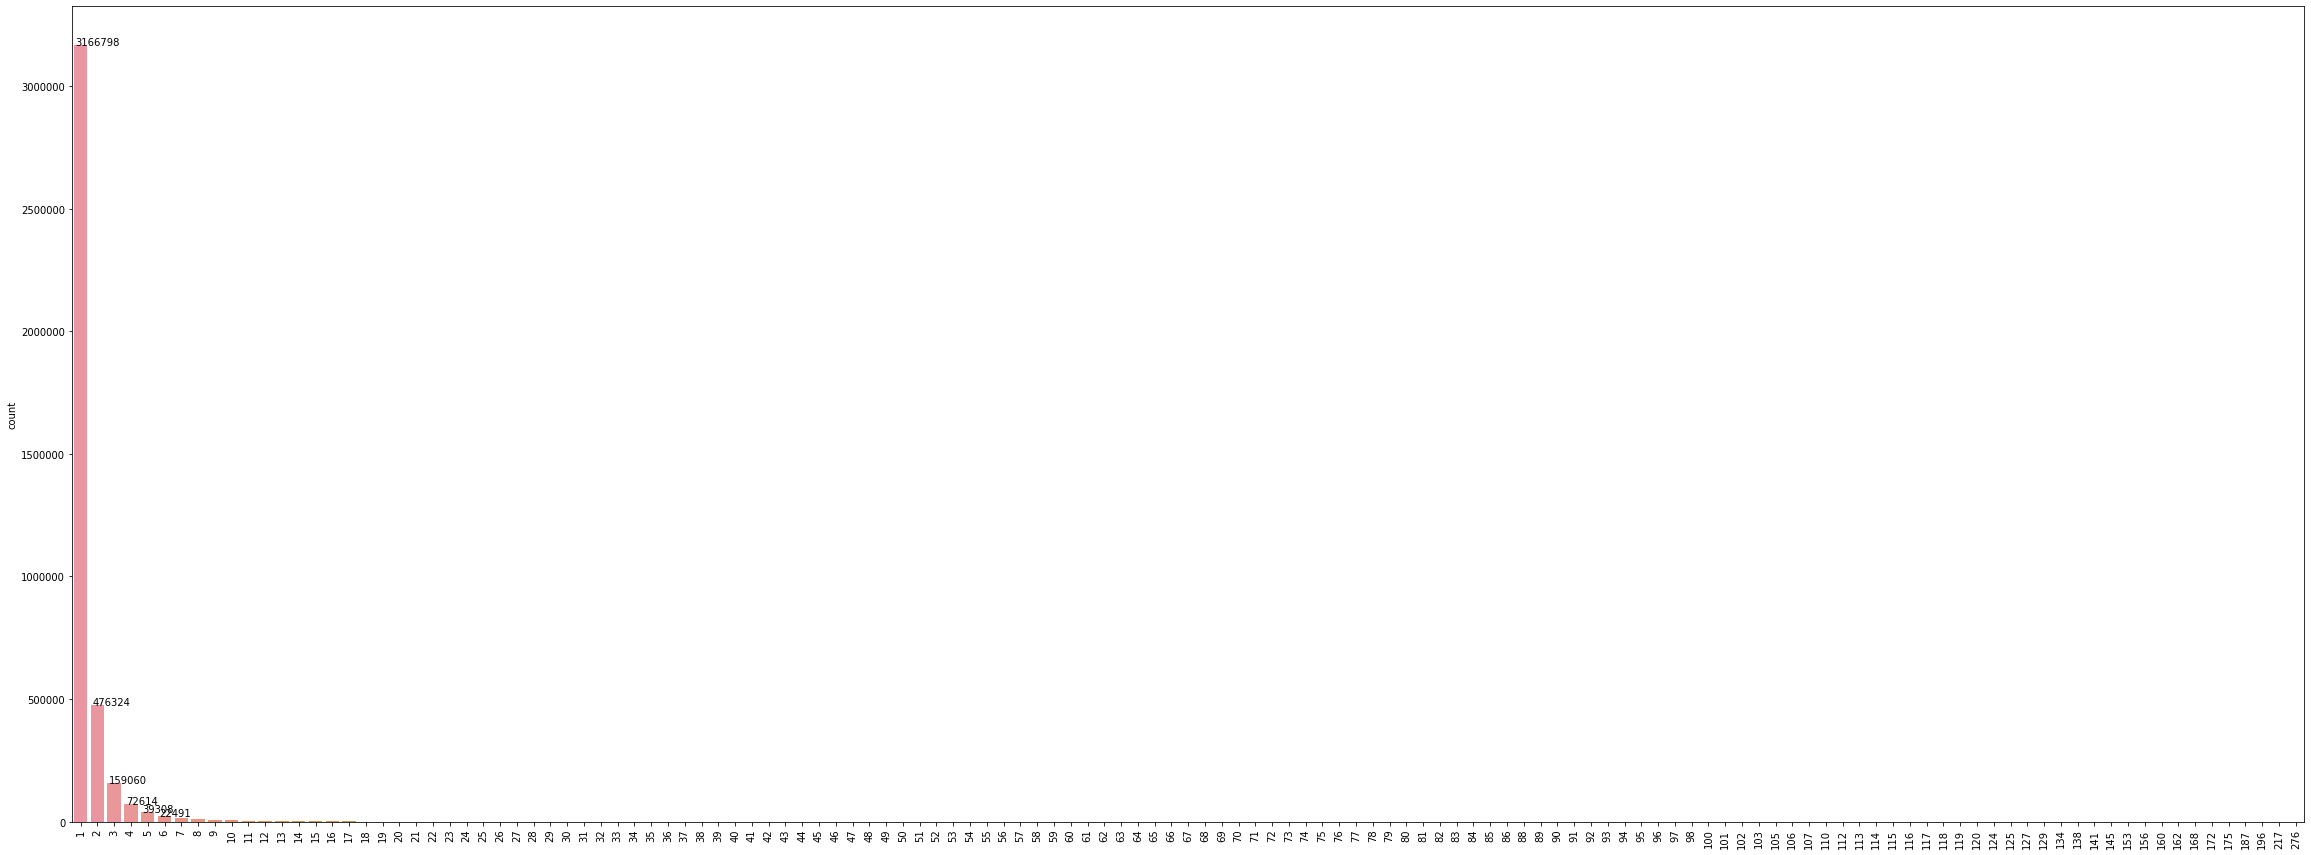

In [472]:
plt.figure(figsize=(40,15))
ax = sns.countplot(df_on_temp.groupby(["User_id","Merchant_id"]).size())
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
i = 5
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
       i-=1
       if i <0:
           break
plt.show()

In [473]:
3166798/3988506

0.7939810044161899

79.4% of users online don't prefer any particular merchant

In [427]:
non_purchase=set(df_on[(df_on["Action"]!=1)].User_id)
purchase=set(df_on[(df_on["Action"]==1)].User_id)

In [428]:
list_only_purchase=purchase-non_purchase
list_only_non_purchase=non_purchase-purchase

In [429]:
df_on[df_on["Action"]==2].shape

(655898, 7)

In [430]:
purchase_df = df_on[df_on["User_id"].isin(list(list_only_purchase))]
purchase_df[purchase_df['Action']==2]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date


# Online coupon redemption distribution after removing duplicates

In [454]:
df_on_new=df_on.drop_duplicates(subset=None, keep='first', inplace=False)
df_on_new

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
2,14336199,18907,0,NaN,NaN,NaN,20160618.0
10,14336199,38810,0,NaN,NaN,NaN,20160126.0
14,14336199,18907,0,NaN,NaN,NaN,20160127.0
...,...,...,...,...,...,...,...
11429821,13087731,27715,0,NaN,NaN,NaN,20160629.0
11429822,13087731,52005,0,NaN,NaN,NaN,20160324.0
11429823,13087731,45611,0,NaN,NaN,NaN,20160422.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [455]:
df_on_new.drop(df_on_new[df_on_new['Action'] == 0].index, inplace = True) 
df_on_new

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
19,10539231,12008,1,NaN,NaN,NaN,20160618.0
73,15137031,25104,2,100120354,150:50,20160613.0,NaN
74,15137031,44706,2,100071973,50:5,20160317.0,NaN
...,...,...,...,...,...,...,...
11429791,12985299,49800,1,100181877,10:5,20160516.0,20160517.0
11429810,12985299,49800,1,fixed,fixed,20160517.0,20160517.0
11429818,12985299,49800,1,NaN,NaN,NaN,20160520.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [456]:
df_on_new_date=df_on_new[df_on_new["Date"].isna()==False]
df_on_new_date

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
19,10539231,12008,1,NaN,NaN,NaN,20160618.0
75,15137031,18206,1,NaN,NaN,NaN,20160514.0
92,15137031,18206,1,NaN,NaN,NaN,20160421.0
205,10029399,43808,1,NaN,NaN,NaN,20160508.0
...,...,...,...,...,...,...,...
11429791,12985299,49800,1,100181877,10:5,20160516.0,20160517.0
11429810,12985299,49800,1,fixed,fixed,20160517.0,20160517.0
11429818,12985299,49800,1,NaN,NaN,NaN,20160520.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [457]:
df_on_new_date[df_on_new_date["Coupon_id"].isna()]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
1,13740231,34805,1,NaN,NaN,NaN,20160321.0
19,10539231,12008,1,NaN,NaN,NaN,20160618.0
75,15137031,18206,1,NaN,NaN,NaN,20160514.0
92,15137031,18206,1,NaN,NaN,NaN,20160421.0
205,10029399,43808,1,NaN,NaN,NaN,20160508.0
...,...,...,...,...,...,...,...
11429756,15487899,10615,1,NaN,NaN,NaN,20160521.0
11429762,14891931,55405,1,NaN,NaN,NaN,20160611.0
11429818,12985299,49800,1,NaN,NaN,NaN,20160520.0
11429824,13683699,18009,1,NaN,NaN,NaN,20160323.0


In [458]:
683869/881983

0.7753766229054302

In [459]:
df_on_new_date[df_on_new_date["Coupon_id"].isna()==False]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
273,10131831,47003,1,fixed,fixed,20160128.0,20160128.0
279,10131831,47003,1,fixed,fixed,20160117.0,20160117.0
748,12518031,30314,1,fixed,fixed,20160306.0,20160306.0
807,12518031,30314,1,fixed,fixed,20160317.0,20160317.0
859,13812399,26700,1,fixed,fixed,20160417.0,20160417.0
...,...,...,...,...,...,...,...
11429496,15299331,18907,1,fixed,fixed,20160308.0,20160308.0
11429499,15299331,18907,1,fixed,fixed,20160319.0,20160319.0
11429620,14091099,42415,1,100177336,50:30,20160615.0,20160615.0
11429791,12985299,49800,1,100181877,10:5,20160516.0,20160517.0


In [460]:
198114/881983

0.22462337709456984

In [463]:
df_on_new[df_on_new["Date"].isna()]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,20160513.0,NaN
73,15137031,25104,2,100120354,150:50,20160613.0,NaN
74,15137031,44706,2,100071973,50:5,20160317.0,NaN
114,15137031,29007,2,100028000,30:1,20160405.0,NaN
115,15137031,18907,2,100086665,300:50,20160406.0,NaN
...,...,...,...,...,...,...,...
11429599,13495131,45902,2,100086283,300:20,20160420.0,NaN
11429600,13495131,45902,2,100014418,150:5,20160420.0,NaN
11429602,14091099,44805,2,100197854,5:1,20160427.0,NaN
11429625,14091099,47412,2,100148588,30:20,20160531.0,NaN


In [464]:
560986/1442969

0.3887720387617475

# Offline coupon redemption distribution after removing duplicates

In [465]:
df_off_new=df_off.drop_duplicates(subset=None, keep='first', inplace=False)
df_off_new

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaT
...,...,...,...,...,...,...,...
1754879,212662,3532,NaN,NaN,1.0,NaN,2016-03-22
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,2016-06-02
1754881,212662,2934,NaN,NaN,2.0,NaN,2016-03-21
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaT


In [474]:
df_off_new_date=df_off_new[df_off_new["Date"].isna()==False]
df_off_new_date

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,2016-02-17
5,1439408,2632,NaN,NaN,0.0,NaN,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,20160516.0,2016-06-13
11,2029232,6459,NaN,NaN,0.0,NaN,2016-06-26
12,2029232,6459,NaN,NaN,0.0,NaN,2016-05-19
...,...,...,...,...,...,...,...
1754877,212662,3021,3739.0,30:1,6.0,20160504.0,2016-05-08
1754878,212662,2934,5686.0,30:5,2.0,20160321.0,2016-03-22
1754879,212662,3532,NaN,NaN,1.0,NaN,2016-03-22
1754880,212662,3021,3739.0,30:1,6.0,20160508.0,2016-06-02


In [475]:
df_off_new_date[df_off_new_date["Coupon_id"].isna()]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaN,2016-02-17
5,1439408,2632,NaN,NaN,0.0,NaN,2016-05-16
11,2029232,6459,NaN,NaN,0.0,NaN,2016-06-26
12,2029232,6459,NaN,NaN,0.0,NaN,2016-05-19
14,196342,1579,NaN,NaN,1.0,NaN,2016-06-06
...,...,...,...,...,...,...,...
1754872,212662,3532,NaN,NaN,1.0,NaN,2016-03-08
1754874,212662,2934,NaN,NaN,2.0,NaN,2016-05-13
1754875,212662,2934,NaN,NaN,2.0,NaN,2016-05-12
1754879,212662,3532,NaN,NaN,1.0,NaN,2016-03-22


In [477]:
701602/774666

0.9056832234795382

In [476]:
df_off_new_date[df_off_new_date["Coupon_id"].isna()==False]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,20:1,0.0,20160516.0,2016-06-13
33,1113008,1361,11166.0,20:1,0.0,20160515.0,2016-05-21
38,2881376,8390,7531.0,20:5,0.0,20160321.0,2016-03-29
69,114747,6901,2366.0,30:5,0.0,20160523.0,2016-06-05
75,114747,5341,111.0,30:5,0.0,20160127.0,2016-02-21
...,...,...,...,...,...,...,...
1754833,1437872,7706,416.0,100:10,4.0,20160129.0,2016-02-02
1754873,212662,2934,5686.0,30:5,2.0,20160321.0,2016-03-30
1754877,212662,3021,3739.0,30:1,6.0,20160504.0,2016-05-08
1754878,212662,2934,5686.0,30:5,2.0,20160321.0,2016-03-22


In [478]:
73064/774666

0.09431677652046172

In [479]:
df_off_new[df_off_new["Date"].isna()]


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1,1439408,4663,11002.0,150:20,1.0,20160528.0,NaT
2,1439408,2632,8591.0,20:1,0.0,20160217.0,NaT
3,1439408,2632,1078.0,20:1,0.0,20160319.0,NaT
4,1439408,2632,8591.0,20:1,0.0,20160613.0,NaT
7,1832624,3381,7610.0,200:20,0.0,20160429.0,NaT
...,...,...,...,...,...,...,...
1754866,3795296,5341,111.0,30:5,0.0,20160129.0,NaT
1754869,188086,6568,4723.0,30:1,0.0,20160415.0,NaT
1754876,212662,3532,5267.0,30:5,1.0,20160322.0,NaT
1754882,752472,7113,1633.0,50:10,6.0,20160613.0,NaT


In [480]:
942325/1716991

0.548823494124314

In [482]:
df_off_unique['Date'] = df_off_unique['Date'].dt.date

In [483]:
df_off_unique[df_off_unique["User_id"]==7360967]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count
1716981,7360967,760,NaN,NaN,1.0,NaN,2016-06-25,1
1716982,7360967,760,NaN,NaN,1.0,NaN,2016-06-26,1
1716983,7360967,3103,2375.0,30:1,2.0,20160110.0,NaT,1
1716984,7360967,3103,2375.0,30:1,2.0,20160120.0,NaT,1
1716985,7360967,3103,NaN,NaN,2.0,NaN,2016-01-10,1
1716986,7360967,3103,NaN,NaN,2.0,NaN,2016-01-20,1
1716987,7360967,6485,10323.0,20:5,1.0,20160322.0,NaT,2


In [500]:
list_on_off2 = set(df_on_off["User_id"].unique())
list_on2 = set(df_on_only["User_id"].unique())  #number of users in online data
list_off2 = set(df_off_only["User_id"].unique())  #number of users in offline data
list_test=set(df_off_test["User_id"].unique()) 
len(list_on2), len(list_off2) , len(list_on_off2), len(list_test)


(495410, 271990, 267448, 76309)

In [514]:
len(list_test.intersection(list_on2))

1

In [515]:
list_test.intersection(list_on2)

{1286474}

In [516]:
df_on[df_on["User_id"]==1286474]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
6499345,1286474,20805,1,NaN,NaN,NaN,20160311.0


In [517]:
df_off_test[df_off_test["User_id"]==1286474]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
105322,1286474,1282,4769,50:5,NaN,20160713


In [518]:
df_on_off[df_on_off["User_id"]==1286474]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count,Distance


In [502]:
len(list_test.intersection(list_off2))

33153

In [503]:
len(list_test.intersection(list_on_off2))

43154

In [511]:
df_off[(df_off["Date"].isna()==False)&(df_off["Distance"].isna())].head(30)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
405,3821408,2970,13704.0,100:30,NaN,20160522.0,2016-06-04
617,74955,1520,8140.0,0.95,NaN,20160229.0,2016-03-02
735,1398704,924,10164.0,0.95,NaN,20160314.0,2016-03-15
792,568920,4970,11376.0,20:1,NaN,20160511.0,2016-05-22
793,568920,4970,11376.0,20:1,NaN,20160501.0,2016-05-11
794,568920,4970,11376.0,20:1,NaN,20160502.0,2016-05-11
795,568920,4970,11376.0,20:1,NaN,20160505.0,2016-05-11
796,568920,4970,11376.0,20:1,NaN,20160511.0,2016-05-22
1214,1492145,6485,10323.0,20:5,NaN,20160327.0,2016-03-29
1215,1492145,6485,10323.0,20:5,NaN,20160327.0,2016-03-29


In [513]:
df_off[df_off["User_id"]==756057]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
2298,756057,3621,4033.0,20:5,NaN,20160519.0,2016-05-24
2299,756057,3621,4033.0,20:5,NaN,20160610.0,2016-06-20
2300,756057,3621,1141.0,20:5,NaN,20160518.0,NaT
2301,756057,3621,4761.0,30:5,NaN,20160524.0,NaT


# Adding target labels to Coupon id 

In [64]:
df_off_only

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count
2,35,3381,1807.0,300:30,0.0,20160130.0,NaN,1
3,35,3381,9776.0,10:5,0.0,20160129.0,NaN,1
4,35,3381,11951.0,200:20,0.0,20160129.0,NaN,1
5,35,3381,11951.0,200:20,0.0,20160130.0,NaN,1
9,110,4433,190.0,200:20,NaN,20160131.0,NaN,1
...,...,...,...,...,...,...,...,...
1716955,7360845,1569,5054.0,200:30,NaN,20160413.0,NaN,1
1716956,7360845,5341,11539.0,30:5,NaN,20160128.0,20160215.0,1
1716978,7360952,3403,13285.0,20:5,NaN,20160524.0,NaN,1
1716980,7360966,3381,11951.0,200:20,NaN,20160129.0,NaN,1


In [189]:
column_names = ["Coupon_id", "Date_received", "Date","Target"]
df_off_coupon = pd.DataFrame(columns = column_names)

df_off_coupon["Coupon_id"]=df_off_only["Coupon_id"]
df_off_coupon["Date_received"]=df_off_only["Date_received"]
df_off_coupon['Date'] = pd.to_datetime(df_off_only['Date'],format="%Y%m%d")
df_off_coupon.reset_index()
df_off_coupon.reset_index(level=0, drop=True)

df_off_coupon['Date_received'] = pd.to_datetime(df_off_only['Date_received'],format="%Y%m%d")

df_off_coupon["Redeem_date"]=df_off_coupon["Date"].dt.date-df_off_coupon["Date_received"].dt.date
df_off_coupon["Redeem_date"]=df_off_coupon["Date"].dt.date-df_off_coupon["Date_received"].dt.date
df_off_coupon['Redeem_date'] = df_off_coupon['Redeem_date'].dt.days.astype('str')

df_off_coupon['Redeem_date'] = pd.to_numeric(df_off_coupon['Redeem_date'],errors="coerce")

                

In [190]:
def createLabel(df):
    for idx in df.index:
        if (df["Redeem_date"][idx]!=None):
            if df["Redeem_date"][idx]<=15:
                df["Target"][idx]=1

In [191]:
#createLabel(df_off_coupon)
df_off_coupon

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Coupon_id,Date_received,Date,Target,Redeem_date
2,1807.0,2016-01-30,NaT,NaN,NaN
3,9776.0,2016-01-29,NaT,NaN,NaN
4,11951.0,2016-01-29,NaT,NaN,NaN
5,11951.0,2016-01-30,NaT,NaN,NaN
9,190.0,2016-01-31,NaT,NaN,NaN
...,...,...,...,...,...
1716955,5054.0,2016-04-13,NaT,NaN,NaN
1716956,11539.0,2016-01-28,2016-02-15,NaN,18.0
1716978,13285.0,2016-05-24,NaT,NaN,NaN
1716980,11951.0,2016-01-29,NaT,NaN,NaN


In [231]:
df_off_coupon.to_csv("Target_coupon_label_offline.csv")

In [8]:
#df_off_coupon=pd.read_csv("Target_coupon_label_offline.csv")

In [819]:
df_off_coupon1=df_off_coupon.copy(deep=True)
df_off_coupon1

,Coupon_id,Date_received,Date,Target,Redeem_date
2,1807.0,2016-01-30,NaT,NaN,NaN
3,9776.0,2016-01-29,NaT,NaN,NaN
4,11951.0,2016-01-29,NaT,NaN,NaN
5,11951.0,2016-01-30,NaT,NaN,NaN
9,190.0,2016-01-31,NaT,NaN,NaN
...,...,...,...,...,...
1716955,5054.0,2016-04-13,NaT,NaN,NaN
1716956,11539.0,2016-01-28,2016-02-15,NaN,18.0
1716978,13285.0,2016-05-24,NaT,NaN,NaN
1716980,11951.0,2016-01-29,NaT,NaN,NaN


In [ ]:
df_off_target=pd.merge(df_off_only,df_off_coupon,how="inner",on="Coupon_id")

In [9]:
df_off_coupon[df_off_coupon["Target"]==1]

,Unnamed: 0,Coupon_id,Date_received,Date,Target,Redeem_date
20,76,5435.0,2016-03-29,2016-04-12,1.0,14.0
48,150,14031.0,2016-01-28,2016-01-30,1.0,2.0
51,153,9353.0,2016-03-28,2016-04-02,1.0,5.0
90,294,2346.0,2016-05-25,2016-06-04,1.0,10.0
96,300,2810.0,2016-05-18,2016-05-27,1.0,9.0
...,...,...,...,...,...,...
813348,1716435,6655.0,2016-05-09,2016-05-13,1.0,4.0
813349,1716436,6655.0,2016-05-10,2016-05-16,1.0,6.0
813568,1716855,4036.0,2016-05-23,2016-05-24,1.0,1.0
813569,1716856,4036.0,2016-05-24,2016-05-30,1.0,6.0


In [10]:
df_off_coupon[df_off_coupon["Coupon_id"]==5435]

,Unnamed: 0,Coupon_id,Date_received,Date,Target,Redeem_date
20,76,5435.0,2016-03-29,2016-04-12,1.0,14.0
4608,10060,5435.0,2016-03-28,NaN,NaN,NaN
38032,80474,5435.0,2016-03-30,NaN,NaN,NaN
65700,139599,5435.0,2016-03-21,2016-03-25,1.0,4.0
65701,139600,5435.0,2016-03-25,2016-03-30,1.0,5.0
65702,139601,5435.0,2016-03-30,NaN,NaN,NaN
80350,170744,5435.0,2016-03-26,2016-04-24,NaN,29.0
103574,220211,5435.0,2016-03-29,NaN,NaN,NaN
126995,270507,5435.0,2016-03-24,NaN,NaN,NaN
163118,346017,5435.0,2016-03-27,NaN,NaN,NaN


In [11]:
df_off_only[df_off_only["Coupon_id"]==5435]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count
76,417,775,5435.0,30:5,0.0,20160329.0,20160412.0,1
10060,43975,775,5435.0,30:5,0.0,20160328.0,NaN,1
80474,349977,775,5435.0,30:5,2.0,20160330.0,NaN,1
139599,606887,775,5435.0,30:5,0.0,20160321.0,20160325.0,1
139600,606887,775,5435.0,30:5,0.0,20160325.0,20160330.0,1
139601,606887,775,5435.0,30:5,0.0,20160330.0,NaN,1
170744,741027,775,5435.0,30:5,1.0,20160326.0,20160424.0,1
220211,955501,775,5435.0,30:5,10.0,20160329.0,NaN,1
270507,1172611,775,5435.0,30:5,0.0,20160324.0,NaN,1
346017,1492721,775,5435.0,30:5,1.0,20160327.0,NaN,1


In [13]:
df_off_target = df_off_only.append(df_off_coupon, sort=False)
list_off_coupon = set(df_off_only["Coupon_id"].unique()).intersection(set(df_off_coupon["Coupon_id"].unique()))
df_off_target = df_off_target[df_off_target['Coupon_id'].isin(list(list_off_coupon))]
df_off_target.sort_values(by="User_id",inplace=True)
df_off_target.reset_index()
df_off_target.reset_index(level=0, drop=True)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count,Unnamed: 0,Target,Redeem_date
0,35.0,3381.0,1807.0,300:30,0.0,2.01601e+07,NaN,1.0,NaN,NaN,NaN
1,35.0,3381.0,9776.0,10:5,0.0,2.01601e+07,NaN,1.0,NaN,NaN,NaN
2,35.0,3381.0,11951.0,200:20,0.0,2.01601e+07,NaN,1.0,NaN,NaN,NaN
3,35.0,3381.0,11951.0,200:20,0.0,2.01601e+07,NaN,1.0,NaN,NaN,NaN
4,110.0,4433.0,190.0,200:20,NaN,2.01601e+07,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
976771,NaN,NaN,5054.0,NaN,NaN,2016-04-13,NaN,NaN,1716955.0,NaN,NaN
976772,NaN,NaN,11539.0,NaN,NaN,2016-01-28,2016-02-15,NaN,1716956.0,NaN,18.0
976773,NaN,NaN,13285.0,NaN,NaN,2016-05-24,NaN,NaN,1716978.0,NaN,NaN
976774,NaN,NaN,11951.0,NaN,NaN,2016-01-29,NaN,NaN,1716980.0,NaN,NaN


In [60]:
df_new=df_off_coupon[df_off_coupon["Target"]==1].copy(deep=True)

In [65]:
df_new

,Unnamed: 0,Coupon_id,Date_received,Date,Target,Redeem_date
20,76,5435.0,2016-03-29,2016-04-12,1.0,14.0
48,150,14031.0,2016-01-28,2016-01-30,1.0,2.0
51,153,9353.0,2016-03-28,2016-04-02,1.0,5.0
90,294,2346.0,2016-05-25,2016-06-04,1.0,10.0
96,300,2810.0,2016-05-18,2016-05-27,1.0,9.0
...,...,...,...,...,...,...
813348,1716435,6655.0,2016-05-09,2016-05-13,1.0,4.0
813349,1716436,6655.0,2016-05-10,2016-05-16,1.0,6.0
813568,1716855,4036.0,2016-05-23,2016-05-24,1.0,1.0
813569,1716856,4036.0,2016-05-24,2016-05-30,1.0,6.0


In [76]:
df_off_only[df_off_only["Coupon_id"]==5435]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count
76,417,775,5435.0,30:5,0.0,20160329.0,20160412.0,1
10060,43975,775,5435.0,30:5,0.0,20160328.0,NaN,1
80474,349977,775,5435.0,30:5,2.0,20160330.0,NaN,1
139599,606887,775,5435.0,30:5,0.0,20160321.0,20160325.0,1
139600,606887,775,5435.0,30:5,0.0,20160325.0,20160330.0,1
139601,606887,775,5435.0,30:5,0.0,20160330.0,NaN,1
170744,741027,775,5435.0,30:5,1.0,20160326.0,20160424.0,1
220211,955501,775,5435.0,30:5,10.0,20160329.0,NaN,1
270507,1172611,775,5435.0,30:5,0.0,20160324.0,NaN,1
346017,1492721,775,5435.0,30:5,1.0,20160327.0,NaN,1


In [68]:
df_off_only[df_off_only["User_id"]==397169]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count
91406,397169,5734,3187.0,20:1,0.0,20160510.0,20160514.0,1
91407,397169,5734,3187.0,20:1,0.0,20160513.0,20160524.0,1
91408,397169,5734,3187.0,20:1,0.0,20160514.0,NaN,1
91409,397169,5734,3187.0,20:1,0.0,20160518.0,NaN,1
91410,397169,5734,3187.0,20:1,0.0,20160524.0,NaN,1
91411,397169,5734,3187.0,20:1,0.0,20160605.0,NaN,1
91412,397169,5734,4629.0,20:1,0.0,20160510.0,20160514.0,1
91413,397169,5734,4629.0,20:1,0.0,20160513.0,20160518.0,1
91414,397169,5734,4629.0,20:1,0.0,20160514.0,20160605.0,1
91415,397169,5734,4629.0,20:1,0.0,20160518.0,NaN,1


In [77]:
df_on_off[df_on_off["Coupon_id"]==5435]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count,Distance
78539,341795,775,NaN,5435,30:5,20160321.0,NaN,1,0.0
127919,557846,775,NaN,5435,30:5,20160331.0,NaN,1,0.0
134478,585394,775,NaN,5435,30:5,20160323.0,NaN,1,1.0
254710,1105883,775,NaN,5435,30:5,20160330.0,20160403.0,1,1.0
254709,1105883,775,NaN,5435,30:5,20160326.0,20160330.0,1,1.0
277099,1201919,775,NaN,5435,30:5,20160327.0,NaN,1,1.0
315773,1364681,775,NaN,5435,30:5,20160326.0,NaN,1,1.0
419846,1805338,775,NaN,5435,30:5,20160325.0,NaN,1,0.0
419845,1805338,775,NaN,5435,30:5,20160324.0,NaN,1,0.0
419844,1805338,775,NaN,5435,30:5,20160322.0,20160325.0,1,0.0


In [81]:
df_on_off[df_on_off["User_id"]==3469889]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count,Distance
806616,3469889,7910,NaN,9117,20:5,20160321.0,NaN,1,2.0
806615,3469889,775,NaN,NaN,NaN,NaN,20160331.0,1,3.0
649202,3469889,30307,1.0,NaN,NaN,NaN,20160310.0,1,NaN
806614,3469889,775,NaN,5435,30:5,20160331.0,NaN,1,3.0
806617,3469889,7910,NaN,NaN,NaN,NaN,20160321.0,1,2.0


In [114]:
df_on_only_redeem[50:100]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count
14723,82695,38304,1,fixed,fixed,20160511.0,20160511.0,1
16982,92793,49108,1,fixed,fixed,20160406.0,20160406.0,1
18394,100274,41112,1,fixed,fixed,20160511.0,20160511.0,1
18395,100274,41112,1,fixed,fixed,20160514.0,20160514.0,1
18951,103279,48813,1,fixed,fixed,20160104.0,20160104.0,1
19247,104687,25600,1,100010481,100:10,20160307.0,20160307.0,1
19252,104687,36611,1,100186514,150:10,20160426.0,20160426.0,1
19683,107100,31503,1,100030916,50:5,20160112.0,20160320.0,1
19689,107100,56310,1,100169731,10:5,20160112.0,20160112.0,1
19692,107100,56310,1,fixed,fixed,20160323.0,20160323.0,1


In [122]:
df_on_only_redeem[df_on_only_redeem["User_id"]==122012]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count
22348,122012,46606,1,100101156,10:1,20160105.0,20160126.0,1


In [126]:
a=df_on["Discount_rate"].unique()

In [127]:
b=df_off["Discount_rate"].unique()

In [132]:
set(a).intersection(set(b))

{'100:1',
 '100:10',
 '100:20',
 '100:30',
 '100:5',
 '100:50',
 '10:1',
 '10:5',
 '150:10',
 '150:20',
 '150:30',
 '150:5',
 '150:50',
 '200:10',
 '200:100',
 '200:20',
 '200:30',
 '200:5',
 '200:50',
 '20:1',
 '20:10',
 '20:5',
 '300:10',
 '300:20',
 '300:30',
 '300:50',
 '30:1',
 '30:10',
 '30:20',
 '30:5',
 '50:1',
 '50:10',
 '50:20',
 '50:30',
 '50:5',
 '5:1',
 nan}

## No. of events where users got a coupon offline and redeemed

In [495]:
df_temp_off = df_off.groupby(['User_id','Coupon_id','Date_received'])['Discount_rate','Date'].count()
df_temp_off['Flag'] = (df_temp_off['Date']>0) & ((df_temp_off['Discount_rate']-df_temp_off['Date'])>0)
df_temp_off[df_temp_off['Flag']==True].shape

(0, 3)

## No. of events where users got a coupon online and redeemed

In [496]:
df_temp_on = df_on.groupby(['User_id','Coupon_id','Date_received'])['Discount_rate','Date'].count()
df_temp_on['Flag'] = (df_temp_on['Date']>0) & ((df_temp_on['Discount_rate']-df_temp_on['Date'])>0)
df_temp_on[df_temp_on['Flag']==True].shape

(10421, 3)

## Merchant level analysis

Distribution of merchants

In [1337]:
merchant_online=df_on_only["Merchant_id"].unique()
merchant_offline=df_off_only["Merchant_id"].unique()
merchant_on_off=df_on_off["Merchant_id"].unique()
merchant_test=df_off_test["Merchant_id"].unique()
print("No of merchants  in only online: {}".format(len(merchant_online)))
print("No of merchants  in only offline: {}".format(len(merchant_offline)))
print("No of merchants  in only online+offline: {}".format(len(merchant_on_off)))
print("No of merchants  in only offline_test: {}".format(len(merchant_test)))
print("No of merchants common in only online and only offline: {}".format(len(set(merchant_online).intersection(set(merchant_offline)))))
print("No of merchants common in only online and  online+offline: {}".format(len(set(merchant_online).intersection(set(merchant_on_off)))))
print("No of merchants common in only offline and  online+offline: {}".format(len(set(merchant_offline).intersection(set(merchant_on_off)))))
print("No of merchants common in only online and  offline test: {}".format(len(set(merchant_online).intersection(set(merchant_test)))))
print("No of merchants common in only offline and  offline test: {}".format(len(set(merchant_offline).intersection(set(merchant_test)))))
print("No of merchants common in only online+offline and  offline test: {}".format(len(set(merchant_on_off).intersection(set(merchant_test)))))

No of merchants  in only online: 7999
No of merchants  in only offline: 7771
No of merchants  in only online+offline: 15783
No of merchants  in only offline_test: 1559
No of merchants common in only online and only offline: 0
No of merchants common in only online and  online+offline: 7999
No of merchants common in only offline and  online+offline: 7140
No of merchants common in only online and  offline test: 0
No of merchants common in only offline and  offline test: 1521
No of merchants common in only online+offline and  offline test: 1515


In [505]:
'''
#online + offline 
df_on_off_m=df_on_off.drop(df_on_off[df_on_off["Action"]==0].index,axis=0,inplace=False)
df_on_off_m=df_on_off_m[df_on_off_m["Coupon_id"].isna()==False]
df_on_off_m=df_on_off_m[df_on_off_m["Coupon_id"]!="fixed"]
df_on_off_m["Online_Merchant"]=(df_on_off_m["Action"].isna()==False).astype(int)
df_on_off_m["Offline_Merchant"]=(df_on_off_m["Action"].isna()).astype(int)
df_on_off_m
'''

'\n#online + offline \ndf_on_off_m=df_on_off.drop(df_on_off[df_on_off["Action"]==0].index,axis=0,inplace=False)\ndf_on_off_m=df_on_off_m[df_on_off_m["Coupon_id"].isna()==False]\ndf_on_off_m=df_on_off_m[df_on_off_m["Coupon_id"]!="fixed"]\ndf_on_off_m["Online_Merchant"]=(df_on_off_m["Action"].isna()==False).astype(int)\ndf_on_off_m["Offline_Merchant"]=(df_on_off_m["Action"].isna()).astype(int)\ndf_on_off_m\n'

### Redeem-Release ratio for differen Merchants

In [1348]:
'''
#online + offline
df=df_on_off_m.groupby('Merchant_id').agg({"Coupon_id":"count","Date":"count", 'Online_Merchant':'sum','Offline_Merchant':'sum'})
df_on_off_m["Offline_Merchant"]=(df_on_off_m["Action"].isna()).astype(int)

df['Online_Merchant']=(df["Online_Merchant"]>0).astype(int)
df['Offline_Merchant']=(df["Offline_Merchant"]>0).astype(int)

df.rename(columns = {"Coupon_id": "Coupon_release_count","Date":"Coupon_redeem_count"}, inplace = True) 
df["Redeem/Release"]=df["Coupon_redeem_count"]/df["Coupon_release_count"]
#df
df.reset_index(inplace=True)
df.sort_values(by=["Coupon_release_count"],ascending=False)
'''

#redeem/release of coupons by offline merchant
df_off_m=df_off_unique[df_off_unique["Coupon_id"].isna()==False]
df_off_m_temp=df_off_m.groupby('Merchant_id').agg({"Coupon_id":"count","Date":"count"})
df_off_m_temp.rename(columns = {"Coupon_id": "Coupon_release_count","Date":"Coupon_redeem_count"}, inplace = True) 
df_off_m_temp["Redeem/Release"]=df_off_m_temp["Coupon_redeem_count"]/df_off_m_temp["Coupon_release_count"]
df_off_m_temp.reset_index(inplace=True)
df_off_m_temp.sort_values(by=["Coupon_release_count"],ascending=False,inplace=True)

#redeem/release of coupons by online merchant
df_on_m=df_on_unique[(df_on_unique["Coupon_id"].isna()==False) & (df_on_unique["Coupon_id"]!="fixed")]
df_on_m_temp=df_on_m.groupby('Merchant_id').agg({"Coupon_id":"count","Date":"count"})
df_on_m_temp.rename(columns = {"Coupon_id": "Coupon_release_count","Date":"Coupon_redeem_count"}, inplace = True) 
df_on_m_temp["Redeem/Release"]=df_on_m_temp["Coupon_redeem_count"]/df_on_m_temp["Coupon_release_count"]
df_on_m_temp.reset_index(inplace=True)
df_on_m_temp.sort_values(by=["Coupon_release_count"],ascending=False,inplace=True)

Text(0.5, 1.0, 'CRR plot for offline merchants')

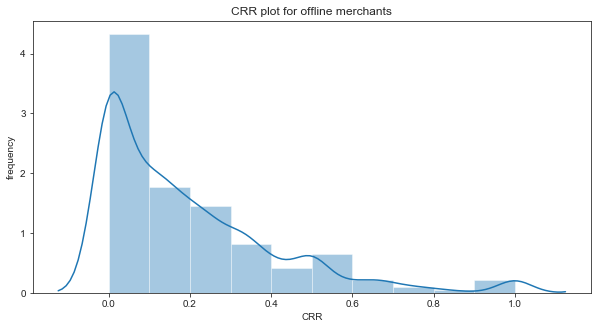

In [1381]:
plt.figure(figsize=(10,5))
sns.distplot(df_off_m_temp["Redeem/Release"],bins=10)
plt.xlabel("CRR")
plt.ylabel("frequency")
plt.title("CRR plot for offline merchants")

Text(0.5, 1.0, 'CRR plot for online merchants')

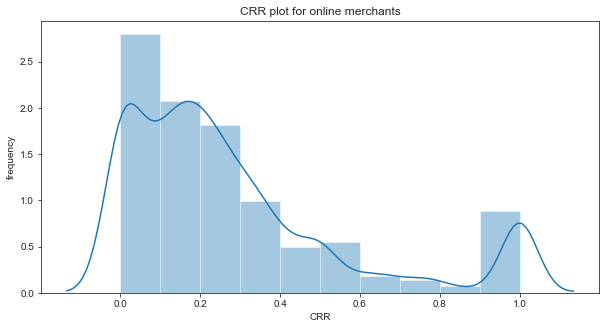

In [1378]:
plt.figure(figsize=(10,5))
sns.distplot(df_on_m_temp["Redeem/Release"],bins=10)
plt.xlabel("CRR")
plt.ylabel("frequency")
plt.title("CRR plot for online merchants")

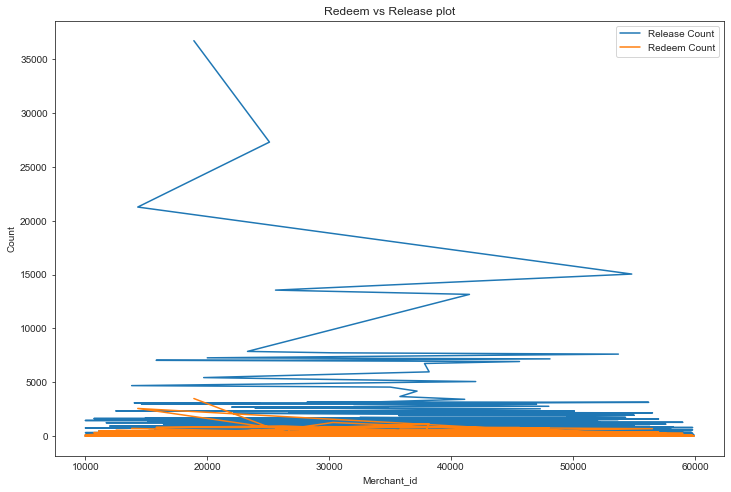

In [1364]:
plt.figure(figsize=(12,8))
plt.plot(df_on_m_temp["Merchant_id"],df_on_m_temp["Coupon_release_count"])
plt.plot(df_on_m_temp["Merchant_id"],df_on_m_temp["Coupon_redeem_count"])
plt.legend(["Release Count","Redeem Count"], loc='upper right')
plt.title("Redeem vs Release plot")
plt.ylabel("Count")
plt.xlabel("Merchant_id")
plt.show()

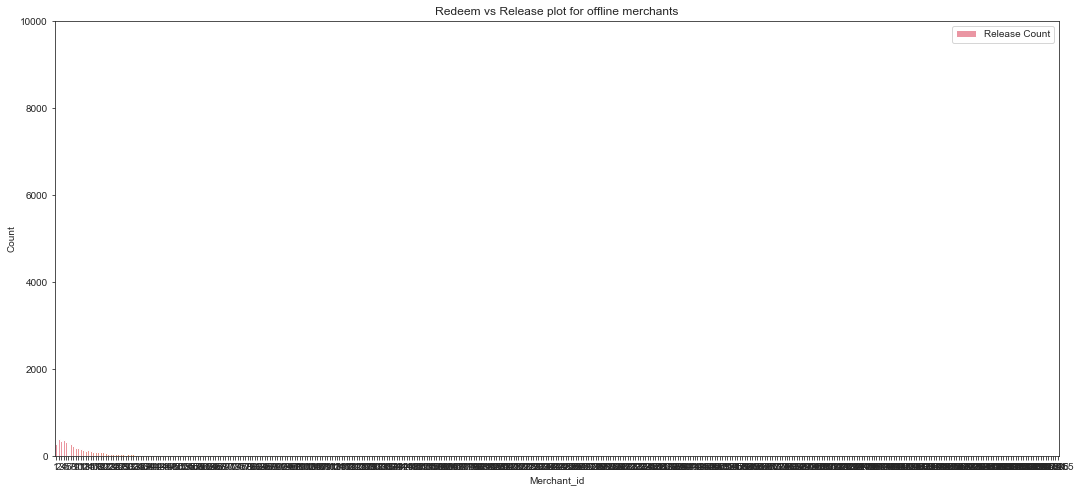

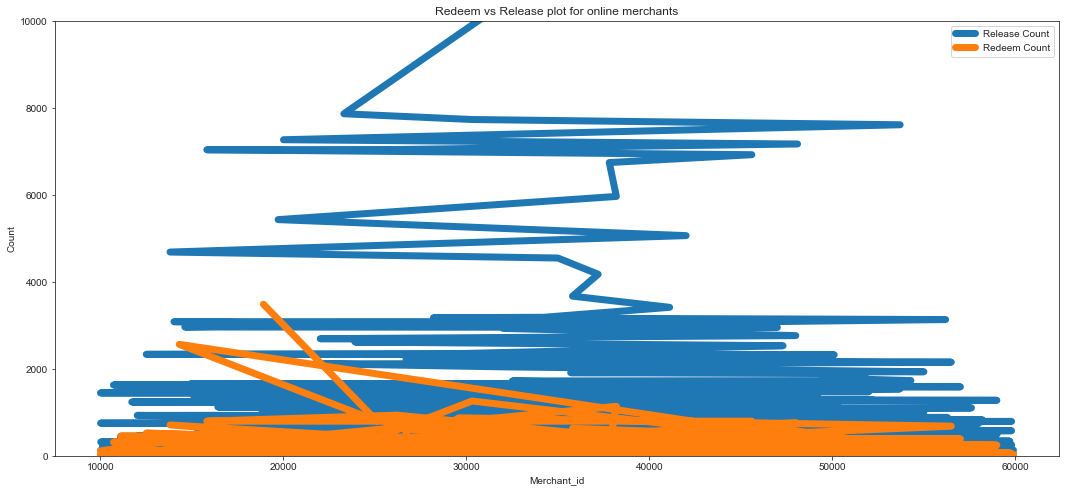

In [1361]:
'''
plt.figure(figsize=(12,8))
plt.plot(df_on_m_temp["Merchant_id"],df_on_m_temp["Coupon_release_count"])
plt.plot(df_on_m_temp["Merchant_id"],df_on_m_temp["Coupon_redeem_count"])
plt.legend(["Release Count","Redeem Count"], loc='upper right')
plt.title("Redeem vs Release plot")
plt.ylabel("Count")
plt.xlabel("Merchant_id")
plt.show()
'''
#Redeem vs Release plot for offline merchants
plt.figure(figsize=(18,8))
plt.plot(df_off_m_temp["Merchant_id"],df_off_m_temp["Coupon_release_count"], linewidth = 7)
plt.plot(df_off_m_temp["Merchant_id"],df_off_m_temp["Coupon_redeem_count"], linewidth = 7)
plt.legend(["Release Count","Redeem Count"], loc='upper right')
plt.title("Redeem vs Release plot for offline merchants")
plt.ylabel("Count")
plt.xlabel("Merchant_id")
plt.ylim(0,10000)
plt.show()



#Redeem vs Release plot for online merchants
plt.figure(figsize=(18,8))
plt.plot(df_on_m_temp["Merchant_id"],df_on_m_temp["Coupon_release_count"], linewidth = 7)
plt.plot(df_on_m_temp["Merchant_id"],df_on_m_temp["Coupon_redeem_count"], linewidth = 7)
plt.legend(["Release Count","Redeem Count"], loc='upper right')
plt.title("Redeem vs Release plot for online merchants")
plt.ylabel("Count")
plt.xlabel("Merchant_id")
plt.ylim(0,10000)
plt.show()

In [536]:
df_off_m_temp["Redeem/Release"].describe()

count    5599.000000
mean        0.194428
std         0.220038
min         0.000000
25%         0.000000
50%         0.127660
75%         0.299412
max         1.000000
Name: Redeem/Release, dtype: float64

In [537]:
df_on_m_temp["Redeem/Release"].describe()

count    3231.000000
mean        0.283875
std         0.284245
min         0.000000
25%         0.083333
50%         0.200000
75%         0.372793
max         1.000000
Name: Redeem/Release, dtype: float64

### Mean distance of users to offline merchants  

In [538]:
#df_off_m2=df_off_m[df_off_m["Offline_Merchant"]==1]
df_off_m_temp2=df_on_off_m.groupby('Merchant_id').agg({'Distance':'mean'})
df_off_m_temp2.rename(columns = {"Distance": "Mean_Distance"}, inplace = True) 
df_off_m_temp2.sort_values(by="Mean_Distance",ascending=False,inplace=True)
df_off_m_temp2["Mean_Distance"].fillna(df_off_m_temp2["Mean_Distance"].mean(),inplace=True)
#df2["Mean_Distance"]=df2["Mean_Distance"].astype(int)
df_off_m_temp2.describe()

,Mean_Distance
count,7506.000000
mean,2.417451
std,2.017590
min,0.000000
25%,1.000000
50%,2.417451
75%,2.417451
max,10.000000


Text(0.5, 1.0, 'Average distance of users from merchants')

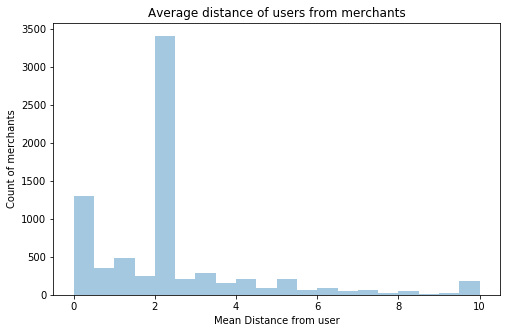

In [542]:
plt.figure(figsize=(8,5))
sns.distplot(df_off_m_temp2["Mean_Distance"],kde=False,bins=20)
plt.xlabel("Mean Distanceof merchant from users")
plt.ylabel("Count of merchants")
plt.title("Mean distance of users from merchants")

### No of distinct coupons operated by merchants 

In [558]:
'''
#df3=df_on_off_m.groupby(['Merchant_id','Coupon_id'])['Coupon_id'].count()
df3=df_on_off_m.groupby("Merchant_id").agg({"Coupon_id": pd.Series.nunique,'Online_Merchant':'sum','Offline_Merchant':'sum'})
df3['Online_Merchant']=(df3["Online_Merchant"]>0).astype(int)
df3['Offline_Merchant']=(df3["Offline_Merchant"]>0).astype(int)
df3.rename(columns = {"Coupon_id": "Distict_Coupon_count"}, inplace = True) 
df3.sort_values(by="Distict_Coupon_count",ascending=False,inplace=True)
df3.reset_index(inplace=True)
df3
'''

df_off_m_temp3=df_off_m.groupby("Merchant_id").agg({"Coupon_id": pd.Series.nunique})
df_off_m_temp3.rename(columns = {"Coupon_id": "Distict_Coupon_count_offline"}, inplace = True) 
df_off_m_temp3.sort_values(by="Distict_Coupon_count_offline",ascending=False,inplace=True)
df_off_m_temp3.reset_index(inplace=True)


df_on_m_temp3=df_on_m.groupby("Merchant_id").agg({"Coupon_id": pd.Series.nunique})
df_on_m_temp3.rename(columns = {"Coupon_id": "Distict_Coupon_count_online"}, inplace = True) 
df_on_m_temp3.sort_values(by="Distict_Coupon_count_online",ascending=False,inplace=True)
df_on_m_temp3.reset_index(inplace=True)

display(df_off_m_temp3)
display(df_on_m_temp3)

,Merchant_id,Distict_Coupon_count_offline
0,1080,39.0
1,1520,25.0
2,4860,25.0
3,209,22.0
4,5010,21.0
...,...,...
5594,4744,1.0
5595,1639,1.0
5596,4747,1.0
5597,1638,1.0


,Merchant_id,Distict_Coupon_count_online
0,14305,235
1,15813,189
2,25104,175
3,13802,175
4,38200,174
...,...,...
3226,25213,1
3227,34900,1
3228,14614,1
3229,35000,1


In [549]:
df_off_m_temp3.Distict_Coupon_count.describe()

count    5599.000000
mean        1.739239
std         1.730363
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        39.000000
Name: Distict_Coupon_count, dtype: float64

In [550]:
df_on_m_temp3.Distict_Coupon_count.describe()

count    3231.000000
mean        8.587434
std        15.349903
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       235.000000
Name: Distict_Coupon_count, dtype: float64

### No of distinct discount rates operated by merchants 

In [560]:
'''#df3=df_on_off_m.groupby(['Merchant_id','Coupon_id'])['Coupon_id'].count()
df4=df_on_off_m.groupby("Merchant_id").agg({"Discount_rate": pd.Series.nunique,'Online_Merchant':'sum','Offline_Merchant':'sum'})
df4['Online_Merchant']=(df4["Online_Merchant"]>0).astype(int)
df4['Offline_Merchant']=(df4["Offline_Merchant"]>0).astype(int)
df4.rename(columns = {"Discount_rate": "Distinct_Discount_Rate"}, inplace = True) 
df4.sort_values(by="Distinct_Discount_Rate",ascending=False,inplace=True)
df4
'''
df_off_m_temp4=df_off_m.groupby("Merchant_id").agg({"Discount_rate": pd.Series.nunique})
df_off_m_temp4.rename(columns = {"Discount_rate": "Distinct_Discount_Rate_Offline"}, inplace = True) 
df_off_m_temp4.sort_values(by="Distinct_Discount_Rate_Offline",ascending=False,inplace=True)
df_off_m_temp4

df_on_m_temp4=df_on_m.groupby("Merchant_id").agg({"Discount_rate": pd.Series.nunique})
df_on_m_temp4.rename(columns = {"Discount_rate": "Distinct_Discount_Rate_Online"}, inplace = True) 
df_on_m_temp4.sort_values(by="Distinct_Discount_Rate_Online",ascending=False,inplace=True)

display(df_off_m_temp4)
display(df_on_m_temp4)



,Distinct_Discount_Rate_Offline
Merchant_id,
5010,8
450,8
7438,7
3449,7
1569,7
...,...
3339,1
3337,1
3333,1


,Distinct_Discount_Rate_Online
Merchant_id,
38200,24
10709,23
34213,21
30314,20
35803,19
...,...
46203,1
46211,1
29507,1


In [562]:
df_off_m_temp4.Distinct_Discount_Rate_Offline.describe()

count    5599.000000
mean        1.321307
std         0.707355
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         8.000000
Name: Distinct_Discount_Rate_Offline, dtype: float64

In [564]:
df_on_m_temp4.Distinct_Discount_Rate_Online.describe()

count    3231.000000
mean        3.493655
std         2.735254
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        24.000000
Name: Distinct_Discount_Rate_Online, dtype: float64

### Merchants active duration period online and offline 

In [715]:
df_off_temp2=df_off_unique.copy(deep=True)
df_off_temp2["Date"]=pd.to_datetime(df_off_temp2["Date"],format="%Y%m%d")
df_off_temp2["Date_received"]=pd.to_datetime(df_off_temp2["Date_received"],format="%Y%m%d")
df_off_temp2["DateOrder"]=df_off_temp2["Date"]
df_off_temp2["DateOrder"].fillna(df_off_temp2["Date_received"],inplace=True)
df_off_temp2=df_off_temp2.groupby("Merchant_id")["DateOrder"].agg(['min','max'])
df_off_temp2["ActiveDuration"]=df_off_temp2['max']-df_off_temp2['min']
df_off_temp2['ActiveDuration'] = df_off_temp2['ActiveDuration'].dt.days.astype('str')
df_off_temp2['ActiveDuration'] = pd.to_numeric(df_off_temp2['ActiveDuration'],errors="coerce")
df_off_temp2

,min,max,ActiveDuration
Merchant_id,,,
1,2016-01-15,2016-06-21,158
2,2016-05-15,2016-06-17,33
3,2016-04-24,2016-06-28,65
4,2016-02-18,2016-06-28,131
5,2016-01-01,2016-06-29,180
...,...,...,...
8852,2016-05-10,2016-06-24,45
8853,2016-03-31,2016-06-28,89
8854,2016-05-05,2016-06-29,55


In [716]:
df_off_temp2["ActiveDuration"].describe()

count    8415.000000
mean      101.111230
std        58.876779
min         0.000000
25%        49.000000
50%       100.000000
75%       161.000000
max       181.000000
Name: ActiveDuration, dtype: float64

Text(0.5, 1.0, 'Active duration period of merchants offline')

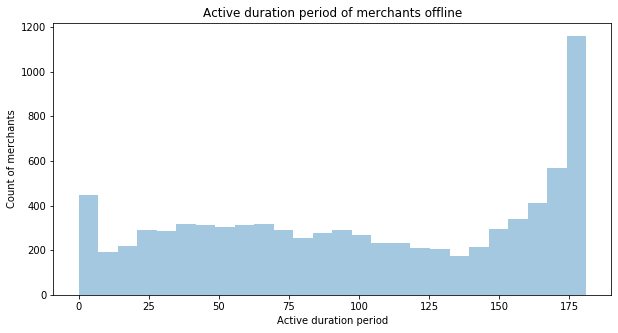

In [717]:
plt.figure(figsize=(10,5))
sns.distplot(df_off_temp2["ActiveDuration"],kde=False,bins=26)
plt.xlabel("Active duration period")
plt.ylabel("Count of merchants")
plt.title("Active duration period of merchants offline")

In [718]:
df_off_temp2[df_off_temp2["ActiveDuration"]==0]

,min,max,ActiveDuration
Merchant_id,,,
10,2016-05-17,2016-05-17,0
158,2016-05-03,2016-05-03,0
161,2016-05-29,2016-05-29,0
244,2016-06-02,2016-06-02,0
260,2016-06-13,2016-06-13,0
...,...,...,...
8707,2016-01-16,2016-01-16,0
8770,2016-05-28,2016-05-28,0
8790,2016-04-19,2016-04-19,0


In [719]:
df_on_temp2=df_on_unique.copy(deep=True)
df_on_temp2["Date"]=pd.to_datetime(df_on_temp2["Date"],format="%Y%m%d")
df_on_temp2["Date_received"]=pd.to_datetime(df_on_temp2["Date_received"],format="%Y%m%d")
df_on_temp2["DateOrder"]=df_on_temp2["Date"]
df_on_temp2["DateOrder"].fillna(df_on_temp2["Date_received"],inplace=True)
df_on_temp2=df_on_temp2.groupby("Merchant_id")["DateOrder"].agg(['min','max'])
df_on_temp2["ActiveDuration"]=df_on_temp2['max']-df_on_temp2['min']
df_on_temp2['ActiveDuration'] = df_on_temp2['ActiveDuration'].dt.days.astype('str')
df_on_temp2['ActiveDuration'] = pd.to_numeric(df_on_temp2['ActiveDuration'],errors="coerce")
df_on_temp2

,min,max,ActiveDuration
Merchant_id,,,
10001,2016-01-01,2016-06-30,181
10002,2016-01-01,2016-06-30,181
10003,2016-01-02,2016-06-30,180
10004,2016-03-05,2016-06-30,117
10005,2016-01-02,2016-06-30,180
...,...,...,...
59912,2016-01-04,2016-06-27,175
59913,2016-01-01,2016-06-30,181
59914,2016-01-01,2016-06-13,164


In [741]:
df_on_temp2.sort_values(by="max")

,min,max,ActiveDuration
Merchant_id,,,
34312,2016-01-01,2016-01-30,29
10701,2016-01-01,2016-02-01,31
12304,2016-01-11,2016-02-24,44
49608,2016-01-15,2016-03-01,46
42115,2016-02-19,2016-03-03,13
...,...,...,...
29806,2016-01-02,2016-06-30,180
29805,2016-01-01,2016-06-30,181
29803,2016-01-02,2016-06-30,180


In [720]:
df_on_temp2["ActiveDuration"].describe()

count    7999.000000
mean      170.810726
std        24.761774
min         3.000000
25%       176.000000
50%       180.000000
75%       181.000000
max       181.000000
Name: ActiveDuration, dtype: float64

Text(0.5, 1.0, 'Active duration period of merchants online')

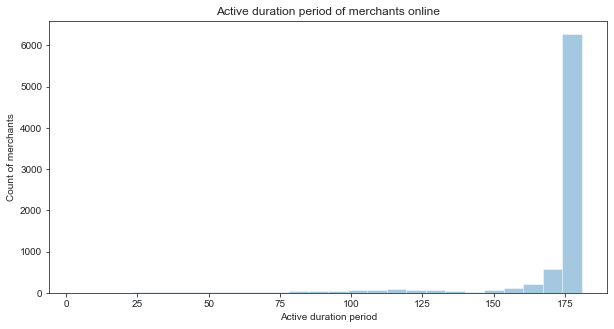

In [1382]:
plt.figure(figsize=(10,5))
sns.distplot(df_on_temp2["ActiveDuration"],kde=False,bins=26)
plt.xlabel("Active duration period")
plt.ylabel("Count of merchants")
plt.title("Active duration period of merchants online")

In [740]:
start_date = '2016-01-01'
end_date = '2016-01-31'

df_on_temp2[(df_on_temp2['min'] >= start_date)&(df_on_temp2['max'] <= end_date)]

,min,max,ActiveDuration
Merchant_id,,,
34312,2016-01-01,2016-01-30,29


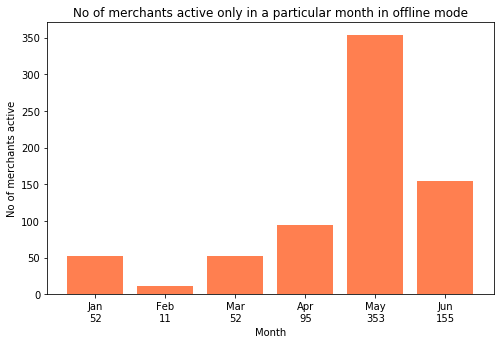

In [769]:
'''from datetime import datetime
'''
def prepList(df):
    active_list=[]
    for m in range(1,7):
        sd='2016-0'+str(m)+'-01'
        if m==2:
            ed='2016-0'+str(m)+'-29'
        else:
            if m%2==1:
                ed='2016-0'+str(m)+'-31'
            else:
                ed='2016-0'+str(m)+'-30'
        
        active_list.insert(m,df[(df['min'] >= sd) & (df['max'] <= ed)].shape[0])
    return active_list

active_list=prepList(df_off_temp2)


plt.figure(figsize=(8,5))
months=['Jan\n52','Feb\n11','Mar\n52','Apr\n95','May\n353','Jun\n155']

left = [1, 2, 3, 4, 5, 6] 

ax=plt.bar(left, active_list, tick_label = months, width = 0.8, color = 'coral') 

    
plt.xlabel('Month') 
plt.ylabel('No of merchants active') 
plt.title('No of merchants active only in a particular month in offline mode') 
plt.show() 


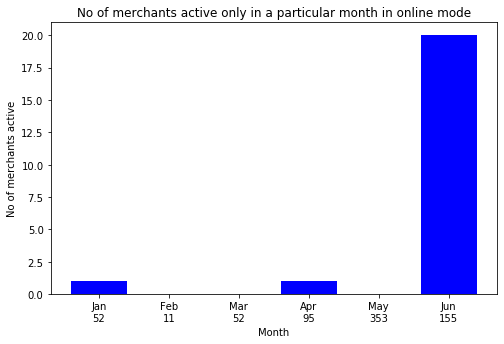

In [768]:
'''from datetime import datetime
'''
def prepList2(df):
    active_list1=[]
    for m in range(1,7):
        sd='2016-0'+str(m)+'-01'
        if m==2:
            ed='2016-0'+str(m)+'-29'
        else:
            if m%2==1:
                ed='2016-0'+str(m)+'-31'
            else:
                ed='2016-0'+str(m)+'-30'
        
        active_list1.insert(m,df[(df['min'] >= sd) & (df['max'] <= ed)].shape[0])
    return active_list1

active_list1=prepList2(df_on_temp2)


plt.figure(figsize=(8,5))
months=['Jan\n52','Feb\n11','Mar\n52','Apr\n95','May\n353','Jun\n155']

left = [1, 2, 3, 4, 5, 6] 

ax=plt.bar(left, active_list1, tick_label = months, width = 0.8, color = 'blue') 

    
plt.xlabel('Month') 
plt.ylabel('No of merchants active') 
plt.title('No of merchants active only in a particular month in online mode') 
plt.show() 


In [751]:
df_off_temp2[(df_off_temp2['ActiveDuration'] >= 150) & (df_off_temp2['ActiveDuration'] <= 182)].shape[0]

2648

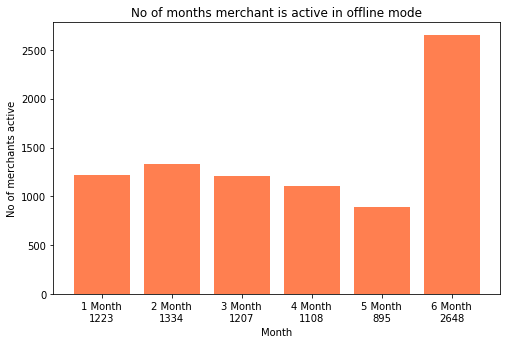

In [762]:
'''from datetime import datetime
'''
def prepList3(df):
    active_list2=[]
    sdur=0
    edur=30
    for m in range(1,7):
        if m==6:
            edur=183
        active_list2.insert(m,df[(df['ActiveDuration'] >= sdur) & (df['ActiveDuration'] < edur)].shape[0])
        sdur=sdur+30
        edur=edur+30
    return active_list2

active_list2=prepList3(df_off_temp2)


plt.figure(figsize=(8,5))
months=['1 Month\n1223','2 Month\n1334','3 Month\n1207','4 Month\n1108','5 Month\n895','6 Month\n2648']

left = [1, 2, 3, 4, 5, 6] 

ax=plt.bar(left, active_list2, tick_label = months, width = 0.8, color = 'coral') 

    
plt.xlabel('Month') 
plt.ylabel('No of merchants active') 
plt.title('No of months merchant is active in offline mode') 
plt.show() 


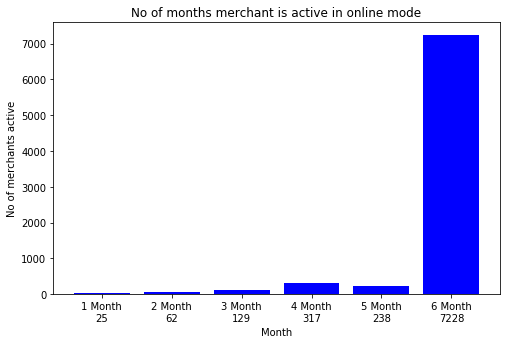

In [766]:
 '''from datetime import datetime
'''
def prepList3(df):
    active_list2=[]
    sdur=0
    edur=30
    for m in range(1,7):
        if m==6:
            edur=183
        active_list2.insert(m,df[(df['ActiveDuration'] >= sdur) & (df['ActiveDuration'] < edur)].shape[0])
        sdur=sdur+30
        edur=edur+30
    return active_list2

active_list2=prepList3(df_on_temp2)


plt.figure(figsize=(8,5))
months=['1 Month\n25','2 Month\n62','3 Month\n129','4 Month\n317','5 Month\n238','6 Month\n7228']

left = [1, 2, 3, 4, 5, 6] 

ax=plt.bar(left, active_list2, tick_label = months, width = 0.8, color = 'blue') 

    
plt.xlabel('Month') 
plt.ylabel('No of merchants active') 
plt.title('No of months merchant is active in online mode') 
plt.show() 


In [764]:
active_list2

[25, 62, 129, 317, 238, 7228]

# Date analysis

## Weekday and Weekend analysis on Coupon releases & redemption  

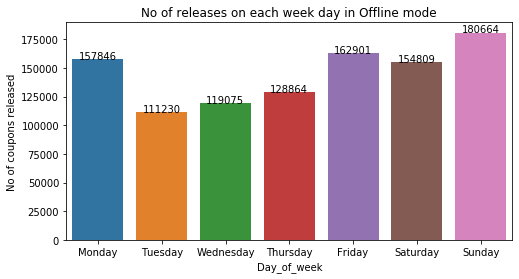

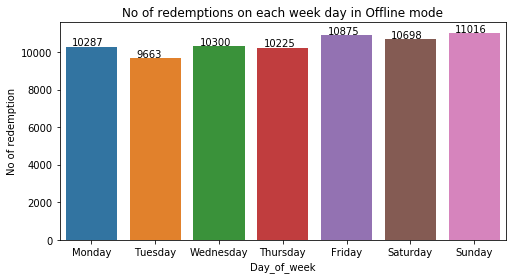

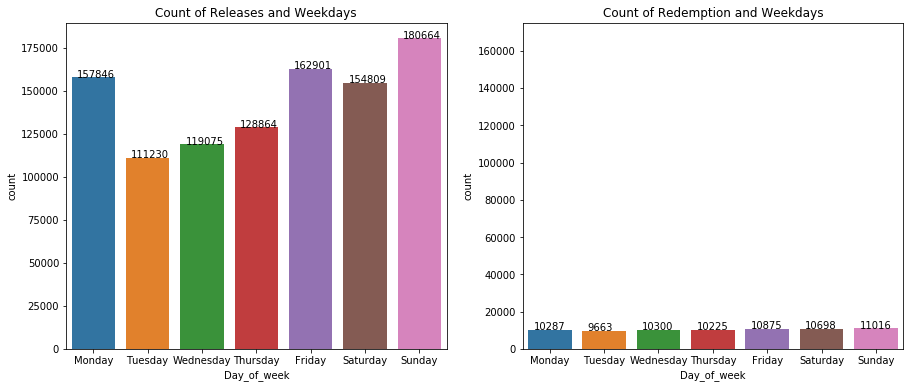

In [849]:
#redemption count
df_off_week_red=df_off_unique[(df_off_unique["Coupon_id"].isna()==False) & (df_off_unique["Date"].isna()==False)].copy(deep=True)
df_off_week_red["Date_received"]=pd.to_datetime(df_off_week_red["Date_received"],format="%Y%m%d")
df_off_week_red["Date"]=pd.to_datetime(df_off_week_red["Date"],format="%Y%m%d")
df_off_week_red["Day_of_week"]=df_off_week_red['Date'].dt.dayofweek
df_off_week_red["Weekend_redemption"]=np.where((df_off_week_red['Date'].dt.dayofweek) < 5,0,1)

#release count
df_off_week_rel=df_off_unique[df_off_unique["Coupon_id"].isna()==False].copy(deep=True)
df_off_week_rel["Date_received"]=pd.to_datetime(df_off_week_rel["Date_received"],format="%Y%m%d")
df_off_week_rel["Date"]=pd.to_datetime(df_off_week_rel["Date"],format="%Y%m%d")
df_off_week_rel["Day_of_week"]=df_off_week_rel['Date_received'].dt.dayofweek
df_off_week_rel["Weekend_release"]=np.where((df_off_week_rel['Date_received'].dt.dayofweek) < 5,0,1)

#plot for No of releases on each week day in Offline mode
plt.figure(figsize=(8,4))
ax = sns.countplot(df_off_week_rel["Day_of_week"])
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.ylabel("No of coupons released")
plt.title("No of releases on each week day in Offline mode")
ax.set_xticklabels(day)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()


#plot for No of redemptions on each week day in Offline mode
plt.figure(figsize=(8,4))
ax = sns.countplot(df_off_week_red["Day_of_week"])
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.ylabel("No of redemption")
plt.title("No of redemptions on each week day in Offline mode")
ax.set_xticklabels(day)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()

#side by side plots

fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plt.subplot(121)
# plt.figure(figsize=(7,4))
ax1 = sns.countplot(df_off_week_rel['Day_of_week'])
ax1.set_xticklabels(ax.get_xticklabels())
for p in ax1.patches:
       ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Count of Releases on Weekdays')

plt.subplot(122)
# plt.figure(figsize=(7,4))
ax2 = sns.countplot(df_off_week_red['Day_of_week'])
ax2.set_xticklabels(ax.get_xticklabels())
for p in ax2.patches:
       ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.ylim(0,175000)

plt.title('Count of Redemption on Weekdays')

plt.show()

In [1388]:
df_off_week_red

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count,Day_of_week,Weekend_redemption,Month
33,184,3381,9776.0,10:5,0.0,2016-01-29,2016-02-28,1,6,1,2
76,417,775,5435.0,30:5,0.0,2016-03-29,2016-04-12,1,1,0,4
150,687,6454,14031.0,100:10,NaN,2016-01-28,2016-01-30,1,5,1,1
153,687,8594,9353.0,30:1,NaN,2016-03-28,2016-04-02,1,5,1,4
158,696,4195,3726.0,0.9,0.0,2016-04-11,2016-04-13,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...
1716956,7360845,5341,11539.0,30:5,NaN,2016-01-28,2016-02-15,1,0,0,2
1716959,7360863,5618,6379.0,100:10,0.0,2016-01-19,2016-01-27,1,2,0,1
1716966,7360928,3532,1563.0,30:5,0.0,2016-05-22,2016-05-27,1,4,0,5
1716975,7360941,6485,10323.0,20:5,0.0,2016-03-25,2016-03-26,1,5,1,3


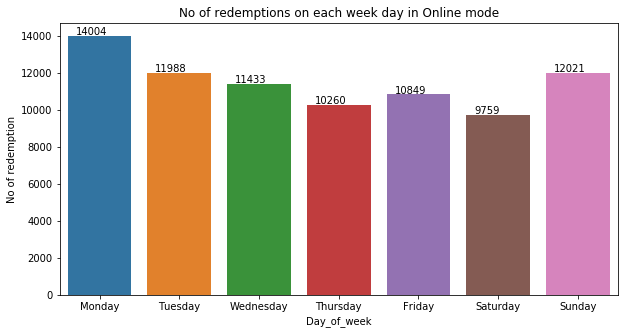

In [852]:
df_on_week_red=df_on_unique[(df_on_unique["Coupon_id"].isna()==False) & (df_on_unique["Coupon_id"]!="fixed") & (df_on_unique["Date"].isna()==False)].copy(deep=True)
df_on_week_red["Date_received"]=pd.to_datetime(df_on_week_red["Date_received"],format="%Y%m%d")
df_on_week_red["Date"]=pd.to_datetime(df_on_week_red["Date"],format="%Y%m%d")
df_on_week_red["Day_of_week"]=df_on_week_red['Date'].dt.dayofweek
df_on_week_red["Weekend_redemption"]=np.where((df_on_week_red['Date'].dt.dayofweek) < 5,0,1)

plt.figure(figsize=(10,5))
ax = sns.countplot(df_on_week_red["Day_of_week"])
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.ylabel("No of redemption")
plt.title("No of redemptions on each week day in Online mode")
ax.set_xticklabels(day)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()



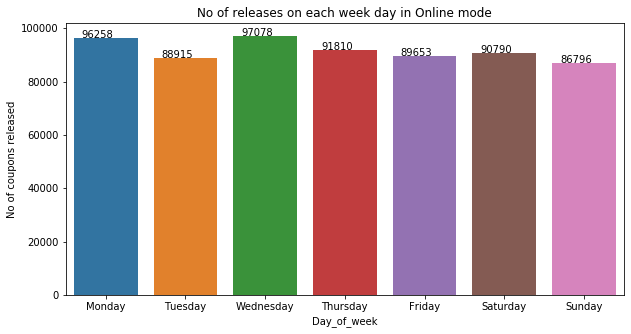

In [854]:
df_on_week_rel=df_on_unique[(df_on_unique["Coupon_id"].isna()==False) & (df_on_unique["Coupon_id"]!="fixed")].copy(deep=True)
df_on_week_rel["Date_received"]=pd.to_datetime(df_on_week_rel["Date_received"],format="%Y%m%d")
df_on_week_rel["Date"]=pd.to_datetime(df_on_week_rel["Date"],format="%Y%m%d")
df_on_week_rel["Day_of_week"]=df_on_week_rel['Date_received'].dt.dayofweek
df_on_week_rel["Weekend_redemption"]=np.where((df_on_week_rel['Date_received'].dt.dayofweek) < 5,0,1)

plt.figure(figsize=(10,5))
ax = sns.countplot(df_on_week_rel["Day_of_week"])
day=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.ylabel("No of coupons released")
plt.title("No of releases on each week day in Online mode")
ax.set_xticklabels(day)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()

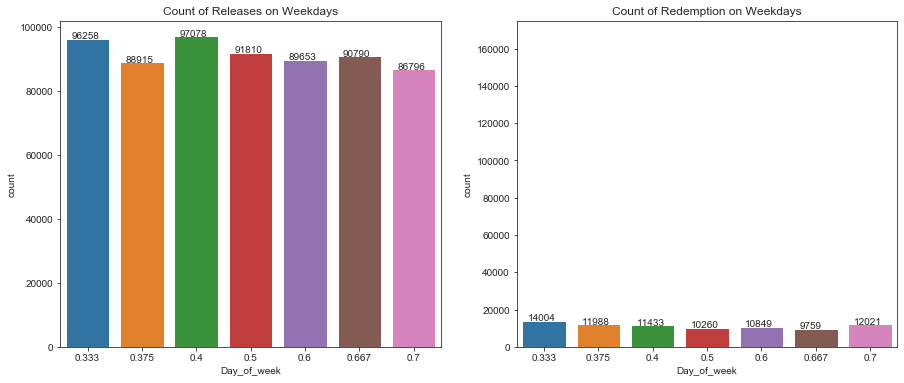

In [1389]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
plt.subplot(121)
# plt.figure(figsize=(7,4))
ax1 = sns.countplot(df_on_week_rel['Day_of_week'])
ax1.set_xticklabels(ax.get_xticklabels())
for p in ax1.patches:
       ax1.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.title('Count of Releases on Weekdays')

plt.subplot(122)
# plt.figure(figsize=(7,4))
ax2 = sns.countplot(df_on_week_red['Day_of_week'])
ax2.set_xticklabels(ax.get_xticklabels())
for p in ax2.patches:
       ax2.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
plt.ylim(0,175000)

plt.title('Count of Redemption on Weekdays')

plt.show()

## Month wise analysis on Coupon releases & redemption  

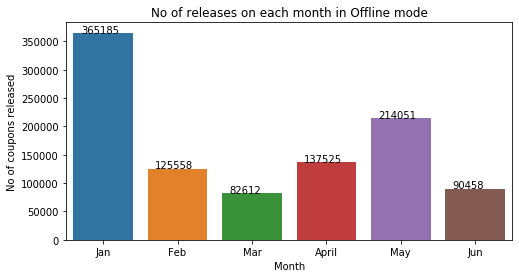

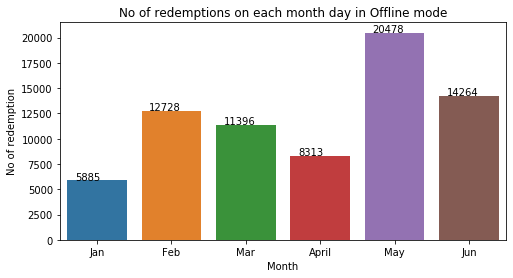

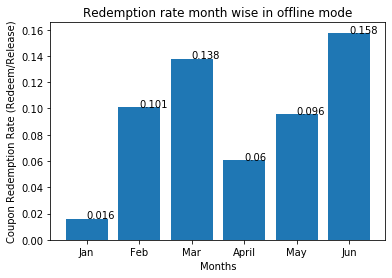

,Release,Redeemed,Ratio
1,365185,5885,0.016115
2,125558,12728,0.101371
3,82612,11396,0.137946
4,137525,8313,0.060447
5,214051,20478,0.095669
6,90458,14264,0.157686


In [972]:
#redemption count
#df_off_month_red=df_off_unique[(df_off_unique["Coupon_id"].isna()==False) & (df_off_unique["Date"].isna()==False)].copy(deep=True)
#df_off_week_red["Date_received"]=pd.to_datetime(df_off_month_red["Date_received"],format="%Y%m%d")
#df_off_week_red["Date"]=pd.to_datetime(df_off_month_red["Date"],format="%Y%m%d")
df_off_week_red["Month"]=df_off_week_red['Date'].dt.month

#release count
#df_off_month_rel=df_off_unique[df_off_unique["Coupon_id"].isna()==False].copy(deep=True)
#df_off_month_rel["Date_received"]=pd.to_datetime(df_off_month_rel["Date_received"],format="%Y%m%d")
#df_off_month_rel["Date"]=pd.to_datetime(df_off_month_rel["Date"],format="%Y%m%d")
df_off_week_rel["Month"]=df_off_week_rel['Date_received'].dt.month


#plot for No of releases on each week day in Offline mode
plt.figure(figsize=(8,4))
ax = sns.countplot(df_off_week_rel["Month"])
months=['Jan','Feb','Mar','April','May','Jun']
plt.ylabel("No of coupons released")
plt.title("No of releases on each month in Offline mode")
ax.set_xticklabels(months)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()


#plot for No of redemptions on each week day in Offline mode
plt.figure(figsize=(8,4))
ax = sns.countplot(df_off_week_red["Month"])
months=['Jan','Feb','Mar','April','May','Jun']
plt.ylabel("No of redemption")
plt.title("No of redemptions on each month day in Offline mode")
ax.set_xticklabels(months)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()

month_rel = pd.DataFrame(df_off_week_rel['Month'].value_counts())
month_red = pd.DataFrame(df_off_week_red['Month'].value_counts())
month = pd.concat([month_rel, month_red], axis=1)
month.columns = ['Release','Redeemed']
month['Ratio'] = month['Redeemed']/month['Release']
month



plt.figure()
ax=plt.bar(months,month["Ratio"])
for a,b in zip(months, month["Ratio"]):
    plt.text(a, b, str(round(b,3)))
plt.title("Redemption rate month wise in offline mode")
plt.ylabel("Coupon Redemption Rate (Redeem/Release)")
plt.xlabel("Months")
plt.show()

month

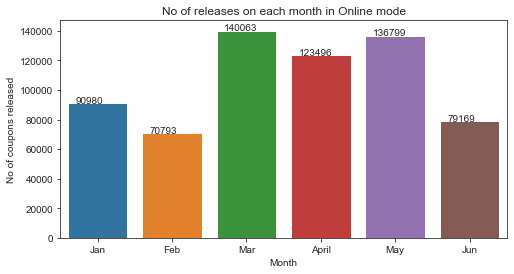

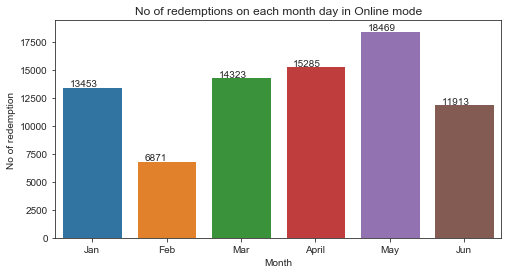

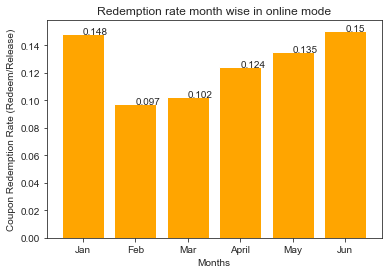

,Release,Redeemed,Ratio
1,90980,13453,0.147868
2,70793,6871,0.097058
3,140063,14323,0.102261
4,123496,15285,0.123769
5,136799,18469,0.135008
6,79169,11913,0.150476


In [1252]:
#redemption count
#df_off_month_red=df_off_unique[(df_off_unique["Coupon_id"].isna()==False) & (df_off_unique["Date"].isna()==False)].copy(deep=True)
#df_off_week_red["Date_received"]=pd.to_datetime(df_off_month_red["Date_received"],format="%Y%m%d")
#df_off_week_red["Date"]=pd.to_datetime(df_off_month_red["Date"],format="%Y%m%d")
df_on_week_red["Month"]=df_on_week_red['Date'].dt.month

#release count
#df_off_month_rel=df_off_unique[df_off_unique["Coupon_id"].isna()==False].copy(deep=True)
#df_off_month_rel["Date_received"]=pd.to_datetime(df_off_month_rel["Date_received"],format="%Y%m%d")
#df_off_month_rel["Date"]=pd.to_datetime(df_off_month_rel["Date"],format="%Y%m%d")
df_on_week_rel["Month"]=df_on_week_rel['Date_received'].dt.month


#plot for No of releases on each week day in Online mode
plt.figure(figsize=(8,4))
ax = sns.countplot(df_on_week_rel["Month"])
months=['Jan','Feb','Mar','April','May','Jun']
plt.ylabel("No of coupons released")
plt.title("No of releases on each month in Online mode")
ax.set_xticklabels(months)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()


#plot for No of redemptions on each week day in Online mode
plt.figure(figsize=(8,4))
ax = sns.countplot(df_on_week_red["Month"])
months=['Jan','Feb','Mar','April','May','Jun']
plt.ylabel("No of redemption")
plt.title("No of redemptions on each month day in Online mode")
ax.set_xticklabels(months)
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      
plt.show()


month_rel_on = pd.DataFrame(df_on_week_rel['Month'].value_counts())
month_red_on = pd.DataFrame(df_on_week_red['Month'].value_counts())
month_on = pd.concat([month_rel_on, month_red_on], axis=1)
month_on.columns = ['Release','Redeemed']
month_on['Ratio'] = month_on['Redeemed']/month_on['Release']
month_on



plt.figure(figsize=(6,4))
ax=plt.bar(months,month_on["Ratio"],color='orange')
for a,b in zip(months, month_on["Ratio"]):
    plt.text(a, b, str(round(b,3)))
plt.title("Redemption rate month wise in online mode")
plt.ylabel("Coupon Redemption Rate (Redeem/Release)")
plt.xlabel("Months")
plt.show()

month_on

## Discount Rate Analysis 

In [1011]:
df_off_dis=df_off_unique[df_off_unique["Discount_rate"].isna()==False].copy(deep=True)
df_off_dis["Discount_rate"].nunique()

45

In [1012]:
df_on_dis=df_on_unique[(df_on_unique["Discount_rate"].isna()==False) & (df_on_unique["Discount_rate"]!="fixed")].copy(deep=True)
df_on_dis["Discount_rate"].nunique()

63

In [1013]:
#offline
split_data = df_off_dis["Discount_rate"].str.split(":")
data = split_data.to_list()


for i in range(len(data)):
    if len(data[i])==1:
        data[i].insert(1,100-float(data[i][0])*100)
        data[i][0]=100
        

df_off_dis['temp']=data
df_off_dis[['Original_Price','Discounted_price']] = pd.DataFrame(df_off_dis.temp.values.tolist(), index= df_off_dis.index)
df_off_dis["Original_Price"]=df_off_dis["Original_Price"].astype(float)
df_off_dis["Discounted_price"]=df_off_dis["Discounted_price"].astype(float)
df_off_dis["Rate"]=round((df_off_dis["Original_Price"]-df_off_dis["Discounted_price"])/df_off_dis["Original_Price"],3)
del df_off_dis["temp"] 


#online
split_data1 = df_on_dis["Discount_rate"].str.split(":")
data1 = split_data1.to_list()


for i in range(len(data1)):
    if len(data1[i])==1:
        data1[i].insert(1,100-float(data1[i][0])*100)
        data1[i][0]=100
        

df_on_dis['temp']=data1
df_on_dis[['Original_Price','Discounted_price']] = pd.DataFrame(df_on_dis.temp.values.tolist(), index= df_on_dis.index)
df_on_dis["Original_Price"]=df_on_dis["Original_Price"].astype(float)
df_on_dis["Discounted_price"]=df_on_dis["Discounted_price"].astype(float)
df_on_dis["Rate"]=round((df_on_dis["Original_Price"]-df_on_dis["Discounted_price"])/df_on_dis["Original_Price"],3)
del df_on_dis["temp"] 

display(df_off_dis)
display(df_on_dis)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count,Original_Price,Discounted_price,Rate
0,4,1433,8735.0,30:5,10.0,20160214.0,NaN,1,30.0,5.0,0.833
1,4,1469,2902.0,0.95,10.0,20160607.0,NaN,1,100.0,5.0,0.950
2,35,3381,1807.0,300:30,0.0,20160130.0,NaN,1,300.0,30.0,0.900
3,35,3381,9776.0,10:5,0.0,20160129.0,NaN,1,10.0,5.0,0.500
4,35,3381,11951.0,200:20,0.0,20160129.0,NaN,1,200.0,20.0,0.900
...,...,...,...,...,...,...,...,...,...,...,...
1716984,7360967,3103,2375.0,30:1,2.0,20160120.0,NaN,1,30.0,1.0,0.967
1716987,7360967,6485,10323.0,20:5,1.0,20160322.0,NaN,2,20.0,5.0,0.750
1716988,7361024,1433,8735.0,30:5,10.0,20160211.0,NaN,1,30.0,5.0,0.833
1716989,7361032,2146,11173.0,100:10,2.0,20160129.0,NaN,1,100.0,10.0,0.900


,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count,Original_Price,Discounted_price,Rate
0,4,25104,2,100145044,100:10,20160331.0,NaN,1,100.0,10.0,0.900
14,209,27710,1,100081876,150:10,20160514.0,20160514.0,1,150.0,10.0,0.933
44,236,53305,2,100075632,200:10,20160221.0,NaN,1,200.0,10.0,0.950
45,236,53305,2,100181719,50:1,20160221.0,NaN,1,50.0,1.0,0.980
46,236,53305,2,100214552,150:5,20160221.0,NaN,1,150.0,5.0,0.967
...,...,...,...,...,...,...,...,...,...,...,...
5822532,15499999,54809,2,100016231,30:20,20160331.0,NaN,1,30.0,20.0,0.333
5822533,15499999,54809,2,100041850,30:20,20160602.0,NaN,1,30.0,20.0,0.333
5822534,15499999,54809,2,100081109,30:20,20160131.0,NaN,1,30.0,20.0,0.333
5822535,15499999,54809,2,100139556,30:20,20160501.0,NaN,1,30.0,20.0,0.333


In [1397]:
df_off_dis.Rate.max()

0.99

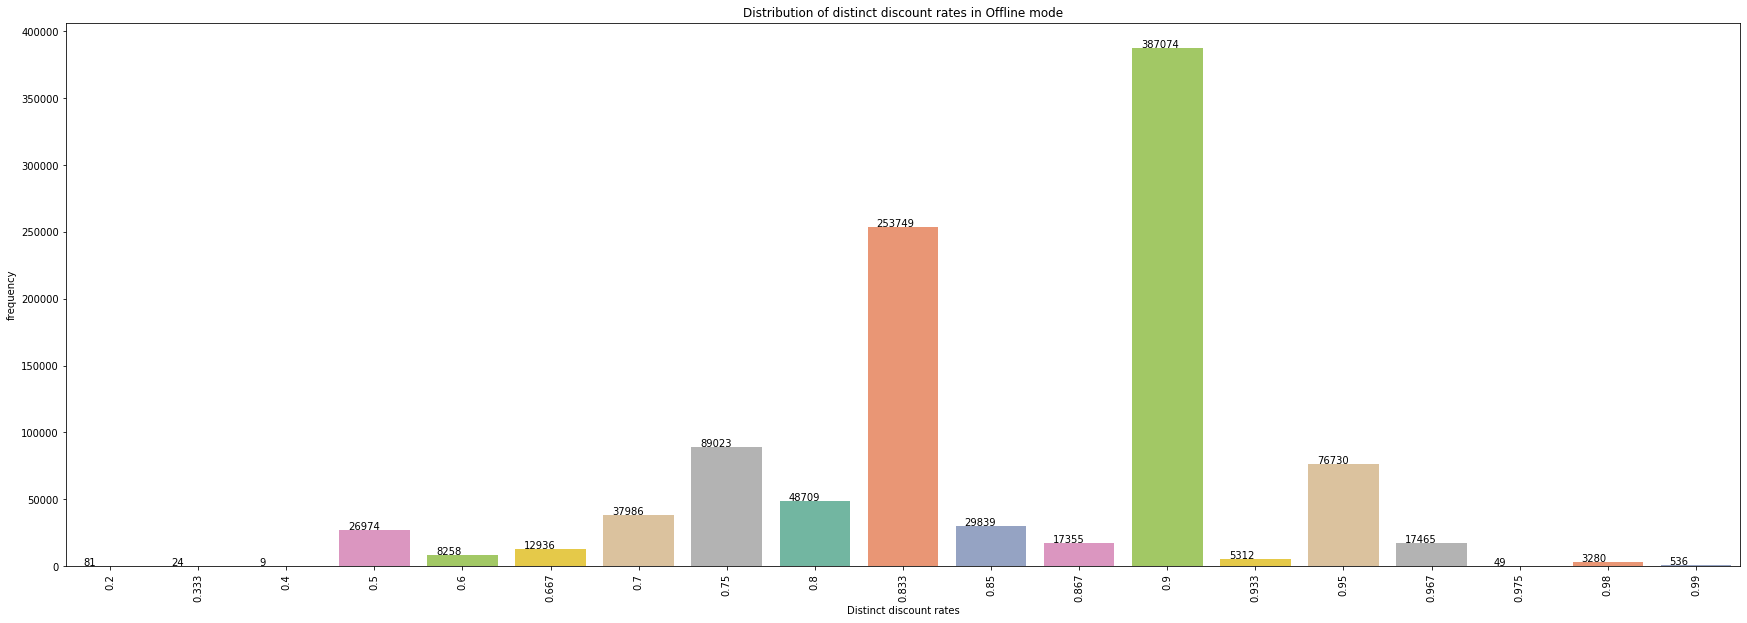

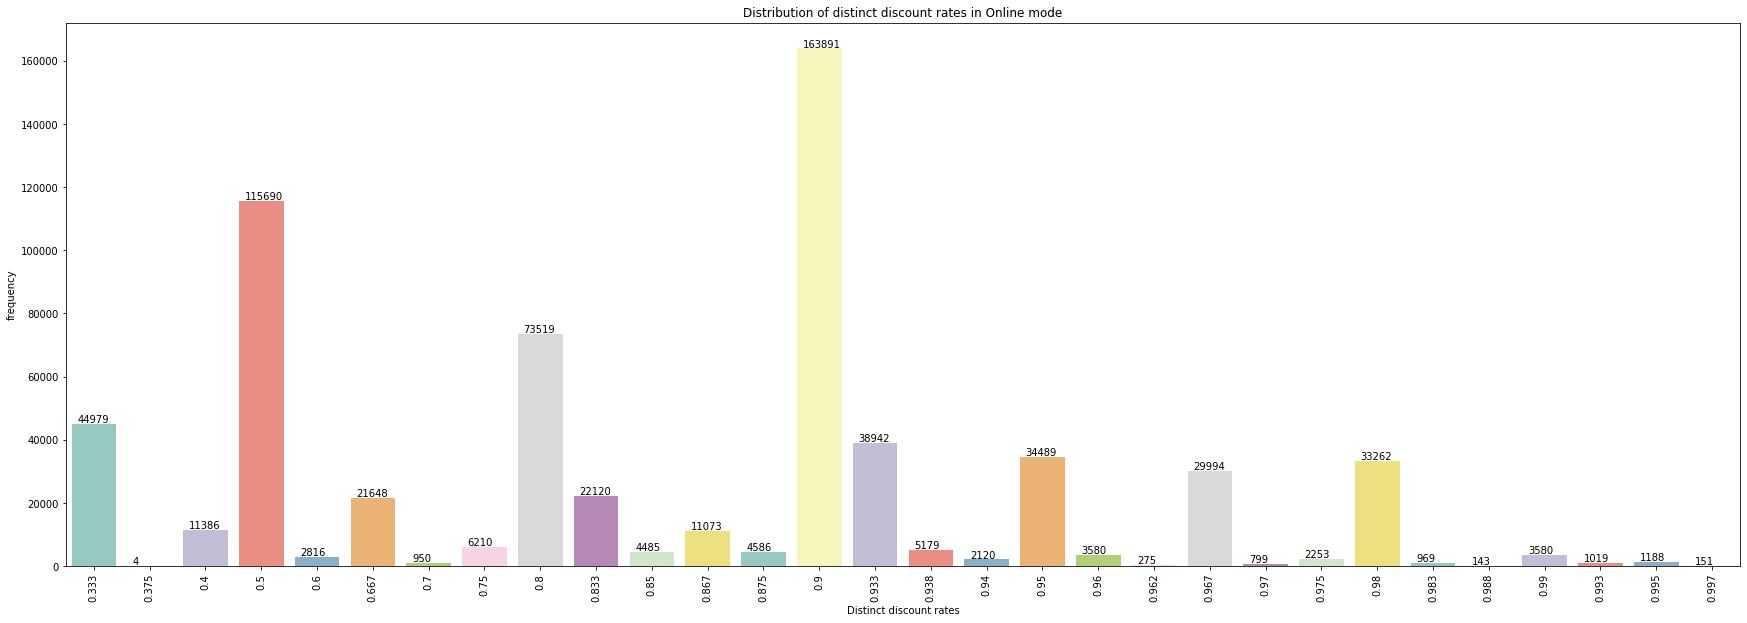

In [973]:
#offline
plt.figure(figsize=(30,10))
ax=sns.countplot(df_off_dis["Rate"],palette='Set2')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("Distribution of distinct discount rates in Offline mode")
plt.show()



#online
plt.figure(figsize=(30,10))
ax=sns.countplot(df_on_dis["Rate"],palette='Set3')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("Distribution of distinct discount rates in Online mode")
plt.show()

In [1426]:
#df_off_dis[df_off_dis["Date"].isna()].Rate.value_counts()

month_rel_on = pd.DataFrame(df_off_dis[df_off_dis["Date"].isna()].Rate.value_counts())
month_red_on = pd.DataFrame(df_off_dis[df_off_dis["Date"].isna()==False].Rate.value_counts())
month_on = pd.concat([month_rel_on, month_red_on], axis=1)
month_on.columns = ['Release','Redeemed']
month_on['Ratio'] = month_on['Redeemed']/month_on['Release']
months=month_on.index
month_on.reset_index(inplace=True)
month_on["index"]=month_on["index"].astype(str)
month_on

,index,Release,Redeemed,Ratio
0,0.2,75,6,0.080000
1,0.333,23,1,0.043478
2,0.4,8,1,0.125000
3,0.5,23579,3395,0.143984
4,0.6,7770,488,0.062806
5,0.667,12556,380,0.030264
6,0.7,36950,1036,0.028038
7,0.75,77374,11649,0.150554
8,0.8,45090,3619,0.080262
9,0.833,231045,22704,0.098267


In [1429]:
month_rel_on = pd.DataFrame(df_on_dis[df_on_dis["Date"].isna()].Rate.value_counts())
month_red_on = pd.DataFrame(df_on_dis[df_on_dis["Date"].isna()==False].Rate.value_counts())
month_on = pd.concat([month_rel_on, month_red_on], axis=1)
month_on.columns = ['Release','Redeemed']
month_on['Ratio'] = month_on['Redeemed']/month_on['Release']
months=month_on.index
month_on.reset_index(inplace=True)
month_on["index"]=month_on["index"].astype(str)
month_on

,index,Release,Redeemed,Ratio
0,0.333,41060.0,3919,0.095446
1,0.375,NaN,4,NaN
2,0.4,8858.0,2528,0.285392
3,0.5,100605.0,15085,0.149943
4,0.6,2440.0,376,0.154098
5,0.667,20590.0,1058,0.051384
6,0.7,860.0,90,0.104651
7,0.75,5541.0,669,0.120736
8,0.8,64585.0,8934,0.138329
9,0.833,19713.0,2407,0.122102


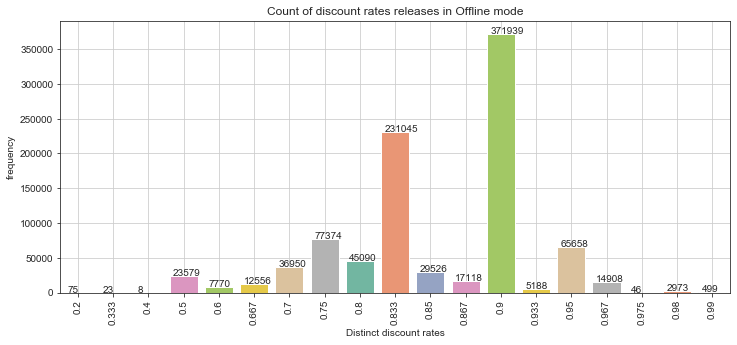

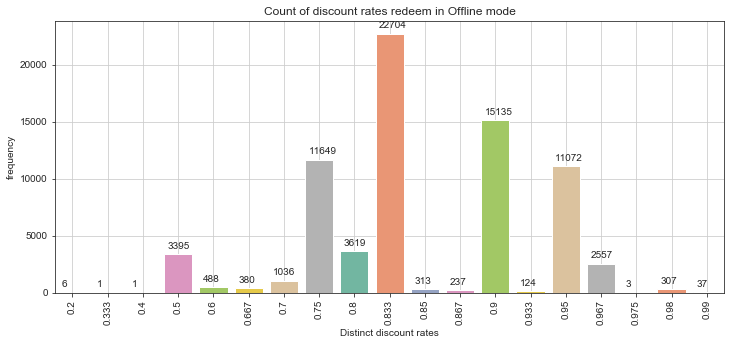

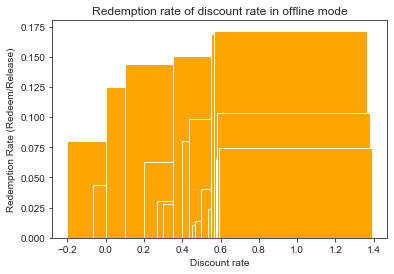

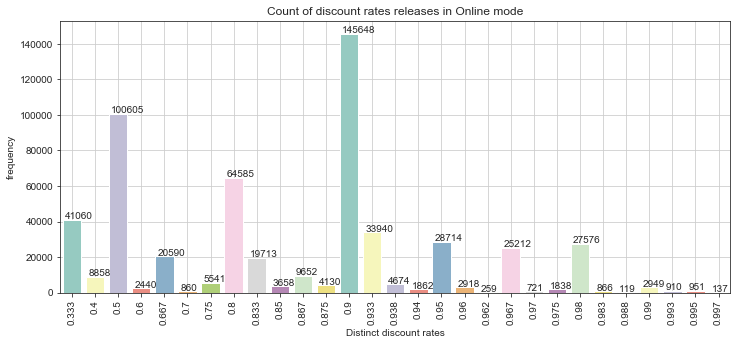

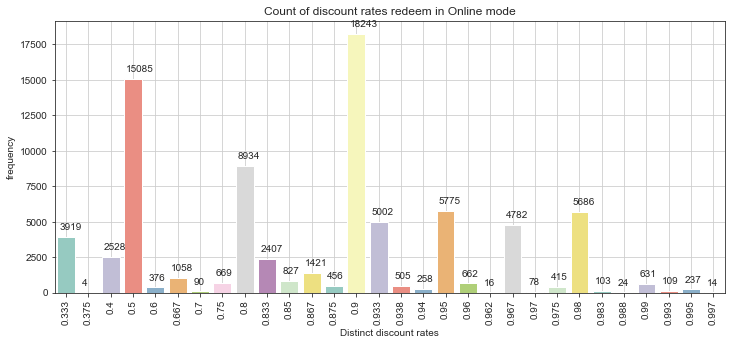

In [1428]:
#offline releases
plt.figure(figsize=(12,5))
ax=sns.countplot(df_off_dis[df_off_dis["Date"].isna()].Rate,palette='Set2')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
ax.grid(True)

plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("Count of discount rates releases in Offline mode")
plt.show()

#offline redemption
plt.figure(figsize=(12,5))
ax=sns.countplot(df_off_dis[df_off_dis["Date"].isna()==False].Rate,palette='Set2')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
ax.grid(True)

plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("Count of discount rates redeem in Offline mode")
plt.show()


plt.figure(figsize=(6,4))
ax=plt.bar(months,month_on["Ratio"],color='orange')

plt.title("Redemption rate of discount rate in offline mode")
plt.ylabel("Redemption Rate (Redeem/Release)")
plt.xlabel("Discount rate")
plt.show()


'''
dis_rel_off = pd.DataFrame(df_on_week_rel['Month'].value_counts())
dis_red_off = pd.DataFrame(df_on_week_red['Month'].value_counts())
month_on = pd.concat([month_rel_on, month_red_on], axis=1)
month_on.columns = ['Release','Redeemed']
month_on['Ratio'] = month_on['Redeemed']/month_on['Release']
month_on



plt.figure(figsize=(6,4))
ax=plt.bar(months,month_on["Ratio"],color='orange')
for a,b in zip(months, month_on["Ratio"]):
    plt.text(a, b, str(round(b,3)))
plt.title("Redemption rate month wise in offline mode")
plt.ylabel("Coupon Redemption Rate (Redeem/Release)")
plt.xlabel("Months")
plt.show()
'''
#online releases
plt.figure(figsize=(12,5))
ax=sns.countplot(df_on_dis[df_on_dis["Date"].isna()].Rate,palette='Set3')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
ax.grid(True)

plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("Count of discount rates releases in Online mode")
plt.show()



#online redeem
plt.figure(figsize=(12,5))

ax=sns.countplot(df_on_dis[df_on_dis["Date"].isna()==False].Rate,palette='Set3')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
ax.grid(True)

plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("Count of discount rates redeem in Online mode")
plt.show()

In [1401]:
df_off_dis["Rate"].unique()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count,Original_Price,Discounted_price,Rate
0,4,1433,8735.0,30:5,10.0,20160214.0,NaN,1,30.0,5.0,0.833
1,4,1469,2902.0,0.95,10.0,20160607.0,NaN,1,100.0,5.0,0.950
2,35,3381,1807.0,300:30,0.0,20160130.0,NaN,1,300.0,30.0,0.900
3,35,3381,9776.0,10:5,0.0,20160129.0,NaN,1,10.0,5.0,0.500
4,35,3381,11951.0,200:20,0.0,20160129.0,NaN,1,200.0,20.0,0.900
...,...,...,...,...,...,...,...,...,...,...,...
1716984,7360967,3103,2375.0,30:1,2.0,20160120.0,NaN,1,30.0,1.0,0.967
1716987,7360967,6485,10323.0,20:5,1.0,20160322.0,NaN,2,20.0,5.0,0.750
1716988,7361024,1433,8735.0,30:5,10.0,20160211.0,NaN,1,30.0,5.0,0.833
1716989,7361032,2146,11173.0,100:10,2.0,20160129.0,NaN,1,100.0,10.0,0.900


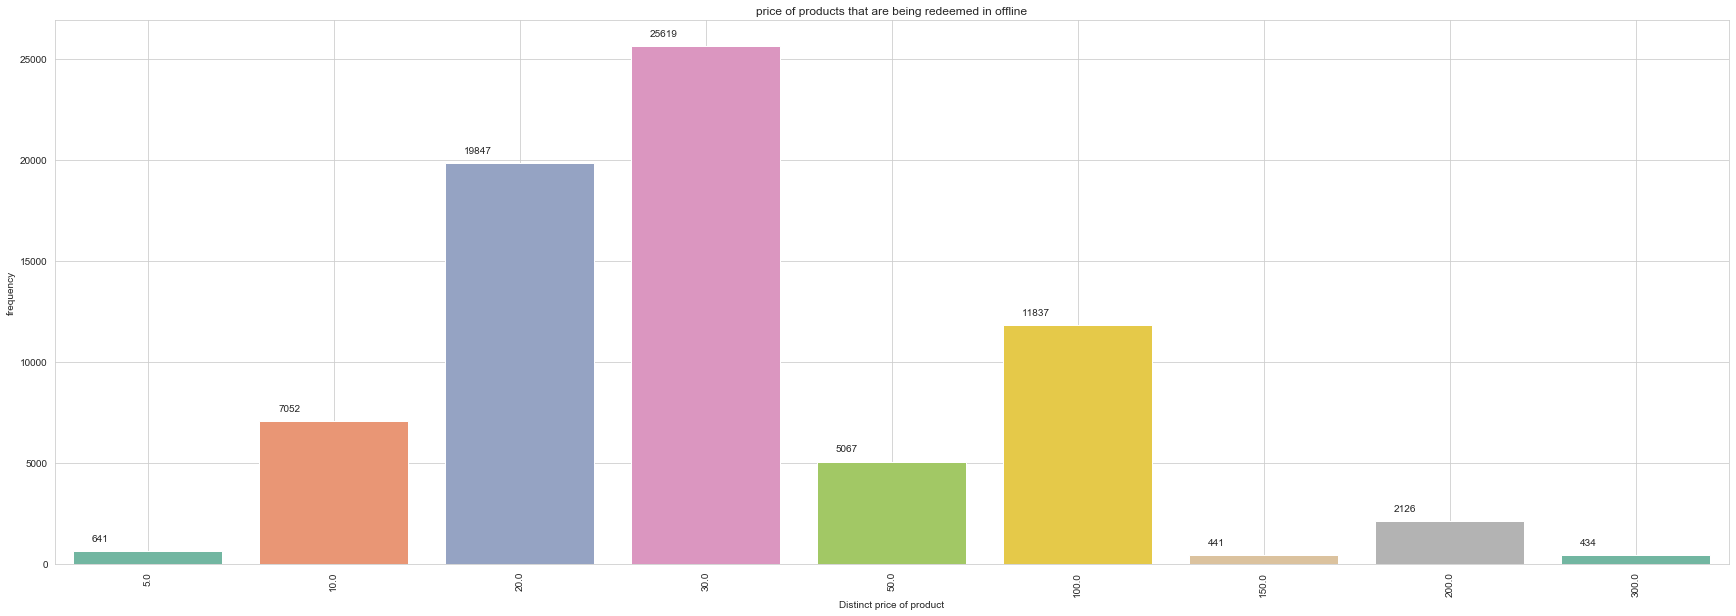

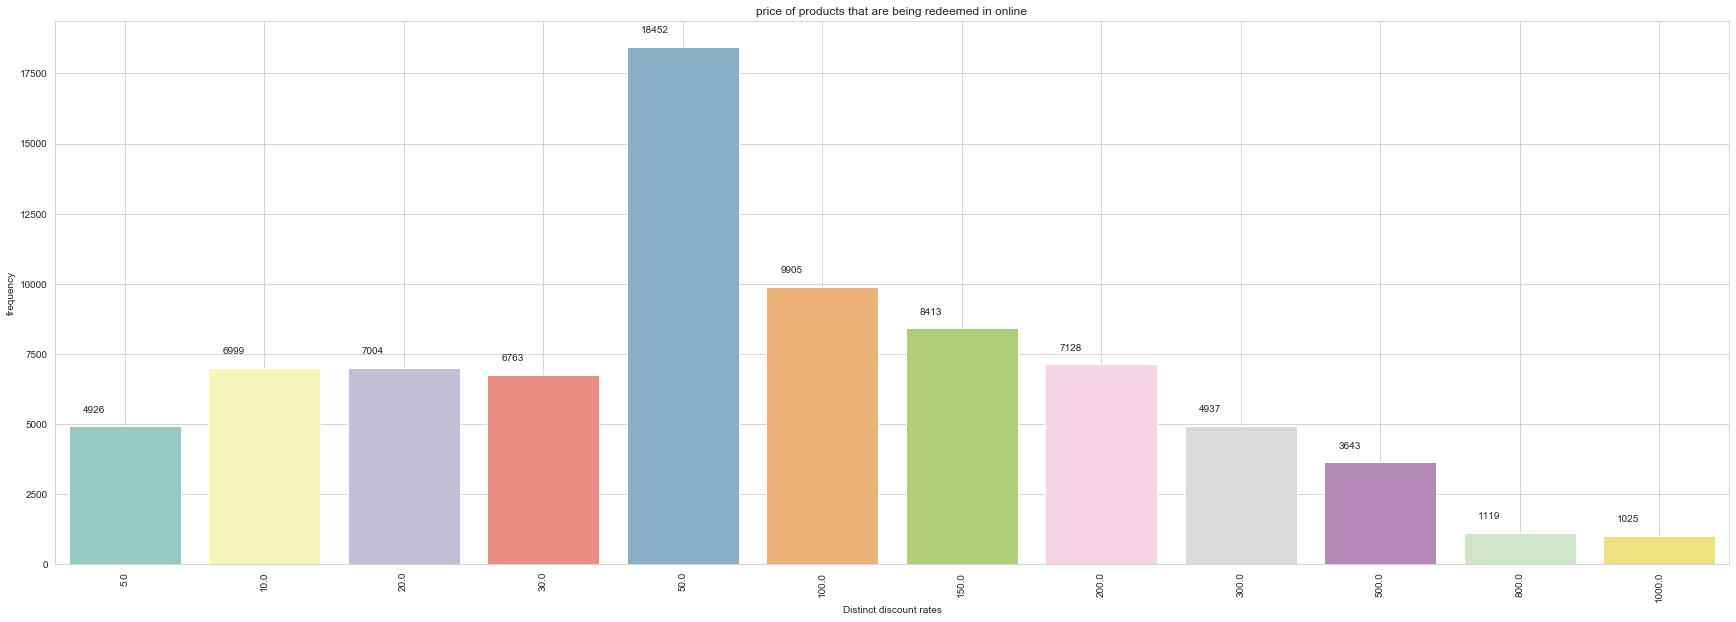

In [999]:
#offline releases
plt.figure(figsize=(30,10))
ax=sns.countplot(df_off_dis[df_off_dis["Date"].isna()==False].Original_Price,palette='Set2')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
ax.grid(True)

plt.ylabel("frequency")
plt.xlabel("Distinct price of product")
plt.title("price of products that are being redeemed in offline")
plt.show()


#online releases
plt.figure(figsize=(30,10))
ax=sns.countplot(df_on_dis[df_on_dis["Date"].isna()==False].Original_Price,palette='Set3')
for p in ax.patches:
       ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+500))    
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, 0.8)
#sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
ax.grid(True)
plt.ylabel("frequency")
plt.xlabel("Distinct discount rates")
plt.title("price of products that are being redeemed in online")
plt.show()

## Seperating the behaviour of redemption cases with non-redemption cases  

In [1051]:
#online
df_on_behavior=df_on_unique.copy(deep=True)
df_on_behavior['Date'] = pd.to_datetime(df_on_behavior['Date'],format="%Y%m%d")
df_on_behavior['Date_received'] = pd.to_datetime(df_on_behavior['Date_received'],format="%Y%m%d")
df_on_behavior["Redeem_date"]=df_on_behavior["Date"].dt.date-df_on_behavior["Date_received"].dt.date
df_on_behavior["Redeem_date"]=df_on_behavior["Date"].dt.date-df_on_behavior["Date_received"].dt.date
df_on_behavior['Redeem_date'] = df_on_behavior['Redeem_date'].dt.days.astype('str')
df_on_behavior['Redeem_date'] = pd.to_numeric(df_on_behavior['Redeem_date'],errors="coerce")
df_on_behavior["DateOrder"]=df_on_behavior["Date"]
df_on_behavior["DateOrder"].fillna(df_on_behavior["Date_received"],inplace=True)

#setting target labels
df_on_behavior["Target"]=0
df_on_behavior.loc[(df_on_behavior["Redeem_date"]<=15) & (df_on_behavior["Coupon_id"]!="fixed"), 'Target'] = 1 

'''#online
split_data1 = df_on_behavior["Discount_rate"].str.split(":")
data1 = split_data1.to_list()


#for i in range(len(data1)):
 #   if isinstance(data1[i], list):
  #      if len(data1[i])==1:
   #         data1[i].insert(1,100-float(data1[i][0])*100)
    #        data1[i][0]=100
        
#data1
df_on_behavior['temp']=data1
df_on_behavior[['Original_Price','Discounted_price']] = pd.DataFrame(df_on_behavior.temp.values.tolist(), index= df_on_behavior.index)
df_on_behavior["Original_Price"]=df_on_behavior["Original_Price"].astype(float)
df_on_behavior["Discounted_price"]=df_on_behavior["Discounted_price"].astype(float)
df_on_behavior["Rate"]=round((df_on_behavior["Original_Price"]-df_on_behavior["Discounted_price"])/df_on_behavior["Original_Price"],3)
del df_on_behavior["temp"] 
  '''      
    
    
#offline
df_off_behavior=df_off_unique.copy(deep=True)
df_off_behavior['Date'] = pd.to_datetime(df_off_behavior['Date'],format="%Y%m%d")
df_off_behavior['Date_received'] = pd.to_datetime(df_off_behavior['Date_received'],format="%Y%m%d")
df_off_behavior["Redeem_date"]=df_off_behavior["Date"].dt.date-df_off_behavior["Date_received"].dt.date
df_off_behavior["Redeem_date"]=df_off_behavior["Date"].dt.date-df_off_behavior["Date_received"].dt.date
df_off_behavior['Redeem_date'] = df_off_behavior['Redeem_date'].dt.days.astype('str')
df_off_behavior['Redeem_date'] = pd.to_numeric(df_off_behavior['Redeem_date'],errors="coerce")
df_off_behavior["DateOrder"]=df_off_behavior["Date"]
df_off_behavior["DateOrder"].fillna(df_off_behavior["Date_received"],inplace=True)

#setting target labels
df_off_behavior["Target"]=0
df_off_behavior.loc[df_off_behavior["Redeem_date"]<=15, 'Target'] = 1 



'''split_data = df_off_behavior["Discount_rate"].str.split(":")
data = split_data.to_list()

        
for i in range(len(data)):
    if isinstance(data[i], list):
        if len(data[i])==1:
            if data[i][0]!="fixed":
                data[i].insert(1,100-float(data[i][0])*100)
                data[i][0]=100
            
df_off_behavior['temp']=data
df_off_behavior[['Original_Price','Discounted_price']] = pd.DataFrame(df_off_behavior.temp.values.tolist(), index= df_off_behavior.index)
df_off_behavior["Original_Price"]=df_off_behavior["Original_Price"].astype(float)
df_off_behavior["Discounted_price"]=df_off_behavior["Discounted_price"].astype(float)
df_off_behavior["Rate"]=round((df_off_behavior["Original_Price"]-df_off_behavior["Discounted_price"])/df_off_behavior["Original_Price"],3)
del df_off_behavior["temp"] 
'''

display(df_on_behavior)
display(df_off_behavior)


,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date,Count,Redeem_date
0,4,25104,2,100145044,100:10,2016-03-31,NaT,1,NaN
1,4,45612,1,NaN,NaN,NaT,2016-03-08,1,NaN
2,36,46701,0,NaN,NaN,NaT,2016-01-20,1,NaN
3,64,11200,0,NaN,NaN,NaT,2016-05-26,1,NaN
4,64,29214,0,NaN,NaN,NaT,2016-06-06,1,NaN
...,...,...,...,...,...,...,...,...,...
5822538,15499999,55202,0,NaN,NaN,NaT,2016-03-17,8,NaN
5822539,15499999,56502,0,NaN,NaN,NaT,2016-02-27,1,NaN
5822540,15499999,59011,0,NaN,NaN,NaT,2016-03-21,1,NaN
5822541,15499999,59512,0,NaN,NaN,NaT,2016-01-16,1,NaN


,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,Count,Redeem_date
0,4,1433,8735.0,30:5,10.0,2016-02-14,NaT,1,NaN
1,4,1469,2902.0,0.95,10.0,2016-06-07,NaT,1,NaN
2,35,3381,1807.0,300:30,0.0,2016-01-30,NaT,1,NaN
3,35,3381,9776.0,10:5,0.0,2016-01-29,NaT,1,NaN
4,35,3381,11951.0,200:20,0.0,2016-01-29,NaT,1,NaN
...,...,...,...,...,...,...,...,...,...
1716986,7360967,3103,NaN,NaN,2.0,NaT,2016-01-20,1,NaN
1716987,7360967,6485,10323.0,20:5,1.0,2016-03-22,NaT,2,NaN
1716988,7361024,1433,8735.0,30:5,10.0,2016-02-11,NaT,1,NaN
1716989,7361032,2146,11173.0,100:10,2.0,2016-01-29,NaT,1,NaN


## User level distinction 

In [1177]:
#grouping by user

df_on_behavior1=df_on_behavior.groupby("User_id")['Target'].max()
df_on_behavior1=df_on_behavior1.to_frame()
df_on_behavior1.reset_index(inplace=True)

df_off_behavior1=df_off_behavior.groupby("User_id")['Target'].max()
df_off_behavior1=df_off_behavior1.to_frame()
df_off_behavior1.reset_index(inplace=True)

In [1408]:
#online
print("unique users in online data: ",df_on_behavior.User_id.nunique())

#unique users in target 1
print("unique users in target 1 in online data: ",len(df_on_behavior1[df_on_behavior1["Target"]==1]))

#unique users in target 0
print("unique users in target 0 in online data: ",len(df_on_behavior1[df_on_behavior1["Target"]==0]))


print("\n\n")

#offline
print("unique users in offline data: ",df_off_behavior.User_id.nunique())

#unique users in target 1
print("unique users in target 1 in offline data: ",len(df_off_behavior1[df_off_behavior1["Target"]==1]))

#unique users in target 0
print("unique users in target 0 in offline data: ",len(df_off_behavior1[df_off_behavior1["Target"]==0]))

unique users in online data:  762858
unique users in target 1 in online data:  61202
unique users in target 0 in online data:  701656



unique users in offline data:  539438
unique users in target 1 in offline data:  40075
unique users in target 0 in offline data:  499363


In [1197]:
print("Online:\n")

#online users

redeem_user=set(df_on_behavior1[df_on_behavior1["Target"]==1].User_id.unique())
df_redeem_user = df_on_behavior[df_on_behavior["User_id"].isin(list(redeem_user))]

not_redeem_user=set(df_on_behavior1[df_on_behavior1["Target"]==0].User_id.unique())
df_non_redeem_user = df_on_behavior[df_on_behavior["User_id"].isin(list(not_redeem_user))]

#average no of clicks 
print("average no of clicks in target 1 in online data: {:.2f}".format(df_redeem_user[df_redeem_user["Action"]==0].Count.mean()))
print("average no of clicks in target 0 in online data: {:.2f}".format(df_non_redeem_user[df_non_redeem_user["Action"]==0].Count.mean()))

#average no of getCoupon
print("average no of getCoupon in target 1 in online data: {:.2f}".format(df_redeem_user[df_redeem_user["Action"]==2].Count.mean()))
print("average no of getCoupon in target 0 in online data: {:.2f}".format(df_non_redeem_user[df_non_redeem_user["Action"]==2].Count.mean()))

#average no of purchases (only Buy)
print("average no of purchases (only Buy) in target 1 in online data: {:.2f}".format(df_redeem_user[(df_redeem_user["Target"]==0) & (df_redeem_user["Action"]==1)].Count.mean()))
print("average no of purchases (only Buy) in target 0 in online data: {:.2f}".format(df_non_redeem_user[(df_non_redeem_user["Target"]==0) & (df_non_redeem_user["Action"]==1)].Count.mean()))


print("\n\nOffline:\n")


#offline users

redeem_user=set(df_off_behavior1[df_off_behavior1["Target"]==1].User_id.unique())
df_redeem_user = df_off_behavior[df_off_behavior["User_id"].isin(list(redeem_user))]

not_redeem_user=set(df_off_behavior1[df_off_behavior1["Target"]==0].User_id.unique())
df_non_redeem_user = df_off_behavior[df_off_behavior["User_id"].isin(list(not_redeem_user))]

#average distance of users
print("average distance of users in target 1 in offline data: {:.2f}".format(df_redeem_user.Distance.mean()))
print("average distance of users in target 0 in offline data: {:.2f}".format(df_non_redeem_user.Distance.mean()))

      


Online:

average no of clicks in target 1 in online data: 2.92
average no of clicks in target 0 in online data: 2.07
average no of getCoupon in target 1 in online data: 1.21
average no of getCoupon in target 0 in online data: 1.15
average no of purchases (only Buy) in target 1 in online data: 1.81
average no of purchases (only Buy) in target 0 in online data: 1.55


Offline:

average distance of users in target 1 in offline data: 1.12
average distance of users in target 0 in offline data: 2.73


## Active duration distinction of users 

In [1220]:
#online
print("online:\n")
df_on_behavior2=df_on_behavior.groupby("User_id").agg({"DateOrder": ['min',np.max],"Target":'max'})
df_on_behavior2.reset_index(inplace=True)
df_on_behavior2["ActiveDuration"]=df_on_behavior2.iloc[:,2]-df_on_behavior2.iloc[:,1]
df_on_behavior2['ActiveDuration'] = df_on_behavior2['ActiveDuration'].dt.days.astype('str')
df_on_behavior2['ActiveDuration'] = pd.to_numeric(df_on_behavior2['ActiveDuration'],errors="coerce")

#avg active duration of users online
print("average active duration of users in target 1 in online data: {:.2f}".format(df_on_behavior2[df_on_behavior2.iloc[:,3]==1].ActiveDuration.mean()))
print("average active duration of users in target 0 in online data: {:.2f}".format(df_on_behavior2[df_on_behavior2.iloc[:,3]==0].ActiveDuration.mean()))

#offline
print("\n\n\noffline:\n")
df_off_behavior2=df_off_behavior.groupby("User_id").agg({"DateOrder": ['min',np.max],"Target":'max'})
df_off_behavior2.reset_index(inplace=True)
df_off_behavior2["ActiveDuration"]=df_off_behavior2.iloc[:,2]-df_off_behavior2.iloc[:,1]
df_off_behavior2['ActiveDuration'] = df_off_behavior2['ActiveDuration'].dt.days.astype('str')
df_off_behavior2['ActiveDuration'] = pd.to_numeric(df_off_behavior2['ActiveDuration'],errors="coerce")

#avg active duration of users online
print("average active duration of users in target 1 in offline data: {:.2f}".format(df_off_behavior2[df_off_behavior2.iloc[:,3]==1].ActiveDuration.mean()))
print("average active duration of users in target 0 in offline data: {:.2f}".format(df_off_behavior2[df_off_behavior2.iloc[:,3]==0].ActiveDuration.mean()))


online:

average active duration of users in target 1 in online data: 102.93
average active duration of users in target 0 in online data: 77.79



offline:

average active duration of users in target 1 in offline data: 82.48
average active duration of users in target 0 in offline data: 26.73


## Merchant level distinction

In [1244]:
#grouping by user

df_on_behavior1_m=df_on_behavior.groupby("Merchant_id")['Target'].max()
df_on_behavior1_m=df_on_behavior1_m.to_frame()
df_on_behavior1_m.reset_index(inplace=True)

df_off_behavior1_m=df_off_behavior.groupby("Merchant_id")['Target'].max()
df_off_behavior1_m=df_off_behavior1_m.to_frame()
df_off_behavior1_m.reset_index(inplace=True)

In [1248]:
#online
print("unique merchants in online data: ",df_on_behavior.Merchant_id.nunique())

#unique users in target 1
print("unique merchants in target 1 in online data: ",len(df_on_behavior1_m[df_on_behavior1_m["Target"]==1]))

#unique users in target 0
print("unique merchants in target 0 in online data: ",len(df_on_behavior1_m[df_on_behavior1_m["Target"]==0]))


print("\n\n")

#offline
print("unique merchants in offline data: ",df_off_behavior1_m.Merchant_id.nunique())

#unique users in target 1
print("unique merchants in target 1 in offline data: ",len(df_off_behavior1_m[df_off_behavior1_m["Target"]==1]))

#unique users in target 0
print("unique merchants in target 0 in offline data: ",len(df_off_behavior1_m[df_off_behavior1_m["Target"]==0]))

unique merchants in online data:  7999
unique merchants in target 1 in online data:  2772
unique merchants in target 0 in online data:  5227



unique merchants in offline data:  8415
unique merchants in target 1 in offline data:  3777
unique merchants in target 0 in offline data:  4638


In [1249]:
#offline users

redeem_merchant=set(df_off_behavior1_m[df_off_behavior1_m["Target"]==1].Merchant_id.unique())
df_redeem_merchant = df_off_behavior[df_off_behavior["Merchant_id"].isin(list(redeem_merchant))]

not_redeem_merchant=set(df_off_behavior1_m[df_off_behavior1_m["Target"]==0].Merchant_id.unique())
df_non_redeem_merchant = df_off_behavior[df_off_behavior["User_id"].isin(list(not_redeem_merchant))]

#average distance of users
print("average distance of merchant in target 1 in offline data: {:.2f}".format(df_redeem_merchant.Distance.mean()))
print("average distance of merchant in target 0 in offline data: {:.2f}".format(df_non_redeem_merchant.Distance.mean()))


average distance of merchant in target 1 in offline data: 2.39
average distance of merchant in target 0 in offline data: 2.19


In [1250]:
#online
print("online:\n")
df_on_behavior2_m=df_on_behavior.groupby("Merchant_id").agg({"DateOrder": ['min',np.max],"Target":'max'})
df_on_behavior2_m.reset_index(inplace=True)
df_on_behavior2_m["ActiveDuration"]=df_on_behavior2_m.iloc[:,2]-df_on_behavior2_m.iloc[:,1]
df_on_behavior2_m['ActiveDuration'] = df_on_behavior2_m['ActiveDuration'].dt.days.astype('str')
df_on_behavior2_m['ActiveDuration'] = pd.to_numeric(df_on_behavior2_m['ActiveDuration'],errors="coerce")

#avg active duration of users online
print("average active duration of merchants in target 1 in online data: {:.2f}".format(df_on_behavior2_m[df_on_behavior2_m.iloc[:,3]==1].ActiveDuration.mean()))
print("average active duration of merchants in target 0 in online data: {:.2f}".format(df_on_behavior2_m[df_on_behavior2_m.iloc[:,3]==0].ActiveDuration.mean()))

#offline
print("\n\n\noffline:\n")
df_off_behavior2_m=df_off_behavior.groupby("Merchant_id").agg({"DateOrder": ['min',np.max],"Target":'max'})
df_off_behavior2_m.reset_index(inplace=True)
df_off_behavior2_m["ActiveDuration"]=df_off_behavior2_m.iloc[:,2]-df_off_behavior2_m.iloc[:,1]
df_off_behavior2_m['ActiveDuration'] = df_off_behavior2_m['ActiveDuration'].dt.days.astype('str')
df_off_behavior2_m['ActiveDuration'] = pd.to_numeric(df_off_behavior2_m['ActiveDuration'],errors="coerce")

#avg active duration of users online
print("average active duration of merchants in target 1 in offline data: {:.2f}".format(df_off_behavior2_m[df_off_behavior2_m.iloc[:,3]==1].ActiveDuration.mean()))
print("average active duration of merchants in target 0 in offline data: {:.2f}".format(df_off_behavior2_m[df_off_behavior2_m.iloc[:,3]==0].ActiveDuration.mean()))


online:

average active duration of merchants in target 1 in online data: 174.70
average active duration of merchants in target 0 in online data: 168.75



offline:

average active duration of merchants in target 1 in offline data: 124.02
average active duration of merchants in target 0 in offline data: 82.45


In [1330]:

#redeem/release of coupons by offline merchant
df_off_behavior_m=df_off_behavior[df_off_behavior["Coupon_id"].isna()==False].copy(deep=True)
df_off_behavior3_m=df_off_behavior_m.groupby('Merchant_id').agg({"Coupon_id":"count","Date":"count","Target":'max'})
df_off_behavior3_m.rename(columns = {"Coupon_id": "Coupon_release_count","Date":"Coupon_redeem_count"}, inplace = True) 
df_off_behavior3_m["Redeem/Release"]=df_off_behavior3_m["Coupon_redeem_count"]/df_off_behavior3_m["Coupon_release_count"]
df_off_behavior3_m.reset_index(inplace=True)
df_off_behavior3_m.sort_values(by=["Coupon_release_count"],ascending=False)


#redeem/release of coupons by online merchant
df_on_behavior_m=df_on_behavior[df_on_behavior["Coupon_id"].isna()==False].copy(deep=True)
df_on_behavior3_m=df_on_behavior_m.groupby('Merchant_id').agg({"Coupon_id":"count","Date":"count","Target":'max'})
df_on_behavior3_m.rename(columns = {"Coupon_id": "Coupon_release_count","Date":"Coupon_redeem_count"}, inplace = True) 
df_on_behavior3_m["Redeem/Release"]=df_on_behavior3_m["Coupon_redeem_count"]/df_on_behavior3_m["Coupon_release_count"]
df_on_behavior3_m.reset_index(inplace=True)
df_on_behavior3_m.sort_values(by=["Coupon_release_count"],ascending=False)

,Merchant_id,Coupon_release_count,Coupon_redeem_count,Target,Redeem/Release
563,18907,42816,9563,1,0.223351
954,25104,29839,3325,1,0.111431
264,14305,26701,7985,1,0.299052
2924,54809,15052,14,1,0.000930
981,25600,13560,776,1,0.057227
...,...,...,...,...,...
2378,46907,1,1,1,1.000000
2368,46705,1,0,0,0.000000
2360,46513,1,1,1,1.000000
2352,46409,1,1,0,1.000000


In [1326]:
print("Coupon release offline merchant in Target  1: ",df_off_behavior3_m[df_off_behavior3_m["Target"]==1].Coupon_release_count.mean())
print("Coupon release offline merchant in Target  0: ",df_off_behavior3_m[df_off_behavior3_m["Target"]==0].Coupon_release_count.mean())
print("\nCoupon redeem offline merchant in Target  1: ",df_off_behavior3_m[df_off_behavior3_m["Target"]==1].Coupon_redeem_count.mean())
print("Coupon redeem offline merchant in Target  0: ",df_off_behavior3_m[df_off_behavior3_m["Target"]==0].Coupon_redeem_count.mean())
print("\nCoupon CRR offline merchant in Target  1: ",df_off_behavior3_m[df_off_behavior3_m["Target"]==1]["Redeem/Release"].mean())
print("Coupon CRR offline merchant in Target  0: ",df_off_behavior3_m[df_off_behavior3_m["Target"]==0]["Redeem/Release"].mean())

Coupon release offline merchant in Target  1:  264.46703733121524
Coupon release offline merchant in Target  0:  9.054335894621294

Coupon redeem offline merchant in Target  1:  19.236960550701614
Coupon redeem offline merchant in Target  0:  0.22283205268935236

Coupon CRR offline merchant in Target  1:  0.2684515367511486
Coupon CRR offline merchant in Target  0:  0.04097869825537327


In [1331]:
print("Coupon release online merchant in Target  1: ",df_on_behavior3_m[df_on_behavior3_m["Target"]==1].Coupon_release_count.mean())
print("Coupon release online merchant in Target  0: ",df_on_behavior3_m[df_on_behavior3_m["Target"]==0].Coupon_release_count.mean())
print("\nCoupon redeem online merchant in Target  1: ",df_on_behavior3_m[df_on_behavior3_m["Target"]==1].Coupon_redeem_count.mean())
print("Coupon redeem online merchant in Target  0: ",df_on_behavior3_m[df_on_behavior3_m["Target"]==0].Coupon_redeem_count.mean())
print("\nCoupon CRR online merchant in Target  1: ",df_on_behavior3_m[df_on_behavior3_m["Target"]==1]["Redeem/Release"].mean())
print("Coupon CRR online merchant in Target  0: ",df_on_behavior3_m[df_on_behavior3_m["Target"]==0]["Redeem/Release"].mean())

Coupon release online merchant in Target  1:  268.0735930735931
Coupon release online merchant in Target  0:  32.19315895372233

Coupon redeem online merchant in Target  1:  68.43398268398268
Coupon redeem online merchant in Target  0:  16.93158953722334

Coupon CRR online merchant in Target  1:  0.36895710985823726
Coupon CRR online merchant in Target  0:  0.10824691669589499


## relation between actions of common users from Online 2 Offline 

In [1290]:
#creating common users df and giving Actions to them

common_users=df_on_off.copy(deep=True)
common_users["Action"].fillna(3,inplace=True)
common_users.loc[(common_users["Date"].isna()==False) & (common_users["Action"]==3), 'Action'] = 4 
common_users.loc[(common_users["Date"].isna()==False) & (common_users["Coupon_id"].isna()==False) & (common_users["Distance"].isna()==False), 'Action'] = 5 
common_users.loc[:,('DateTrack')] = common_users.loc[:,('Date')]
common_users.DateTrack.fillna(common_users.Date_received, inplace=True)
common_users.loc[:,('Action')] = common_users.loc[:,('Action')].astype(int)
common_users.loc[:,('Action')] = common_users.loc[:,('Action')].astype(str)
common_users = common_users.sort_values(by=['User_id','DateTrack'])
common_user_activity = common_users.groupby(['User_id'])['Action'].apply(list).reset_index(name='ActivityList')
common_user_activity.loc[:,('ActivityList')] = common_user_activity.loc[:,('ActivityList')] .apply(lambda x: ''.join(x))
common_user_activity.loc[:,('Online_Click_Offline_Coupon')] = [1 if re.search('\d*0\d*3\d*',a) else 0 for a in common_user_activity['ActivityList']]
common_user_activity.loc[:,('Online_Click_Offline_Purchase')] = [1 if re.search('\d*0\d*4\d*',a) else 0 for a in common_user_activity['ActivityList']]
common_user_activity.loc[:,('Online_Click_Offline_Coupon_and_Redeem')] = [1 if re.search('\d*0\d*5\d*',a) else 0 for a in common_user_activity['ActivityList']]

common_user_activity

,User_id,ActivityList,Online_Click_Offline_Coupon,Online_Click_Offline_Purchase,Online_Click_Offline_Coupon_and_Redeem
0,4,3123,0,0,0
1,36,033,1,0,0
2,64,3010,0,0,0
3,144,03,1,0,0
4,165,443434444144443444,0,0,0
...,...,...,...,...,...
267443,7360931,143,0,0,0
267444,7360941,1455,0,0,0
267445,7360961,110013,1,0,0
267446,7360967,34431311144,0,0,0


In [1291]:
user_a=set(common_user_activity[common_user_activity["Online_Click_Offline_Coupon"]==1].User_id.unique())
common_user_activity[common_user_activity["Online_Click_Offline_Coupon"]==1]

,User_id,ActivityList,Online_Click_Offline_Coupon,Online_Click_Offline_Purchase,Online_Click_Offline_Coupon_and_Redeem
1,36,033,1,0,0
3,144,03,1,0,0
5,173,00030,1,0,0
8,215,000000000010101001104100103,1,1,0
11,239,0433,1,1,0
...,...,...,...,...,...
267426,7360351,031,1,0,0
267438,7360797,023454,1,1,1
267440,7360863,4534000311010010,1,0,0
267442,7360928,00430004344404500,1,1,1


In [1292]:
user_b=set(common_user_activity[common_user_activity["Online_Click_Offline_Purchase"]==1].User_id.unique())
common_user_activity[common_user_activity["Online_Click_Offline_Purchase"]==1]

,User_id,ActivityList,Online_Click_Offline_Coupon,Online_Click_Offline_Purchase,Online_Click_Offline_Coupon_and_Redeem
7,209,0114,0,1,0
8,215,000000000010101001104100103,1,1,0
11,239,0433,1,1,0
12,315,044433,1,1,0
13,316,4443440044,0,1,0
...,...,...,...,...,...
267418,7360136,0001430000,1,1,0
267422,7360300,0433,1,1,0
267434,7360675,4304,0,1,0
267438,7360797,023454,1,1,1


In [1293]:
user_c=set(common_user_activity[common_user_activity["Online_Click_Offline_Coupon_and_Redeem"]==1].User_id.unique())
common_user_activity[common_user_activity["Online_Click_Offline_Coupon_and_Redeem"]==1]

,User_id,ActivityList,Online_Click_Offline_Coupon,Online_Click_Offline_Purchase,Online_Click_Offline_Coupon_and_Redeem
26,696,443333401140144404344544444444455544404444,1,1,1
126,3479,044434444544,1,1,1
134,3845,400050440110043404,1,1,1
147,4135,0450,0,1,1
235,6418,210145,0,1,1
...,...,...,...,...,...
267332,7357696,0153400,1,1,1
267388,7359376,0544343444,1,1,1
267416,7360079,33333233201111001010020015130202000,1,0,1
267438,7360797,023454,1,1,1


In [1300]:
print("Atleast once:")
print("set a : Unique users in Online click and offline coupon get: ",len(user_a))
print("set b : Unique users in Online click and offline Purchase: ",len(user_b))
print("set c : Unique users in Online click and offline redeem: ",len(user_c))
print("set a intersection set b: ",len(user_a.intersection(user_b)))
print("set a intersection set c: ",len(user_a.intersection(user_c)))
print("set b intersection set c: ",len(user_b.intersection(user_c)))
print("set a intersection set b, set c: ",len(user_a.intersection(user_b,user_c)))

Atleast once:
set a : Unique users in Online click and offline coupon get:  88654
set b : Unique users in Online click and offline Purchase:  48575
set c : Unique users in Online click and offline redeem:  9344
set a intersection set b:  36186
set a intersection set c:  6420
set b intersection set c:  7800
set a intersection set b, set c:  5578


In [7]:
df_on.Merchant_id.nunique()

7999

In [8]:
df_off.Merchant_id.nunique()

8415